# Assignment 1, Team 13: Lydia Adzobu, Lace Grant, Brandon Tirado, Bradley Conger

In [20]:
# Necessary Packages for Problems 1 - 4
install.packages("ISLR")
install.packages("ISLR2")
install.packages("dplyr")
install.packages("leaps")
library(leaps)
library(dplyr)
library(ISLR)
library(ISLR2)

# Necessary Packages for Problems 4 - 8
install.packages("tree")
library(tree)
install.packages("gbm")
library(gbm)

The following package(s) will be installed:
- ISLR [1.4]
These packages will be installed into "~/renv/library/linux-ubuntu-jammy/R-4.4/x86_64-pc-linux-gnu".

# Installing packages --------------------------------------------------------
- Installing ISLR ...                           OK [linked from cache]
The following package(s) will be installed:
- ISLR2 [1.3-2]
These packages will be installed into "~/renv/library/linux-ubuntu-jammy/R-4.4/x86_64-pc-linux-gnu".

# Installing packages --------------------------------------------------------
- Installing ISLR2 ...                          OK [linked from cache]
The following package(s) will be installed:
- dplyr [1.1.4]
These packages will be installed into "~/renv/library/linux-ubuntu-jammy/R-4.4/x86_64-pc-linux-gnu".

# Installing packages --------------------------------------------------------
- Installing dplyr ...                          OK [linked from cache]
The following package(s) will be installed:
- leaps [3.2]
These pac

## Problem 1 - Subset Selection
Use Hitters dataset, follow the Lab of 6.5.1 of the textbook. With the dataset, we wish to predict a baseball player’s Salary on the basis of various statistics associated with performance in the previous year.

IA. We first imported the necessary packages to access the Hitters dataset, and then we took a look at it using glimpse() and head(). 

In [21]:
# Import dataset
data('Hitters')

# Examine dataset
glimpse(Hitters)
head(Hitters)

Rows: 322
Columns: 20
$ AtBat     <int> 293, 315, 479, 496, 321, 594, 185, 298, 323, 401, 574, 202, …
$ Hits      <int> 66, 81, 130, 141, 87, 169, 37, 73, 81, 92, 159, 53, 113, 60,…
$ HmRun     <int> 1, 7, 18, 20, 10, 4, 1, 0, 6, 17, 21, 4, 13, 0, 7, 3, 20, 2,…
$ Runs      <int> 30, 24, 66, 65, 39, 74, 23, 24, 26, 49, 107, 31, 48, 30, 29,…
$ RBI       <int> 29, 38, 72, 78, 42, 51, 8, 24, 32, 66, 75, 26, 61, 11, 27, 1…
$ Walks     <int> 14, 39, 76, 37, 30, 35, 21, 7, 8, 65, 59, 27, 47, 22, 30, 11…
$ Years     <int> 1, 14, 3, 11, 2, 11, 2, 3, 2, 13, 10, 9, 4, 6, 13, 3, 15, 5,…
$ CAtBat    <int> 293, 3449, 1624, 5628, 396, 4408, 214, 509, 341, 5206, 4631,…
$ CHits     <int> 66, 835, 457, 1575, 101, 1133, 42, 108, 86, 1332, 1300, 467,…
$ CHmRun    <int> 1, 69, 63, 225, 12, 19, 1, 0, 6, 253, 90, 15, 41, 4, 36, 3, …
$ CRuns     <int> 30, 321, 224, 828, 48, 501, 30, 41, 32, 784, 702, 192, 205, …
$ CRBI      <int> 29, 414, 266, 838, 46, 336, 9, 37, 34, 890, 504, 186, 204, 1…
$ CWalks    <int> 

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<dbl>,<fct>
-Andy Allanson,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NA,A
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


There are **20 variables and 322 observations** within the Hitters dataset. Salary is our dependent variable, as it is what we are trying to predict. The remaining variables are the independent variables.

There are three categorical variables: League, Division, and NewLeague. The remaining variables are numeric, including both continuous and discrete variables.

In [22]:
# Total number of missing values within dataset
sum(is.na(Hitters))

# Remove all missing observations from the Hitters dataset
Hitters <- na.omit(Hitters)

[1] 59

IB. We identified **59 missing values** in the Hitters dataset, and promptly removed them.

IC. Next, we confirmed our categorical variables and created the model matrix x.

In [23]:
# Confirm categorical variables
str(Hitters)

# Define the response variable and predictor matrix
y <- Hitters$Salary
x <- model.matrix(~ . - Salary, data = Hitters)[, -1]

'data.frame':	263 obs. of  20 variables:
 $ AtBat    : int  315 479 496 321 594 185 298 323 401 574 ...
 $ Hits     : int  81 130 141 87 169 37 73 81 92 159 ...
 $ HmRun    : int  7 18 20 10 4 1 0 6 17 21 ...
 $ Runs     : int  24 66 65 39 74 23 24 26 49 107 ...
 $ RBI      : int  38 72 78 42 51 8 24 32 66 75 ...
 $ Walks    : int  39 76 37 30 35 21 7 8 65 59 ...
 $ Years    : int  14 3 11 2 11 2 3 2 13 10 ...
 $ CAtBat   : int  3449 1624 5628 396 4408 214 509 341 5206 4631 ...
 $ CHits    : int  835 457 1575 101 1133 42 108 86 1332 1300 ...
 $ CHmRun   : int  69 63 225 12 19 1 0 6 253 90 ...
 $ CRuns    : int  321 224 828 48 501 30 41 32 784 702 ...
 $ CRBI     : int  414 266 838 46 336 9 37 34 890 504 ...
 $ CWalks   : int  375 263 354 33 194 24 12 8 866 488 ...
 $ League   : Factor w/ 2 levels "A","N": 2 1 2 2 1 2 1 2 1 1 ...
 $ Division : Factor w/ 2 levels "E","W": 2 2 1 1 2 1 2 2 1 1 ...
 $ PutOuts  : int  632 880 200 805 282 76 121 143 0 238 ...
 $ Assists  : int  43 82 11 40 42

IIA. We used the leaps library and the regsubsets() function to determine the best model with a maximum of six variables. This function utilizes the best subset selection method. 

In [24]:
# Perform best subset selection considering six variables
regfit_best <- regsubsets(Salary ~ ., data = Hitters, nvmax = 6)
regfit_best_sum <- summary(regfit_best)

# Determine the best six variables for our model
coef(regfit_best, 6)

# Extract the lists
best_r_squared_list <- regfit_best_sum$rsq
best_rss_list <- regfit_best_sum$rss
best_bic_list <- regfit_best_sum$bic
best_cp_list <- regfit_best_sum$cp
best_adj_r_squared_list <- regfit_best_sum$adjr2

list(R2 = best_r_squared_list, RSS = best_rss_list, BIC =best_bic_list, CP = best_cp_list, Adjusted_R2 = best_adj_r_squared_list)

(Intercept)        AtBat         Hits        Walks         CRBI    DivisionW 
  91.5117981   -1.8685892    7.6043976    3.6976468    0.6430169 -122.9515338 
     PutOuts 
   0.2643076

$R2
[1] 0.3214501 0.4252237 0.4514294 0.4754067 0.4908036 0.5087146

$RSS
[1] 36179679 30646560 29249297 27970852 27149899 26194904

$BIC
[1]  -90.84637 -128.92622 -135.62693 -141.80892 -144.07143 -147.91690

$CP
[1] 104.28132  50.72309  38.69313  27.85622  21.61301  14.02387

$Adjusted_R2
[1] 0.3188503 0.4208024 0.4450753 0.4672734 0.4808971 0.4972001

We used the coef() function to identify the best variables and their intercepts. We were able to determine that the best six variables for our model are **AtBat, Hits, Walks, CRBI, DivisionW, and PutOuts.** The lists of R-squared, RSS, BIC, CP, and Adjusted R-squared are in the print out above. **The R-squared, RSS, BIC, CP and Adjusted R-squared are 0.5087, 26194903.92, -147.92, 14.02 and 0.497 respectively for the model with all 6 variables.** 

IIB) Considering all the 19 possible variables, we generate full lists of the r-squared, RSS, BIC, CP and adjusted R2 below. 

In [25]:
regfit_full <- regsubsets(Salary ~ ., data = Hitters, nvmax = 19)  # Perform subset selection
reg_summary <- summary(regfit_full)  

# Extract R2, RSS, BIC, Cp, and adjusted R2 for the full model (19 variables)
r2_full <- reg_summary$rsq
rss_full <- reg_summary$rss
bic_full <- reg_summary$bic
cp_full <- reg_summary$cp
adjr2_full <- reg_summary$adjr2

list(R2 = r2_full, RSS = rss_full, BIC = bic_full, Cp = cp_full, Adjusted_R2 = adjr2_full)


$R2
 [1] 0.3214501 0.4252237 0.4514294 0.4754067 0.4908036 0.5087146 0.5141227
 [8] 0.5285569 0.5346124 0.5404950 0.5426153 0.5436302 0.5444570 0.5452164
[15] 0.5454692 0.5457656 0.5459518 0.5460945 0.5461159

$RSS
 [1] 36179679 30646560 29249297 27970852 27149899 26194904 25906548 25136930
 [9] 24814051 24500402 24387345 24333232 24289148 24248660 24235177 24219377
[17] 24209447 24201837 24200700

$BIC
 [1]  -90.84637 -128.92622 -135.62693 -141.80892 -144.07143 -147.91690
 [7] -145.25594 -147.61525 -145.44316 -143.21651 -138.86077 -133.87283
[13] -128.77759 -123.64420 -118.21832 -112.81768 -107.35339 -101.86391
[19]  -96.30412

$Cp
 [1] 104.281319  50.723090  38.693127  27.856220  21.613011  14.023870
 [7]  13.128474   7.400719   6.158685   5.009317   5.874113   7.330766
[13]   8.888112  10.481576  12.346193  14.187546  16.087831  18.011425
[19]  20.000000

$Adjusted_R2
 [1] 0.3188503 0.4208024 0.4450753 0.4672734 0.4808971 0.4972001 0.5007849
 [8] 0.5137083 0.5180572 0.5222606 0.5225706 0.5217245 0.5206736 0.5195431
[15] 0.5178661 0.5162219 0.5144464 0.5126097 0.5106270

**We considered a maximum of six variables below and drawing on the RSS, the BIC, the Cp, and the adjustested R-squared we determined for each case how many variables should be selected**

[1] 6

[1] 6

[1] 6

[1] 6

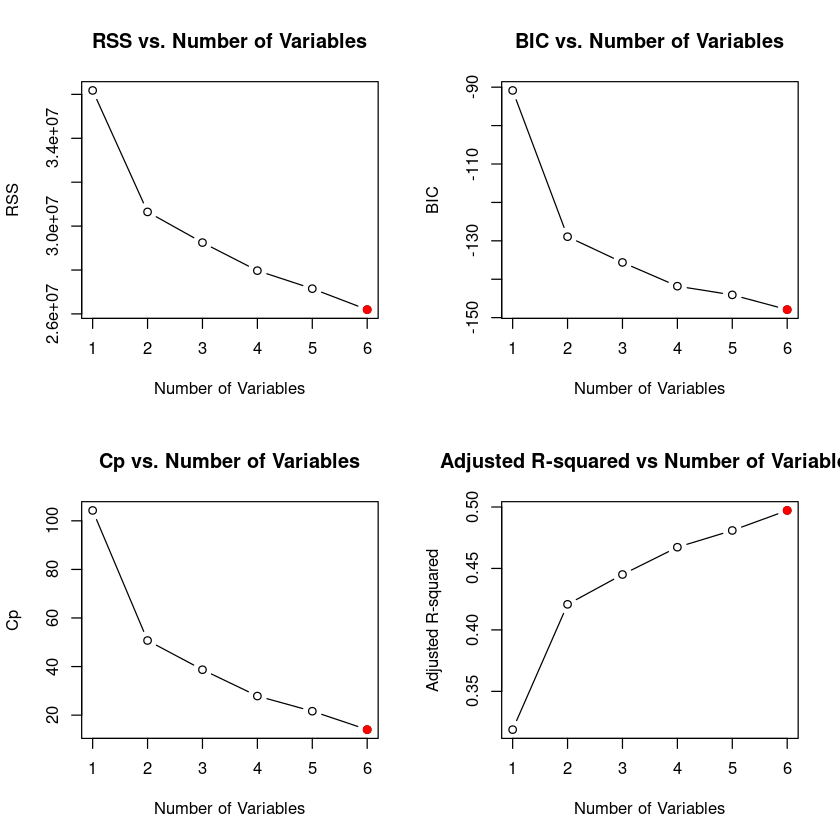

In [26]:
par(mfrow = c(2, 2))
# Plot the best RSS
best_rss <- which.min(best_rss_list)
best_rss
plot(best_rss_list, type = "b", xlab = "Number of Variables", ylab = "RSS", main = "RSS vs. Number of Variables")
points(best_rss, best_rss_list[best_rss], col = 'red', pch = 19)
# Plot the best BIC
best_bic <- which.min(best_bic_list)
plot(best_bic_list, type = "b", xlab = "Number of Variables", ylab = "BIC", main = "BIC vs. Number of Variables")
points(best_bic, best_bic_list[best_bic], col = "red", pch = 19)
best_bic
# Plot the best Cp
best_cp <- which.min(best_cp_list)
plot(best_cp_list, type = 'b', xlab = "Number of Variables", ylab = "Cp", main = "Cp vs. Number of Variables")
points(best_cp, best_cp_list[best_cp], col = "red", pch = 19)
best_cp
# Plot the best Adjusted R-squared
best_adjr2 <- which.max(best_adj_r_squared_list)
plot(best_adj_r_squared_list, type = 'b', xlab = 'Number of Variables', ylab = 'Adjusted R-squared', main = 'Adjusted R-squared vs Number of Variables')
points(best_adjr2, best_adj_r_squared_list[best_adjr2], col = "red", pch = 19)
best_adjr2

## **When a maximum of six variables are considered we arrive at the following conclusion:**

IIC. According to RSS, we should chose **six variables**. The selected variables are the same as above: **AtBat, Hits, Walks, CRBI, DivisionW, and PutOuts.**

IID. According to all of the above plots, while minimizing BIC and Cp and maximizing Adjusted R-squared, **we should still choose six variables**. The selected variables are the same as above: AtBat, Hits, Walks, CRBI, DivisionW, and PutOuts. While RSS does not penalize complicated models, unlike BIC, Cp, and Adjusted R-squared, each number still recommended six variables. The values don't suggest overfitting with the inclusion of more variables, and this suggests that our model is accurate and parsimonious.

 IIE. Plots included in above diagram.

Now we consider a maximum of 19 variables and determine based on the evaluation metrics what the maximum number of variables should be selected 

$Number_of_Variables
[1] 19

$Selected_Variables
 [1] "(Intercept)" "AtBat"       "Hits"        "HmRun"       "Runs"       
 [6] "RBI"         "Walks"       "Years"       "CAtBat"      "CHits"      
[11] "CHmRun"      "CRuns"       "CRBI"        "CWalks"      "LeagueN"    
[16] "DivisionW"   "PutOuts"     "Assists"     "Errors"      "NewLeagueN"

$BIC
$BIC$Num_Vars
[1] 6

$BIC$Variables
[1] "(Intercept)" "AtBat"       "Hits"        "Walks"       "CRBI"       
[6] "DivisionW"   "PutOuts"    


$Cp
$Cp$Num_Vars
[1] 10

$Cp$Variables
 [1] "(Intercept)" "AtBat"       "Hits"        "Walks"       "CAtBat"     
 [6] "CRuns"       "CRBI"        "CWalks"      "DivisionW"   "PutOuts"    
[11] "Assists"    


$Adjusted_R2
$Adjusted_R2$Num_Vars
[1] 11

$Adjusted_R2$Variables
 [1] "(Intercept)" "AtBat"       "Hits"        "Walks"       "CAtBat"     
 [6] "CRuns"       "CRBI"        "CWalks"      "LeagueN"     "DivisionW"  
[11] "PutOuts"     "Assists"

[1] 19  6 10 11

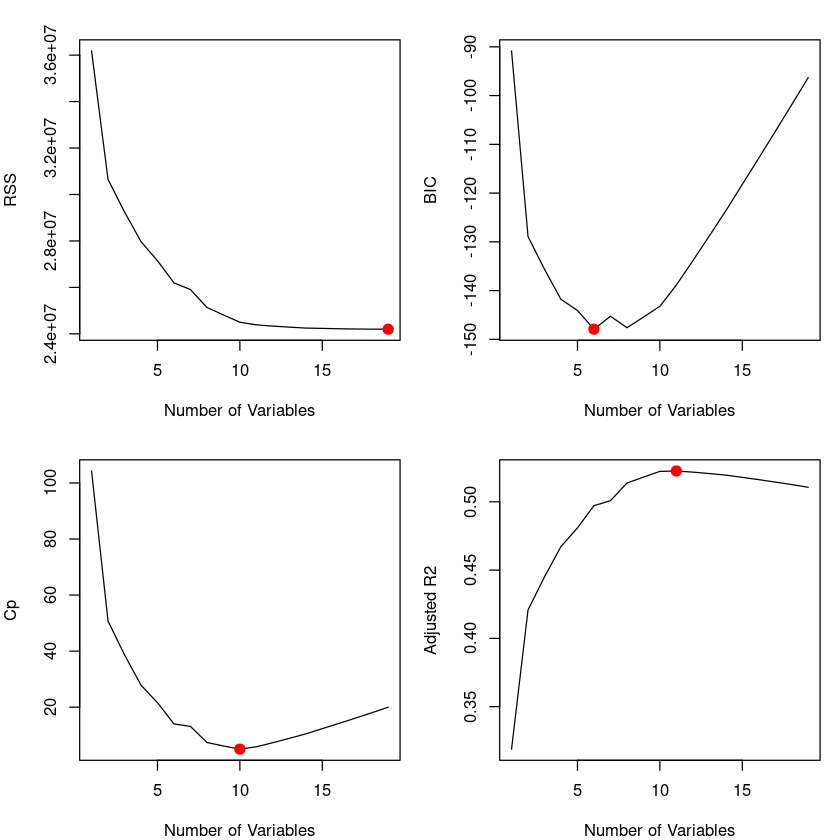

In [27]:

###Question 1 (IIc)
### (c) Based on RSS, determine the number of variables to choose ###
num_vars_rss <- which.min(reg_summary$rss)  # Find the model with lowest RSS
selected_vars_rss <- coef(regfit_full, num_vars_rss)  # Get variable names

list(Number_of_Variables = num_vars_rss, Selected_Variables = names(selected_vars_rss))


###Question 1 (IId)
### (d) Based on BIC, Cp, and Adjusted R2 ###
num_vars_bic <- which.min(reg_summary$bic)  # Find model with lowest BIC
num_vars_cp <- which.min(reg_summary$cp)    # Find model with lowest Cp
num_vars_adjr2 <- which.max(reg_summary$adjr2)  # Find model with highest Adjusted R2

selected_vars_bic <- coef(regfit_full, num_vars_bic)
selected_vars_cp <- coef(regfit_full, num_vars_cp)
selected_vars_adjr2 <- coef(regfit_full, num_vars_adjr2)

list(
  BIC = list(Num_Vars = num_vars_bic, Variables = names(selected_vars_bic)),
  Cp = list(Num_Vars = num_vars_cp, Variables = names(selected_vars_cp)),
  Adjusted_R2 = list(Num_Vars = num_vars_adjr2, Variables = names(selected_vars_adjr2))
)

# Compare if the best number of variables is the same across criteria
comparison <- c(num_vars_rss, num_vars_bic, num_vars_cp, num_vars_adjr2)
comparison

###Question 1 (IIe)
### (e) Plot RSS, BIC, Cp, and Adjusted R2 with best models highlighted ###
par(mfrow = c(2, 2))  # Set 2x2 layout
par(mar = c(4, 4, 2, 1))  # Adjust margins (bottom, left, top, right)



# Plot RSS
plot(reg_summary$rss, xlab = "Number of Variables", ylab = "RSS", type = "l")
points(num_vars_rss, reg_summary$rss[num_vars_rss], col = "red", cex = 2, pch = 20)

# Plot BIC
plot(reg_summary$bic, xlab = "Number of Variables", ylab = "BIC", type = "l")
points(num_vars_bic, reg_summary$bic[num_vars_bic], col = "red", cex = 2, pch = 20)

# Plot Cp
plot(reg_summary$cp, xlab = "Number of Variables", ylab = "Cp", type = "l")
points(num_vars_cp, reg_summary$cp[num_vars_cp], col = "red", cex = 2, pch = 20)

# Plot Adjusted R2
plot(reg_summary$adjr2, xlab = "Number of Variables", ylab = "Adjusted R2", type = "l")
points(num_vars_adjr2, reg_summary$adjr2[num_vars_adjr2], col = "red", cex = 2, pch = 20)



**The plot above shows the number of variables to be selected based on the evaluation metrics. From the chart above, and drawing on the BIC, we are of the view that using six variables is the best allowing us to have a more parsimonious model.**

III. Next, we performed forward subset selection to examine our model and which variables to select. We used the regsubsets() function again, but with the forward method while considering **a maximum of six variables**

In [28]:
# Perform forward subset selection considering a maximum of 6 variables
regfit_forward <- regsubsets(Salary ~ ., data = Hitters, nvmax = 6, method = "forward")
regfit_forward_sum <- summary(regfit_forward)

# Determine the best six variables for our model
coef(regfit_forward, 6)

# Extract the lists
forward_r_squared_list <- regfit_forward_sum$rsq
forward_rss_list <- regfit_forward_sum$rss
forward_bic_list <- regfit_forward_sum$bic
forward_cp_list <- regfit_forward_sum$cp
forward_adj_r_squared_list <- regfit_forward_sum$adjr2

list(R2 = forward_r_squared_list, RSS = forward_rss_list, BIC = forward_bic_list, CIP = forward_cp_list, Adjusted_R2 = forward_adj_r_squared_list)

(Intercept)        AtBat         Hits        Walks         CRBI    DivisionW 
  91.5117981   -1.8685892    7.6043976    3.6976468    0.6430169 -122.9515338 
     PutOuts 
   0.2643076

$R2
[1] 0.3214501 0.4252237 0.4514294 0.4754067 0.4908036 0.5087146

$RSS
[1] 36179679 30646560 29249297 27970852 27149899 26194904

$BIC
[1]  -90.84637 -128.92622 -135.62693 -141.80892 -144.07143 -147.91690

$CIP
[1] 104.28132  50.72309  38.69313  27.85622  21.61301  14.02387

$Adjusted_R2
[1] 0.3188503 0.4208024 0.4450753 0.4672734 0.4808971 0.4972001

We also looked at our best six variables using the forward subset selection model and extracted the R-squared, RSS, BIC, Cp, and Adjusted R-squared lists. In this model, the best six variables are **AtBat, Hits, Walks, CRBI, DivisionW, and PutOuts.** The lists of R-squared, RSS, BIC, CP, and Adjusted R-squared are calculated above.

We created additional plots to determine the best RSS, BIC, Cp, and Adjusted R-Squared values with forward subset selection.

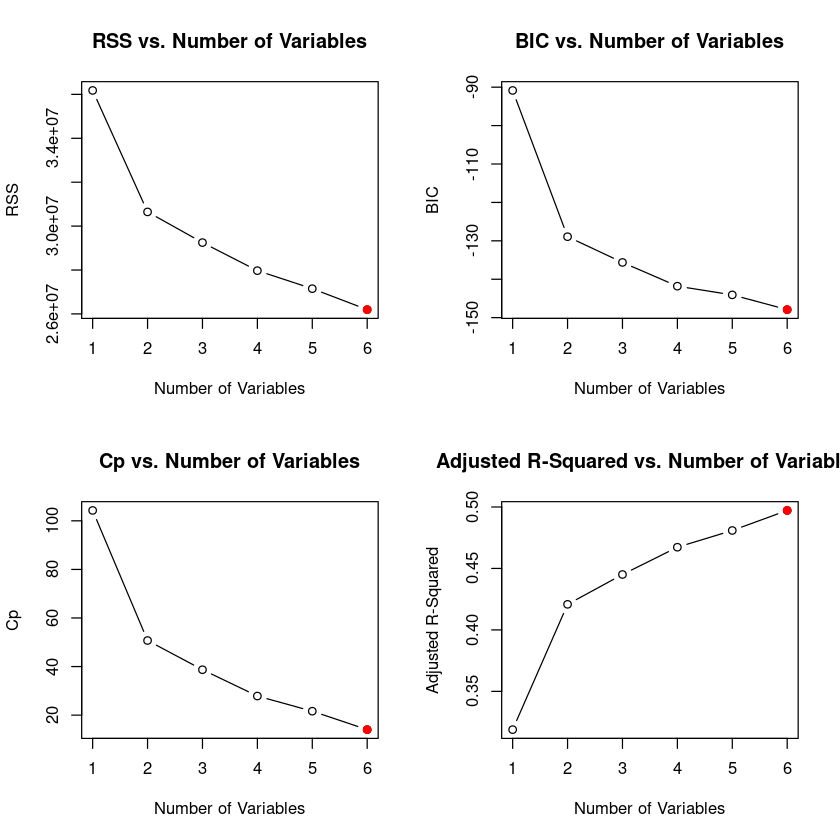

In [29]:
par(mfrow = c(2, 2))

# Plot the Forward RSS
forward_rss <- which.min(forward_rss_list)
plot(forward_rss_list, type = "b", xlab = "Number of Variables", ylab = "RSS", main = "RSS vs. Number of Variables")
points(forward_rss, forward_rss_list[forward_rss], col = 'red', pch = 19)
# Plot the Forward BIC
forward_bic <- which.min(forward_bic_list)
plot(forward_bic_list, type = "b", xlab = "Number of Variables", ylab = "BIC", main = "BIC vs. Number of Variables")
points(forward_bic, forward_bic_list[forward_bic], col = 'red', pch = 19)
# Plot the Forward Cp
forward_cp <- which.min(forward_cp_list)
plot(forward_cp_list, type = 'b', xlab = "Number of Variables", ylab = "Cp", main = "Cp vs. Number of Variables")
points(best_cp, forward_cp_list[best_cp], col = "red", pch = 19)
# Plot the Forward Adjusted R-Squared
forward_adj2 <- which.max(forward_adj_r_squared_list)
plot(forward_adj_r_squared_list, type = 'b', xlab = "Number of Variables", ylab = "Adjusted R-Squared", main = "Adjusted R-Squared vs. Number of Variables")
points(forward_adj2, forward_adj_r_squared_list[forward_adj2], col = "red", pch = 19)

According to all of the above plots, while minimizing RSS, BIC and Cp and maximizing Adjusted R-squared, we should still choose **six variables.** The selected variables are the same as above: **AtBat, Hits, Walks, CRBI, DivisionW, and PutOuts.**

Next we considered a maximum 19 variables, using the forward selection and drawing on the evaluation metrics to determine the ideal number of variables to select. We arrive at the conclusion that the maximum number of variable to be selected is 6 based on the BIC: 'AtBat''Hits''Walks''CRBI''DivisionW''PutOuts'

 (Intercept)        AtBat         Hits        Walks         CRBI    DivisionW 
  91.5117981   -1.8685892    7.6043976    3.6976468    0.6430169 -122.9515338 
     PutOuts 
   0.2643076 


$R2
 [1] 0.3214501 0.4252237 0.4514294 0.4754067 0.4908036 0.5087146 0.5132286
 [8] 0.5281386 0.5346124 0.5404950 0.5426153 0.5436302 0.5444570 0.5452164
[15] 0.5454692 0.5457656 0.5459518 0.5460945 0.5461159

$RSS
 [1] 36179679 30646560 29249297 27970852 27149899 26194904 25954217 25159234
 [9] 24814051 24500402 24387345 24333232 24289148 24248660 24235177 24219377
[17] 24209447 24201837 24200700

$BIC
 [1]  -90.84637 -128.92622 -135.62693 -141.80892 -144.07143 -147.91690
 [7] -144.77245 -147.38199 -145.44316 -143.21651 -138.86077 -133.87283
[13] -128.77759 -123.64420 -118.21832 -112.81768 -107.35339 -101.86391
[19]  -96.30412

$Cp
 [1] 104.281319  50.723090  38.693127  27.856220  21.613011  14.023870
 [7]  13.607126   7.624674   6.158685   5.009317   5.874113   7.330766
[13]   8.888112  10.481576  12.346193  14.187546  16.087831  18.011425
[19]  20.000000

$Adjusted_R2
 [1] 0.3188503 0.4208024 0.4450753 0.4672734 0.4808971 0.4972001 0.4998663
 [8] 0.5132768 0.5180572 0.5222606 0.5225706 0.5217245 0.5206736 0.5195431
[15] 0.5178661 0.5162219 0.5144464 0.5126097 0.5106270

$BIC
$BIC$Num_Vars
[1] 6

$BIC$Variables
[1] "(Intercept)" "AtBat"       "Hits"        "Walks"       "CRBI"       
[6] "DivisionW"   "PutOuts"    


$Cp
$Cp$Num_Vars
[1] 10

$Cp$Variables
 [1] "(Intercept)" "AtBat"       "Hits"        "Walks"       "CAtBat"     
 [6] "CRuns"       "CRBI"        "CWalks"      "DivisionW"   "PutOuts"    
[11] "Assists"    


$Adjusted_R2
$Adjusted_R2$Num_Vars
[1] 11

$Adjusted_R2$Variables
 [1] "(Intercept)" "AtBat"       "Hits"        "Walks"       "CAtBat"     
 [6] "CRuns"       "CRBI"        "CWalks"      "LeagueN"     "DivisionW"  
[11] "PutOuts"     "Assists"

[1]  6 10 11

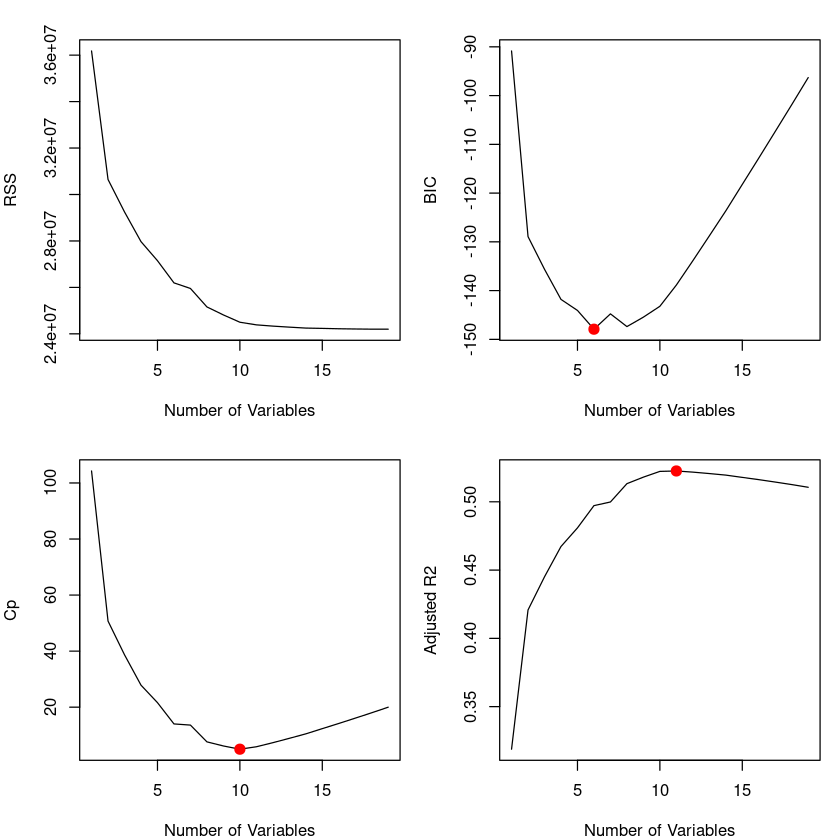

In [30]:
# Perform forward stepwise selection
regfit_fwd <- regsubsets(Salary ~ ., data = Hitters, nvmax = 19, method = "forward")

# Get summary of the forward selection process
reg_summary_fwd <- summary(regfit_fwd)

# Extract model details for 19 variables
vars_19 <- coef(regfit_fwd, 19)
vars_6 <- coef(regfit_fwd, 6)
print(vars_6)

# Extract performance metrics (R2, RSS, Cp, BIC, Adjusted R2)
r2_values <- reg_summary_fwd$rsq
rss_values <- reg_summary_fwd$rss
cp_values <- reg_summary_fwd$cp
bic_values <- reg_summary_fwd$bic
adjr2_values <- reg_summary_fwd$adjr2

list(R2 = r2_values, RSS = rss_values, BIC = bic_values, Cp = cp_values, Adjusted_R2 = adjr2_values)

### (d) Based on BIC, Cp, and Adjusted R2 ###
num_vars_bic <- which.min(bic_values)  # Find model with lowest BIC
num_vars_cp <- which.min(cp_values)    # Find model with lowest Cp
num_vars_adjr2 <- which.max(adjr2_values)  # Find model with highest Adjusted R2

# Extract coefficients for selected models
selected_vars_bic <- coef(regfit_fwd, num_vars_bic)
selected_vars_cp <- coef(regfit_fwd, num_vars_cp)
selected_vars_adjr2 <- coef(regfit_fwd, num_vars_adjr2)

list(
  BIC = list(Num_Vars = num_vars_bic, Variables = names(selected_vars_bic)),
  Cp = list(Num_Vars = num_vars_cp, Variables = names(selected_vars_cp)),
  Adjusted_R2 = list(Num_Vars = num_vars_adjr2, Variables = names(selected_vars_adjr2))
)

# Compare if the best number of variables is the same across criteria
comparison <- c(num_vars_bic, num_vars_cp, num_vars_adjr2)
comparison

### (e) Plot RSS, BIC, Cp, and Adjusted R2 with best models highlighted ###
par(mfrow = c(2, 2))  # Set 2x2 layout
par(mar = c(4, 4, 2, 1))  # Adjust margins (bottom, left, top, right)

# Plot RSS
plot(rss_values, xlab = "Number of Variables", ylab = "RSS", type = "l")

# Plot BIC
plot(bic_values, xlab = "Number of Variables", ylab = "BIC", type = "l")
points(num_vars_bic, bic_values[num_vars_bic], col = "red", cex = 2, pch = 20)

# Plot Cp
plot(cp_values, xlab = "Number of Variables", ylab = "Cp", type = "l")
points(num_vars_cp, cp_values[num_vars_cp], col = "red", cex = 2, pch = 20)

# Plot Adjusted R2
plot(adjr2_values, xlab = "Number of Variables", ylab = "Adjusted R2", type = "l")
points(num_vars_adjr2, adjr2_values[num_vars_adjr2], col = "red", cex = 2, pch = 20)





IV. Next, we performed backward subset selection to examine our model and which variables to select. We used the regsubsets() function again, but with the backward method while considering a maximum of 6 variables.

In [31]:
# Perform backward subset selection
regfit_backward <- regsubsets(Salary ~ ., data = Hitters, nvmax = 6, method = "backward")
regfit_backward_sum <- summary(regfit_backward)

# Determine the best six variables for our model
coef(regfit_backward, 6)

# Extract lists
backward_r_squared_list <- regfit_backward_sum$rsq
backward_rss_list <- regfit_backward_sum$rss
backward_bic_list <- regfit_backward_sum$bic
backward_cp_list <- regfit_backward_sum$cp
backward_adj_r_squared_list <- regfit_backward_sum$adjr2

(Intercept)        AtBat         Hits        Walks        CRuns    DivisionW 
  78.2664070   -1.8158931    7.3597644    3.5123248    0.6187876 -113.7958600 
     PutOuts 
   0.2995788

Using backward subset selection, the best six variables are **AtBat, Hits, Walks, CRuns, DivisionW, and PutOuts.** The lists of R-squared, RSS, BIC, CP, and Adjusted R-squared are calculated above.

We created additional plots to determine the best RSS, BIC, Cp, and Adjusted R-Squared values with forward subset selection.

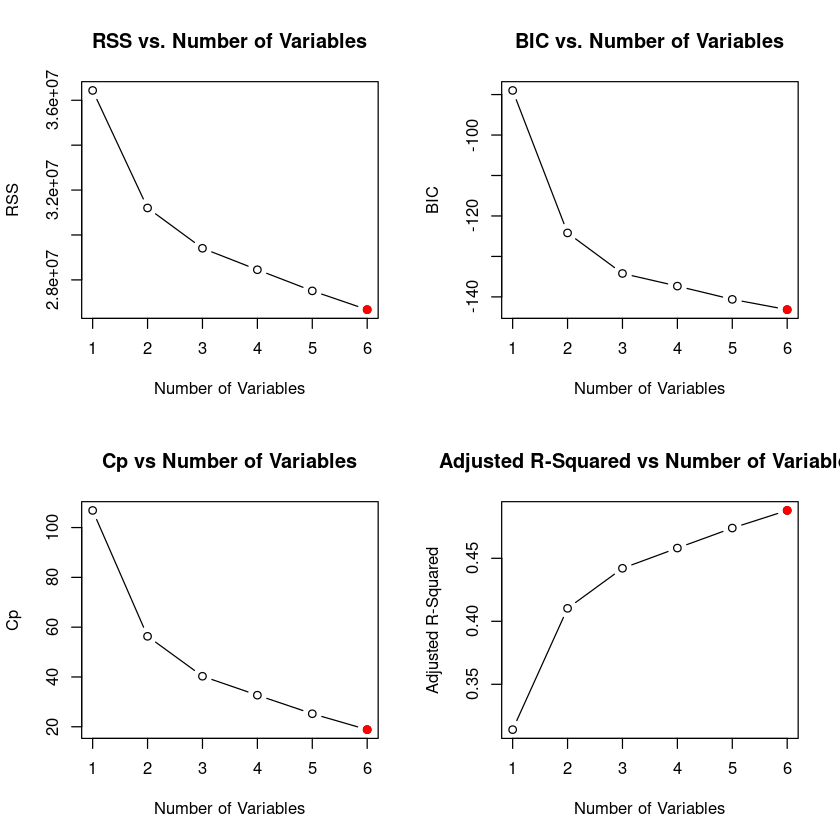

In [32]:
par(mfrow = c(2, 2))
# Plot the Backward RSS
backward_rss <- which.min(backward_rss_list)
plot(backward_rss_list, type = "b", xlab = "Number of Variables", ylab = "RSS", main = "RSS vs. Number of Variables")
points(backward_rss, backward_rss_list[backward_rss], col = 'red', pch = 19)
# Plot the Backward BIC
backward_bic <- which.min(backward_bic_list)
plot(backward_bic_list, type = "b", xlab = "Number of Variables", ylab = "BIC", main = "BIC vs. Number of Variables")
points(backward_bic, backward_bic_list[backward_bic], col = 'red', pch = 19)
# Plot the Backward Cp
backward_cp <- which.min(backward_cp_list)
plot(backward_cp_list, type = "b", xlab = "Number of Variables", ylab = "Cp", main = "Cp vs Number of Variables")
points(backward_cp, backward_cp_list[backward_cp], col = 'red', pch = 19)
# Print the Backward Adjusted R-Squared
backward_adjr2 <- which.max(backward_adj_r_squared_list)
plot(backward_adj_r_squared_list, type = "b", xlab = "Number of Variables", ylab = "Adjusted R-Squared", main = "Adjusted R-Squared vs Number of Variables")
points(backward_adjr2, backward_adj_r_squared_list[backward_adjr2], col = 'red', pch = 19)

According to all of the above plots, while minimizing RSS, BIC and Cp and maximizing Adjusted R-squared, we should still choose **six variables.** The selected variables are: **AtBat, Hits, Walks, CRuns, DivisionW, and PutOuts.**

We re-run the analysis considering a maximum of 19 variables using backward selection below. 

$R2
 [1] 0.3166062 0.4147791 0.4484661 0.4664051 0.4840589 0.4997274 0.5136174
 [8] 0.5281386 0.5346124 0.5404950 0.5426153 0.5436302 0.5444570 0.5452164
[15] 0.5454692 0.5457656 0.5459518 0.5460945 0.5461159

$RSS
 [1] 36437951 31203460 29407297 28450807 27509524 26674092 25933487 25159234
 [9] 24814051 24500402 24387345 24333232 24289148 24248660 24235177 24219377
[17] 24209447 24201837 24200700

$BIC
 [1]  -88.97559 -124.18997 -134.21006 -137.33435 -140.61064 -143.14927
 [7] -144.98259 -147.38199 -145.44316 -143.21651 -138.86077 -133.87283
[13] -128.77759 -123.64420 -118.21832 -112.81768 -107.35339 -101.86391
[19]  -96.30412

$Cp
 [1] 106.874632  56.314938  40.279613  32.675465  25.224013  18.835412
 [7]  13.398979   7.624674   6.158685   5.009317   5.874113   7.330766
[13]   8.888112  10.481576  12.346193  14.187546  16.087831  18.011425
[19]  20.000000

$Adjusted_R2
 [1] 0.3139878 0.4102774 0.4420777 0.4581323 0.4740211 0.4880022 0.5002657
 [8] 0.5132768 0.5180572 0.5222606 0.5225706 0.5217245 0.5206736 0.5195431
[15] 0.5178661 0.5162219 0.5144464 0.5126097 0.5106270

$BIC
$BIC$Num_Vars
[1] 8

$BIC$Variables
[1] "(Intercept)" "AtBat"       "Hits"        "Walks"       "CRuns"      
[6] "CRBI"        "CWalks"      "DivisionW"   "PutOuts"    


$Cp
$Cp$Num_Vars
[1] 10

$Cp$Variables
 [1] "(Intercept)" "AtBat"       "Hits"        "Walks"       "CAtBat"     
 [6] "CRuns"       "CRBI"        "CWalks"      "DivisionW"   "PutOuts"    
[11] "Assists"    


$Adjusted_R2
$Adjusted_R2$Num_Vars
[1] 11

$Adjusted_R2$Variables
 [1] "(Intercept)" "AtBat"       "Hits"        "Walks"       "CAtBat"     
 [6] "CRuns"       "CRBI"        "CWalks"      "LeagueN"     "DivisionW"  
[11] "PutOuts"     "Assists"

[1]  8 10 11

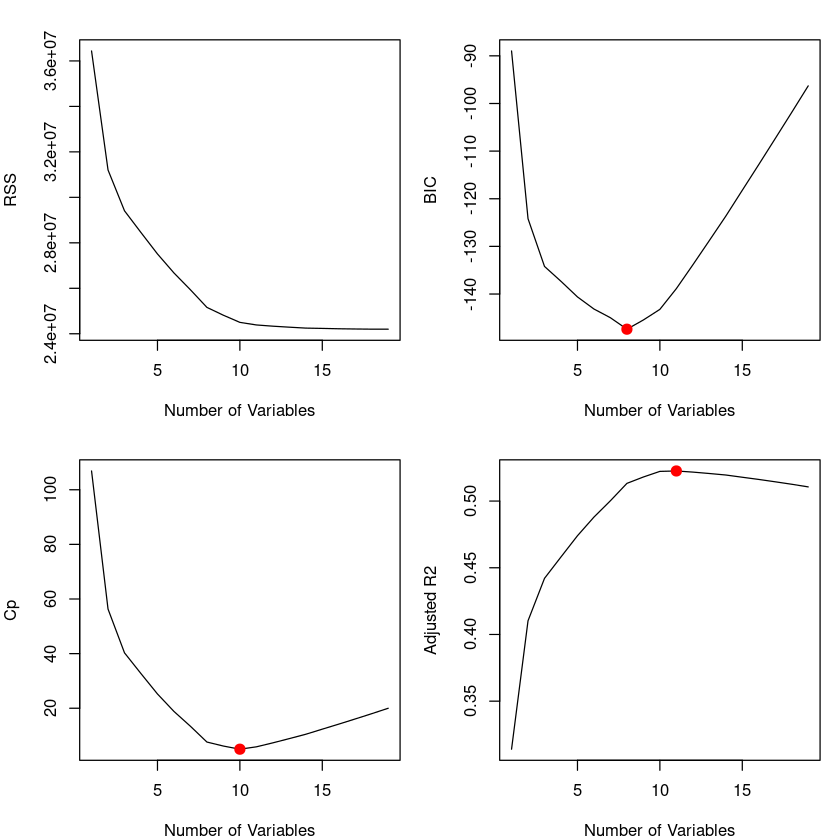

In [33]:
# Perform backward stepwise selection
regfit_bwd_sel <- regsubsets(Salary ~ ., data = Hitters, nvmax = 19, method = "backward")

# Get summary of the backward selection process
reg_summary_bwd_sel <- summary(regfit_bwd_sel)

# Extract model details for 19 variables
vars_19_bwd <- coef(regfit_bwd_sel, 19) 

# Extract performance metrics (R2, RSS, Cp, BIC, Adjusted R2)
r2_bwd_values <- reg_summary_bwd_sel$rsq
rss_bwd_values <- reg_summary_bwd_sel$rss
cp_bwd_values <- reg_summary_bwd_sel$cp
bic_bwd_values <- reg_summary_bwd_sel$bic
adjr2_bwd_values <- reg_summary_bwd_sel$adjr2

list(R2 = r2_bwd_values, RSS = rss_bwd_values, BIC = bic_bwd_values, Cp = cp_bwd_values, Adjusted_R2 = adjr2_bwd_values)

### (d) Based on BIC, Cp, and Adjusted R2 ###
num_vars_bwd_bic <- which.min(bic_bwd_values)  # Find model with lowest BIC
num_vars_bwd_cp <- which.min(cp_bwd_values)    # Find model with lowest Cp
num_vars_bwd_adjr2 <- which.max(adjr2_bwd_values)  # Find model with highest Adjusted R2

# Extract coefficients for selected models
selected_vars_bwd_bic <- coef(regfit_bwd_sel, num_vars_bwd_bic)
selected_vars_bwd_cp <- coef(regfit_bwd_sel, num_vars_bwd_cp)
selected_vars_bwd_adjr2 <- coef(regfit_bwd_sel, num_vars_bwd_adjr2)

list(
  BIC = list(Num_Vars = num_vars_bwd_bic, Variables = names(selected_vars_bwd_bic)),
  Cp = list(Num_Vars = num_vars_bwd_cp, Variables = names(selected_vars_bwd_cp)),
  Adjusted_R2 = list(Num_Vars = num_vars_bwd_adjr2, Variables = names(selected_vars_bwd_adjr2))
)

# Compare if the best number of variables is the same across criteria
comparison_bwd <- c(num_vars_bwd_bic, num_vars_bwd_cp, num_vars_bwd_adjr2)
comparison_bwd

### (e) Plot RSS, BIC, Cp, and Adjusted R2 with best models highlighted ###
par(mfrow = c(2, 2))  # Set 2x2 layout
par(mar = c(4, 4, 2, 1))  # Adjust margins (bottom, left, top, right)

# Plot RSS
plot(rss_bwd_values, xlab = "Number of Variables", ylab = "RSS", type = "l")

# Plot BIC
plot(bic_bwd_values, xlab = "Number of Variables", ylab = "BIC", type = "l")
points(num_vars_bwd_bic, bic_bwd_values[num_vars_bwd_bic], col = "red", cex = 2, pch = 20)

# Plot Cp
plot(cp_bwd_values, xlab = "Number of Variables", ylab = "Cp", type = "l")
points(num_vars_bwd_cp, cp_bwd_values[num_vars_bwd_cp], col = "red", cex = 2, pch = 20)

# Plot Adjusted R2
plot(adjr2_bwd_values, xlab = "Number of Variables", ylab = "Adjusted R2", type = "l")
points(num_vars_bwd_adjr2, adjr2_bwd_values[num_vars_bwd_adjr2], col = "red", cex = 2, pch = 20)


VA. Assuming p = 6, we compared the best subset, forward and backward selection models by looking at their R-squared, Adjusted R-Squared, RSS, BIC, and Cp. Below, we pulled the maximum R-Squared and Adjusted R-Squared between each model to look at which has the highest value.

In [34]:
# Compute the maximum value across the three models
r2_max_values <- c(max(best_r_squared_list), max(forward_r_squared_list), max(backward_r_squared_list))
names(r2_max_values) <- c("best_r_squared_list", "forward_r_squared_list", "backward_r_squared_list")

# Find the overall maximum value
overall_r2_max <- max(r2_max_values)

# Find all variables with the maximum value (handling floating-point precision)
r2_max_variables <- names(r2_max_values)[sapply(r2_max_values, function(x) isTRUE(all.equal(x, overall_r2_max)))]

# Print the result
cat("The maximum value is", overall_r2_max, "from", paste(r2_max_variables, collapse = ", "), "\n")

The maximum value is 0.5087146 from best_r_squared_list, forward_r_squared_list 


In [35]:
# Compute the maximum value across the three variables
adjr2_max_values <- c(max(best_adj_r_squared_list), max(forward_adj_r_squared_list), max(backward_adj_r_squared_list))
names(adjr2_max_values) <- c("best_adj_r_squared_list", "forward_adj_r_squared_list", "backward_adj_r_squared_list")

# Find the overall maximum value
overall_adj_r2_max <- max(adjr2_max_values)

# Find all variables with the maximum value (handling floating-point precision)
adjr2_max_variables <- names(adjr2_max_values)[sapply(adjr2_max_values, function(x) isTRUE(all.equal(x, overall_adj_r2_max)))]

# Print the result
cat("The maximum value is", overall_adj_r2_max, "from", paste(adjr2_max_variables, collapse = ", "), "\n")

The maximum value is 0.4972001 from best_adj_r_squared_list, forward_adj_r_squared_list 


Both the **best subset selection model and the forward selection model** have the greatest value of 0.5087146. Both the best subset selection model and the forward selection model have the greatest value of 0.4972001.

In [122]:
# Compare the minimum value across the three models
rss_min_values <- c(min(best_rss_list), min(forward_rss_list), min(backward_rss_list))
names(rss_min_values) <- c('best_rss_list', 'forward_rss_list', 'backward_rss_list')

# Find the overall minimum value
overall_rss_min <- min(rss_min_values)

# Find all variables with the minimum value (handling floating-point precision)
rss_min_variables <- names(rss_min_values)[sapply(rss_min_values, function(x) isTRUE(all.equal(x, overall_rss_min)))]

# Print the result
cat("The minimum value is", overall_rss_min, "from", paste(rss_min_variables, collapse = ", "), "\n")

The minimum value is 26194904 from best_rss_list, forward_rss_list 


In [123]:
# Compare the minimum value across the three models
bic_min_values <- c(min(best_bic_list), min(forward_bic_list), min(backward_bic_list))
names(bic_min_values) <- c('best_bic_list', 'forward_bic_list', 'backward_bic_list')

# Find the overall minimum value
overall_bic_min <- min(bic_min_values)

# Find all the variables with the minimum value (handling floating-point precision)
bic_min_variables <- names(bic_min_values)[sapply(bic_min_values, function(x) isTRUE(all.equal(x, overall_bic_min)))]

# Print the result
cat('The minimum value is', overall_bic_min, 'from', paste(bic_min_variables, collapse = ', '), '\n')

The minimum value is -147.9169 from best_bic_list, forward_bic_list 


In [124]:
# Compare the minimum value across the three variables
cp_min_values <- c(min(best_cp_list), min(forward_cp_list), min(backward_cp_list))
names(cp_min_values) <- c('best_cp_list', 'forward_cp_list', 'backward_cp_list')

# Find the overall minimum value
overall_cp_min <- min(cp_min_values)

# Find all the variables with the minimum value (handling floating-point precision)
cp_min_variables <- names(cp_min_values)[sapply(cp_min_values, function(x) isTRUE(all.equal(x, overall_cp_min)))]

# Print the result
cat('The minimum value is', overall_cp_min, 'from', paste(cp_min_variables, collapse = ', '), '\n')

The minimum value is 14.02387 from best_cp_list, forward_cp_list 


VB. Based on our above graphs and calculations, we should select **six variables.** Each model recommended six variables, even if the specific variables differed between models.

The best subset selection model and the forward selection model had the greatest R-squared and Adjusted R-squared, as well as the smallest RSS, BIC, and Cp. This is because both selected the same six variables.

VI . In our final model, we decided to **include six variables: AtBat, Hits, Walks, CRBI, DivisionW, and PutOuts.** These variables were chosen using both the best subset selection method and the forward selection methods, which had the greatest R-Squared and Adjusted R-Squared values as well as the smallest RSS, BIC, and Cp. Each of these measures also recommended six variables, hence our decision to include six.

## Problem 2 - Subset Selection

(100 points total) + 20 points extra credit : subset selection
Use Carseats dataset. With the dataset, we wish to predict the sales of carseats on the basis of various statistics associated with the sale data in the previous year.

I.	(6 points) Observe your data and prepare your data: 
(a)	Observe the size of your data. How many observations, how many variables? What is your response/dependent variable, is it numeric or categorical?
(b)	If there is any missing data in the dataset. If so, remove the observations/datapoints with missing data.  Use is.na() and na.omit().
(c)	Observe if there are any dummy variables in the data. If so, use model.matrix() to build your independent variable (predictor) matrix x.




In [39]:
data('Carseats')
glimpse(Carseats)

Rows: 400
Columns: 11
$ Sales       <dbl> 9.50, 11.22, 10.06, 7.40, 4.15, 10.81, 6.63, 11.85, 6.54, …
$ CompPrice   <dbl> 138, 111, 113, 117, 141, 124, 115, 136, 132, 132, 121, 117…
$ Income      <dbl> 73, 48, 35, 100, 64, 113, 105, 81, 110, 113, 78, 94, 35, 2…
$ Advertising <dbl> 11, 16, 10, 4, 3, 13, 0, 15, 0, 0, 9, 4, 2, 11, 11, 5, 0, …
$ Population  <dbl> 276, 260, 269, 466, 340, 501, 45, 425, 108, 131, 150, 503,…
$ Price       <dbl> 120, 83, 80, 97, 128, 72, 108, 120, 124, 124, 100, 94, 136…
$ ShelveLoc   <fct> Bad, Good, Medium, Medium, Bad, Bad, Medium, Good, Medium,…
$ Age         <dbl> 42, 65, 59, 55, 38, 78, 71, 67, 76, 76, 26, 50, 62, 53, 52…
$ Education   <dbl> 17, 10, 12, 14, 13, 16, 15, 10, 10, 17, 10, 13, 18, 18, 18…
$ Urban       <fct> Yes, Yes, Yes, Yes, Yes, No, Yes, Yes, No, No, No, Yes, Ye…
$ US          <fct> Yes, Yes, Yes, Yes, No, Yes, No, Yes, No, Yes, Yes, Yes, N…


In [40]:
# Check for missing data in the Carseats dataset
sum(is.na(Carseats))

[1] 0

In [41]:
str(Carseats)
y <- Carseats$Sales
x <- model.matrix(~ . - Sales, data = Carseats)[, -1]

'data.frame':	400 obs. of  11 variables:
 $ Sales      : num  9.5 11.22 10.06 7.4 4.15 ...
 $ CompPrice  : num  138 111 113 117 141 124 115 136 132 132 ...
 $ Income     : num  73 48 35 100 64 113 105 81 110 113 ...
 $ Advertising: num  11 16 10 4 3 13 0 15 0 0 ...
 $ Population : num  276 260 269 466 340 501 45 425 108 131 ...
 $ Price      : num  120 83 80 97 128 72 108 120 124 124 ...
 $ ShelveLoc  : Factor w/ 3 levels "Bad","Good","Medium": 1 2 3 3 1 1 3 2 3 3 ...
 $ Age        : num  42 65 59 55 38 78 71 67 76 76 ...
 $ Education  : num  17 10 12 14 13 16 15 10 10 17 ...
 $ Urban      : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 1 2 2 1 1 ...
 $ US         : Factor w/ 2 levels "No","Yes": 2 2 2 2 1 2 1 2 1 2 ...


II.	(30points) Call leaps library, use regsubsets() performs best subset selection by identifying the best model that considers all possible variables.

(a)	When all possible variables are considered, what are the lists of R2, RSS, BIC, Cp, and adjusted R2 (8 points)

(b)	Based RSS, BIC, Cp, and adjusted R2 respectively on how many of them should be chosen in the model? What are the names of variables? Are the best number of variable the same by RSS, BIC, Cp, and adjusted R2, why? (12 points)

(c)	Consider all possible variables, use regsubsets() performs best subset selection, printout RSS, BIC, Cp, and adjusted R2 in separate charts. Identify the best number of variable on the charts with a red dot use plot() and points (10 points)



In [42]:
regfit_best <- regsubsets(Sales ~ ., data = Carseats)
regfit_best_sum <- summary(regfit_best)

In [43]:
# Extract the metrics from the regsubsets summary
rss <- regfit_best_sum$rss
bic <- regfit_best_sum$bic
cp <- regfit_best_sum$cp
adjr2 <- regfit_best_sum$adjr2

# Identify the best models based on each metric
best_rss <- which.min(rss)
best_bic <- which.min(bic)
best_cp <- which.min(cp)
best_adjr2 <- which.max(adjr2)

# Get the names of the variables for each best model
best_rss_vars <- names(coef(regfit_best, best_rss))[-1]
best_bic_vars <- names(coef(regfit_best, best_bic))[-1]
best_cp_vars <- names(coef(regfit_best, best_cp))[-1]
best_adjr2_vars <- names(coef(regfit_best, best_adjr2))[-1]

# Display the results
list(
  Best_RSS = list(Num_Vars = best_rss, Variables = best_rss_vars, RSS = rss[best_rss]),
  Best_BIC = list(Num_Vars = best_bic, Variables = best_bic_vars, BIC = bic[best_bic]),
  Best_Cp = list(Num_Vars = best_cp, Variables = best_cp_vars, Cp = cp[best_cp]),
  Best_AdjR2 = list(Num_Vars = best_adjr2, Variables = best_adjr2_vars, AdjR2 = adjr2[best_adjr2])
)

$Best_RSS
$Best_RSS$Num_Vars
[1] 8

$Best_RSS$Variables
[1] "CompPrice"       "Income"          "Advertising"     "Price"          
[5] "ShelveLocGood"   "ShelveLocMedium" "Age"             "USYes"          

$Best_RSS$RSS
[1] 405.7583


$Best_BIC
$Best_BIC$Num_Vars
[1] 7

$Best_BIC$Variables
[1] "CompPrice"       "Income"          "Advertising"     "Price"          
[5] "ShelveLocGood"   "ShelveLocMedium" "Age"            

$Best_BIC$BIC
[1] -774.3036


$Best_Cp
$Best_Cp$Num_Vars
[1] 7

$Best_Cp$Variables
[1] "CompPrice"       "Income"          "Advertising"     "Price"          
[5] "ShelveLocGood"   "ShelveLocMedium" "Age"            

$Best_Cp$Cp
[1] 8.385679


$Best_AdjR2
$Best_AdjR2$Num_Vars
[1] 8

$Best_AdjR2$Variables
[1] "CompPrice"       "Income"          "Advertising"     "Price"          
[5] "ShelveLocGood"   "ShelveLocMedium" "Age"             "USYes"          

$Best_AdjR2$AdjR2
[1] 0.8698854

RSS and Adjusted R² select 8 variables, whereas BIC and Cp select 7 variables due to their stronger penalties for extra predictors. The names of the variables are listed above.

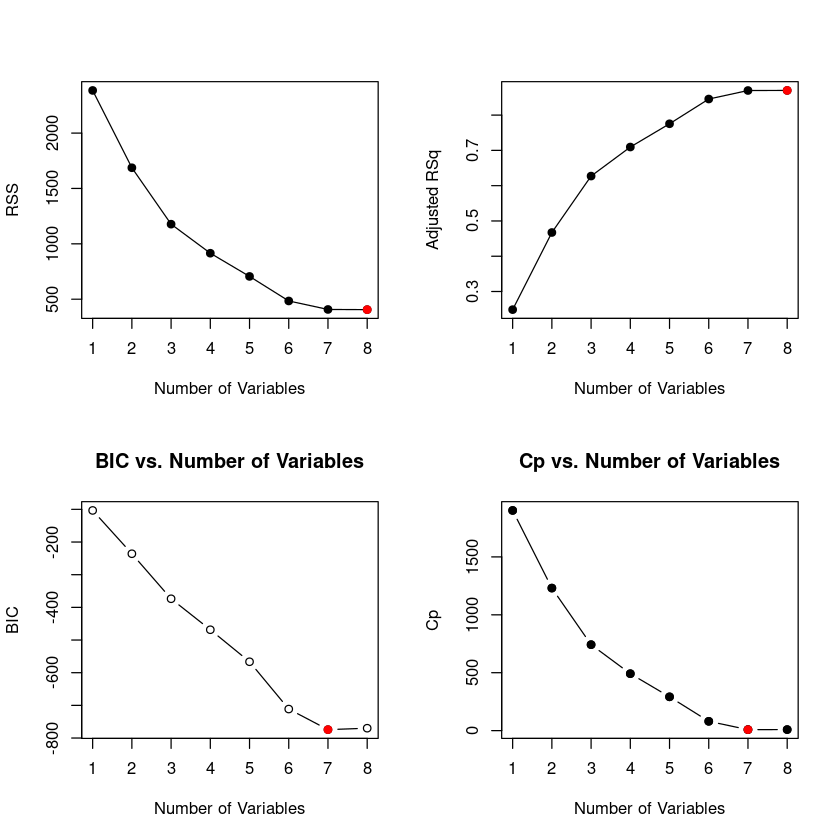

In [44]:
par(mfrow = c(2, 2))

# Plot RSS
plot(regfit_best_sum$rss, xlab = "Number of Variables", ylab = "RSS", type = "l")
points(1:length(regfit_best_sum$rss), regfit_best_sum$rss, pch = 19)
best_rss <- which.min(regfit_best_sum$rss)
points(best_rss, regfit_best_sum$rss[best_rss], col = "red", pch = 19)

# Plot Adjusted R2
plot(regfit_best_sum$adjr2, xlab = "Number of Variables", ylab = "Adjusted RSq", type = "l")
points(1:length(regfit_best_sum$adjr2), regfit_best_sum$adjr2, pch = 19)
best_adjr2 <- which.max(regfit_best_sum$adjr2)
points(best_adjr2, regfit_best_sum$adjr2[best_adjr2], col = "red", pch = 19)

# Plot BIC
plot(regfit_best_sum$bic, type = "b", xlab = "Number of Variables", ylab = "BIC", main = "BIC vs. Number of Variables")
points(best_bic, regfit_best_sum$bic[best_bic], col = "red", pch = 19)

# Plot Cp
plot(regfit_best_sum$cp, type = "b", xlab = "Number of Variables", ylab = "Cp", main = "Cp vs. Number of Variables")
points(1:length(regfit_best_sum$cp), regfit_best_sum$cp, pch = 19)
best_cp <- which.min(regfit_best_sum$cp)
points(best_cp, regfit_best_sum$cp[best_cp], col = "red", pch = 19)

In [45]:
coef(regfit_best, 7)

(Intercept)       CompPrice          Income     Advertising           Price 
     5.47522623      0.09257147      0.01578497      0.11590340     -0.09531895 
  ShelveLocGood ShelveLocMedium             Age 
     4.83567475      1.95199266     -0.04612752

III.	(30 points) Perform forward subset selection. Repeat II, (a), (b), (c) and (d) 



In [46]:
regfit.fwd <- regsubsets(Sales ~ ., data = Carseats, method = "forward")
summary(regfit.fwd)

Subset selection object
Call: regsubsets.formula(Sales ~ ., data = Carseats, method = "forward")
11 Variables  (and intercept)
                Forced in Forced out
CompPrice           FALSE      FALSE
Income              FALSE      FALSE
Advertising         FALSE      FALSE
Population          FALSE      FALSE
Price               FALSE      FALSE
ShelveLocGood       FALSE      FALSE
ShelveLocMedium     FALSE      FALSE
Age                 FALSE      FALSE
Education           FALSE      FALSE
UrbanYes            FALSE      FALSE
USYes               FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: forward
         CompPrice Income Advertising Population Price ShelveLocGood
1  ( 1 ) " "       " "    " "         " "        " "   "*"          
2  ( 1 ) " "       " "    " "         " "        "*"   "*"          
3  ( 1 ) "*"       " "    " "         " "        "*"   "*"          
4  ( 1 ) "*"       " "    "*"         " "        "*"   "*"          
5  ( 1 ) "*"       " "  

In [47]:
# Extract the summary of the forward subset selection
summary_fwd <- summary(regfit.fwd)

# Extract criteria from the summary
rss_fwd <- summary_fwd$rss
bic_fwd <- summary_fwd$bic
cp_fwd <- summary_fwd$cp
adjr2_fwd <- summary_fwd$adjr2

best_rss_fwd <- which.min(rss_fwd)
best_bic_fwd <- which.min(bic_fwd)
best_cp_fwd <- which.min(cp_fwd)
best_adjr2_fwd <- which.max(adjr2_fwd)

# Get the names of the variables for each best model
best_rss_vars_fwd <- names(coef(regfit.fwd, best_rss_fwd))[-1]
best_bic_vars_fwd <- names(coef(regfit.fwd, best_bic_fwd))[-1]
best_cp_vars_fwd <- names(coef(regfit.fwd, best_cp_fwd))[-1]
best_adjr2_vars_fwd <- names(coef(regfit.fwd, best_adjr2_fwd))[-1]

# Display the results
list(
  Best_RSS = list(Num_Vars = best_rss_fwd, Variables = best_rss_vars_fwd, RSS = rss_fwd[best_rss_fwd]),
  Best_BIC = list(Num_Vars = best_bic_fwd, Variables = best_bic_vars_fwd, BIC = bic_fwd[best_bic_fwd]),
  Best_Cp = list(Num_Vars = best_cp_fwd, Variables = best_cp_vars_fwd, Cp = cp_fwd[best_cp_fwd]),
  Best_AdjR2 = list(Num_Vars = best_adjr2_fwd, Variables = best_adjr2_vars_fwd, AdjR2 = adjr2_fwd[best_adjr2_fwd])
)

$Best_RSS
$Best_RSS$Num_Vars
[1] 8

$Best_RSS$Variables
[1] "CompPrice"       "Income"          "Advertising"     "Price"          
[5] "ShelveLocGood"   "ShelveLocMedium" "Age"             "USYes"          

$Best_RSS$RSS
[1] 405.7583


$Best_BIC
$Best_BIC$Num_Vars
[1] 7

$Best_BIC$Variables
[1] "CompPrice"       "Income"          "Advertising"     "Price"          
[5] "ShelveLocGood"   "ShelveLocMedium" "Age"            

$Best_BIC$BIC
[1] -774.3036


$Best_Cp
$Best_Cp$Num_Vars
[1] 7

$Best_Cp$Variables
[1] "CompPrice"       "Income"          "Advertising"     "Price"          
[5] "ShelveLocGood"   "ShelveLocMedium" "Age"            

$Best_Cp$Cp
[1] 8.385679


$Best_AdjR2
$Best_AdjR2$Num_Vars
[1] 8

$Best_AdjR2$Variables
[1] "CompPrice"       "Income"          "Advertising"     "Price"          
[5] "ShelveLocGood"   "ShelveLocMedium" "Age"             "USYes"          

$Best_AdjR2$AdjR2
[1] 0.8698854

RSS and Adjusted R² select 8 variables, whereas BIC and Cp select 7 variables. The names of the variables are listed above.

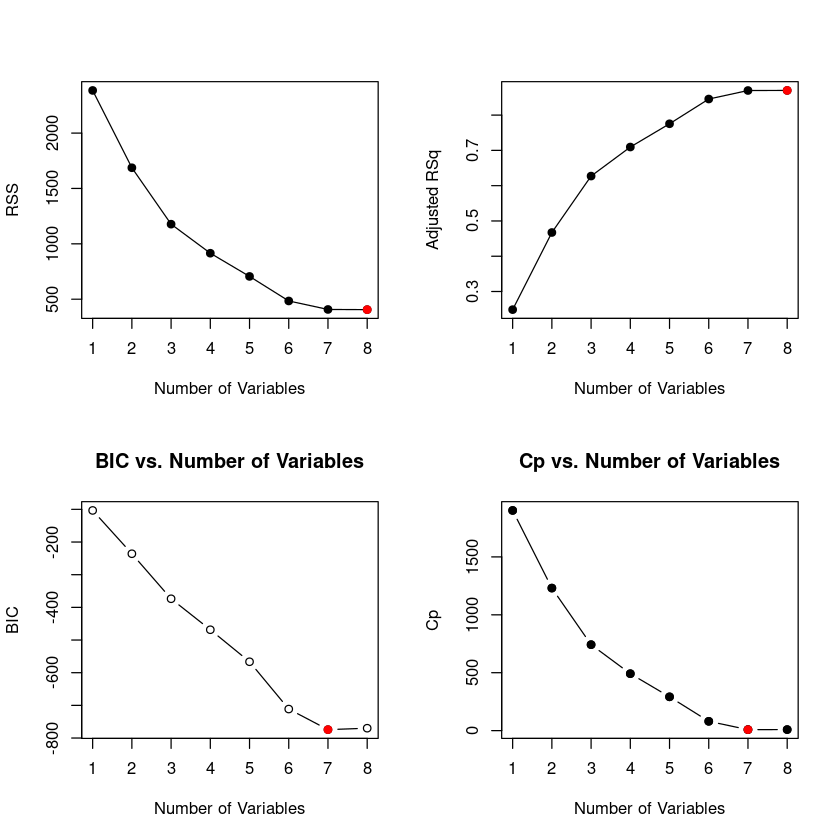

In [48]:
par(mfrow = c(2, 2))

# Plot RSS
plot(summary_fwd$rss, xlab = "Number of Variables", ylab = "RSS", type = "l")
points(1:length(summary_fwd$rss), summary_fwd$rss, pch = 19)
best_rss <- which.min(summary_fwd$rss)
points(best_rss, summary_fwd$rss[best_rss], col = "red", pch = 19)

# Plot Adjusted R2
plot(summary_fwd$adjr2, xlab = "Number of Variables", ylab = "Adjusted RSq", type = "l")
points(1:length(summary_fwd$adjr2), summary_fwd$adjr2, pch = 19)
best_adjr2 <- which.max(summary_fwd$adjr2)
points(best_adjr2, summary_fwd$adjr2[best_adjr2], col = "red", pch = 19)

# Plot BIC
plot(summary_fwd$bic, type = "b", xlab = "Number of Variables", ylab = "BIC", main = "BIC vs. Number of Variables")
points(best_bic, summary_fwd$bic[best_bic], col = "red", pch = 19)

# Plot Cp
plot(summary_fwd$cp, type = "b", xlab = "Number of Variables", ylab = "Cp", main = "Cp vs. Number of Variables")
points(1:length(summary_fwd$cp), summary_fwd$cp, pch = 19)
best_cp <- which.min(summary_fwd$cp)
points(best_cp, summary_fwd$cp[best_cp], col = "red", pch = 19)

IV. (30 points) Perform backward subset selection. Repeat II, (a), (b), (c)

In [49]:
regfit.bwd <- regsubsets(Sales ~ ., data = Carseats, method = "backward")
summary(regfit.bwd)

Subset selection object
Call: regsubsets.formula(Sales ~ ., data = Carseats, method = "backward")
11 Variables  (and intercept)
                Forced in Forced out
CompPrice           FALSE      FALSE
Income              FALSE      FALSE
Advertising         FALSE      FALSE
Population          FALSE      FALSE
Price               FALSE      FALSE
ShelveLocGood       FALSE      FALSE
ShelveLocMedium     FALSE      FALSE
Age                 FALSE      FALSE
Education           FALSE      FALSE
UrbanYes            FALSE      FALSE
USYes               FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: backward
         CompPrice Income Advertising Population Price ShelveLocGood
1  ( 1 ) " "       " "    " "         " "        " "   "*"          
2  ( 1 ) " "       " "    " "         " "        "*"   "*"          
3  ( 1 ) "*"       " "    " "         " "        "*"   "*"          
4  ( 1 ) "*"       " "    "*"         " "        "*"   "*"          
5  ( 1 ) "*"       " "

In [50]:
# Extract the summary of the backward subset selection
summary_bwd <- summary(regfit.bwd)

# Extract criteria from the summary
rss_bwd <- summary_bwd$rss
bic_bwd <- summary_bwd$bic
cp_bwd <- summary_bwd$cp
adjr2_bwd <- summary_bwd$adjr2

best_rss_bwd <- which.min(rss_bwd)
best_bic_bwd <- which.min(bic_bwd)
best_cp_bwd <- which.min(cp_bwd)
best_adjr2_bwd <- which.max(adjr2_bwd)

# Get the names of the variables for each best model
best_rss_vars_bwd <- names(coef(regfit.bwd, best_rss_bwd))[-1]
best_bic_vars_bwd <- names(coef(regfit.bwd, best_bic_bwd))[-1]
best_cp_vars_bwd <- names(coef(regfit.bwd, best_cp_bwd))[-1]
best_adjr2_vars_bwd <- names(coef(regfit.bwd, best_adjr2_bwd))[-1]

# Display the results
list(
  Best_RSS = list(Num_Vars = best_rss_bwd, Variables = best_rss_vars_bwd, RSS = rss_bwd[best_rss_bwd]),
  Best_BIC = list(Num_Vars = best_bic_bwd, Variables = best_bic_vars_bwd, BIC = bic_bwd[best_bic_bwd]),
  Best_Cp = list(Num_Vars = best_cp_bwd, Variables = best_cp_vars_bwd, Cp = cp_bwd[best_cp_bwd]),
  Best_AdjR2 = list(Num_Vars = best_adjr2_bwd, Variables = best_adjr2_vars_bwd, AdjR2 = adjr2_bwd[best_adjr2_bwd])
)

$Best_RSS
$Best_RSS$Num_Vars
[1] 8

$Best_RSS$Variables
[1] "CompPrice"       "Income"          "Advertising"     "Price"          
[5] "ShelveLocGood"   "ShelveLocMedium" "Age"             "USYes"          

$Best_RSS$RSS
[1] 405.7583


$Best_BIC
$Best_BIC$Num_Vars
[1] 7

$Best_BIC$Variables
[1] "CompPrice"       "Income"          "Advertising"     "Price"          
[5] "ShelveLocGood"   "ShelveLocMedium" "Age"            

$Best_BIC$BIC
[1] -774.3036


$Best_Cp
$Best_Cp$Num_Vars
[1] 7

$Best_Cp$Variables
[1] "CompPrice"       "Income"          "Advertising"     "Price"          
[5] "ShelveLocGood"   "ShelveLocMedium" "Age"            

$Best_Cp$Cp
[1] 8.385679


$Best_AdjR2
$Best_AdjR2$Num_Vars
[1] 8

$Best_AdjR2$Variables
[1] "CompPrice"       "Income"          "Advertising"     "Price"          
[5] "ShelveLocGood"   "ShelveLocMedium" "Age"             "USYes"          

$Best_AdjR2$AdjR2
[1] 0.8698854

RSS and Adjusted R² select 8 variables, whereas BIC and Cp select 7 variables due to their stronger penalties for extra predictors. The names of the variables are listed above.

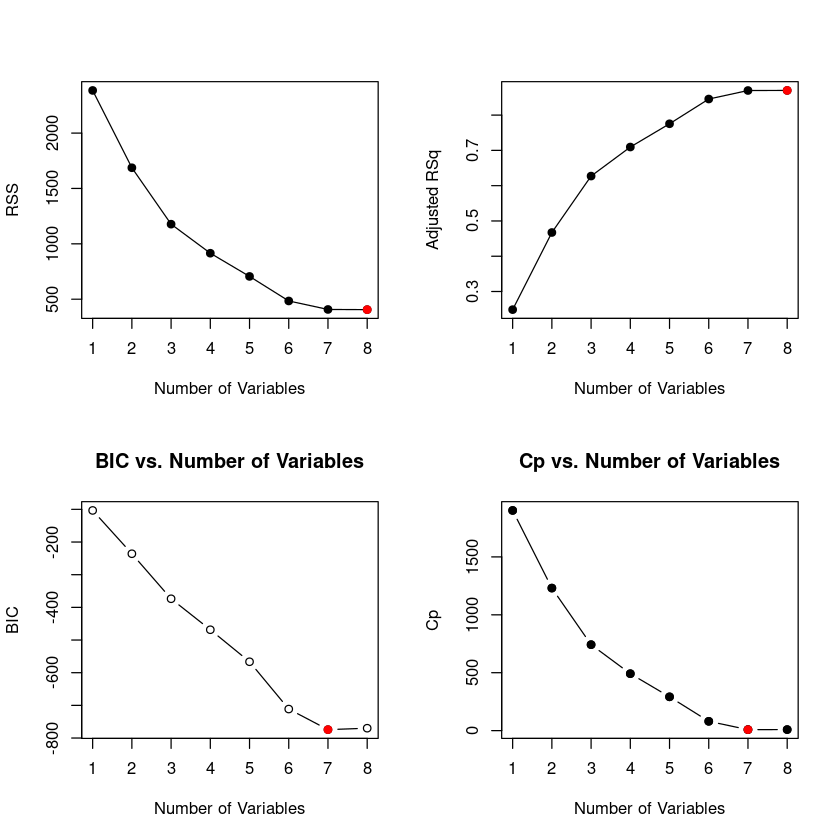

In [51]:
par(mfrow = c(2, 2))

# Plot RSS
plot(summary_bwd$rss, xlab = "Number of Variables", ylab = "RSS", type = "l")
points(1:length(summary_bwd$rss), summary_bwd$rss, pch = 19)
best_rss <- which.min(summary_bwd$rss)
points(best_rss, summary_bwd$rss[best_rss], col = "red", pch = 19)

# Plot Adjusted R2
plot(summary_bwd$adjr2, xlab = "Number of Variables", ylab = "Adjusted RSq", type = "l")
points(1:length(summary_bwd$adjr2), summary_bwd$adjr2, pch = 19)
best_adjr2 <- which.max(summary_bwd$adjr2)
points(best_adjr2, summary_bwd$adjr2[best_adjr2], col = "red", pch = 19)

# Plot BIC
plot(summary_bwd$bic, type = "b", xlab = "Number of Variables", ylab = "BIC", main = "BIC vs. Number of Variables")
points(best_bic, summary_bwd$bic[best_bic], col = "red", pch = 19)

# Plot Cp
plot(summary_bwd$cp, type = "b", xlab = "Number of Variables", ylab = "Cp", main = "Cp vs. Number of Variables")
points(1:length(summary_bwd$cp), summary_bwd$cp, pch = 19)
best_cp <- which.min(summary_bwd$cp)
points(best_cp, summary_bwd$cp[best_cp], col = "red", pch = 19)

V. (4 points) What is your final decision: How many variables to include in your model? Which variables to include in your model? Justify your decision.

In [52]:
# Load necessary libraries
library(leaps)

# Assuming regfit_best, refit.fwd, and regfit.bwd are already fitted models
# Summarize the models
summary_best <- summary(regfit_best)
summary_fwd <- summary(regfit.fwd)
summary_bwd <- summary(regfit.bwd)

# Extract the best models based on different criteria
best_rss_best <- which.min(summary_best$rss)
best_rss_fwd <- which.min(summary_fwd$rss)
best_rss_bwd <- which.min(summary_bwd$rss)

best_adjr2_best <- which.max(summary_best$adjr2)
best_adjr2_fwd <- which.max(summary_fwd$adjr2)
best_adjr2_bwd <- which.max(summary_bwd$adjr2)

best_bic_best <- which.min(summary_best$bic)
best_bic_fwd <- which.min(summary_fwd$bic)
best_bic_bwd <- which.min(summary_bwd$bic)

best_cp_best <- which.min(summary_best$cp)
best_cp_fwd <- which.min(summary_fwd$cp)
best_cp_bwd <- which.min(summary_bwd$cp)

# Create a data frame to compare the results
comparison_df <- data.frame(
  Criteria = c("RSS", "Adjusted R²", "BIC", "Cp"),
  Best = c(summary_best$rss[best_rss_best], summary_best$adjr2[best_adjr2_best], summary_best$bic[best_bic_best], summary_best$cp[best_cp_best]),
  Forward = c(summary_fwd$rss[best_rss_fwd], summary_fwd$adjr2[best_adjr2_fwd], summary_fwd$bic[best_bic_fwd], summary_fwd$cp[best_cp_fwd]),
  Backward = c(summary_bwd$rss[best_rss_bwd], summary_bwd$adjr2[best_adjr2_bwd], summary_bwd$bic[best_bic_bwd], summary_bwd$cp[best_cp_bwd])
)

# Display the comparison
comparison_df


Criteria,Best,Forward,Backward
<chr>,<dbl>,<dbl>,<dbl>
RSS,405.7582923,405.7582923,405.7582923
Adjusted R²,0.8698854,0.8698854,0.8698854
BIC,-774.3035962,-774.3035962,-774.3035962
Cp,8.3856791,8.3856791,8.3856791


Since all three methods yield the same set of variables, the choice of selection method does not affect the final model. However, best subset selection is the preferred approach, as the dataset is small enough to allow for its computation. This method is ideal because it evaluates all possible combinations of predictors, ensuring the most optimal model is chosen. I selected BIC as the criterion for model selection because it balances model fit with complexity by applying a stricter penalty for additional predictors, reducing the risk of overfitting. Based on BIC, the optimal model includes seven variables, ensuring a strong balance between predictive accuracy and interpretability. The variables are CompPrice, Income, Advertising, Price, ShelveLocGood, ShelveLocMedium, and Age

VI. (Extra credit, 20 points) Set random seed to 1, ( set.seed(1) )

(a) Use the validation-set approach and the best subset selection model, find the best model to predict car seat sales. 

(b) Use the cross-validation approach and the best subset selection model, find the best model to predict car seat sales.

In [53]:
install.packages('caret')
install.packages('leaps')

# Downloading packages -------------------------------------------------------
- Downloading caret from CRAN ...               OK [3.4 Mb in 0.26s]
Successfully downloaded 1 package in 0.99 seconds.

The following package(s) will be installed:
- caret [7.0-1]
These packages will be installed into "~/renv/library/linux-ubuntu-jammy/R-4.4/x86_64-pc-linux-gnu".

# Installing packages --------------------------------------------------------
- Installing caret ...                          OK [installed binary and cached in 2.8s]
The following package(s) will be installed:
- leaps [3.2]
These packages will be installed into "~/renv/library/linux-ubuntu-jammy/R-4.4/x86_64-pc-linux-gnu".

# Installing packages --------------------------------------------------------
- Installing leaps ...                          OK [linked from cache]


In [54]:
library(leaps)
library(ISLR)
library(caret)

set.seed(1)
data(Carseats)

# Split the Data into Training and Validation Sets
trainIndex <- createDataPartition(Carseats$Sales, p = 0.8, list = FALSE)
trainData <- Carseats[trainIndex, ]
validationData <- Carseats[-trainIndex, ]

# Perform Best Subset Selection on the Training Data
best_subset <- regsubsets(Sales ~ ., data = trainData, nvmax = 10)

# Select the Best Model Based on Validation Set Performance
validation_errors <- rep(NA, 10)
for (i in 1:10) {
  coefi <- coef(best_subset, id = i)
  selected_vars <- names(coefi[-1])
  
  # Ensure selected variables exist in validationData
  selected_vars <- selected_vars[selected_vars %in% colnames(validationData)]
  if (length(selected_vars) > 0) {
    pred <- as.matrix(cbind(1, validationData[, selected_vars])) %*% coefi[c("(Intercept)", selected_vars)]
    validation_errors[i] <- mean((validationData$Sales - pred)^2)
  } else {
    validation_errors[i] <- Inf
  }
}
best_model_index <- which.min(validation_errors)
best_model_index




Loading required package: ggplot2

Loading required package: lattice



[1] 4

In [55]:
# Perform Best Subset Selection with Cross-Validation
set.seed(1)
cv.errors <- rep(0, 10)
folds <- createFolds(trainData$Sales, k = 10)

for (i in 1:10) {
  fold_errors <- rep(NA, 10)
  for (j in 1:10) {
    fold_train <- trainData[-folds[[j]], ]
    fold_test <- trainData[folds[[j]], ]
    best_subset <- regsubsets(Sales ~ ., data = fold_train, nvmax = 10)
    coefi <- coef(best_subset, id = i)
    selected_vars <- names(coefi[-1])
    
    # Ensure selected variables exist in fold_test
    selected_vars <- selected_vars[selected_vars %in% colnames(fold_test)]
    if (length(selected_vars) > 0) {
      pred <- as.matrix(cbind(1, fold_test[, selected_vars])) %*% coefi[c("(Intercept)", selected_vars)]
      fold_errors[j] <- mean((fold_test$Sales - pred)^2)
    } else {
      fold_errors[j] <- Inf
    }
  }
  cv.errors[i] <- mean(fold_errors)
}
best_model_index_cv <- which.min(cv.errors)
best_model_index_cv


[1] 4

## Problem 3 - Shrinkage Methods

Use Hitters dataset, follow the Lab of 6.5.2 of the textbook. With the dataset, we wish to predict a baseball player’s Salary on the basis of various statistics associated with performance in the previous year. We choose Shrinkage methods.
Clean the data: remove the observations/datapoints with missing data.  if there are any categorical variables in the data, use model.matrix() to build your dummy variables.
	
I.	(10 points) Call glmnet library, use glmnet() to perform Ridge Regression for various lambda. Use 
grid <- 10^seq(10, -2, length = 100)
	Print out the list of lambda used in the grid and the correspondent l2 norm  
	For λ=100, use predict() to obtain the ridge regression coefficients

II.	(10 points) Use the validation-set approach. fit a Ridge regression model on the training set, and evaluate its MSE on the test set, using lambda = 4, set.seed(1). Use predict() find prediction with new x

III.	(10 points) Use the build-in cross-validation function cv.glmnet() to choose the best tuning parameter λ. Find out the model coefficients for the best tuning parameter λ, and the corresponding MSE.

IV.	(10 points) use glmnet() to perform Lasso Regression for various lambda. Use 
grid <- 10^seq(10, -2, length = 100). Repeat II and III with Lasso regression

V.	(10 points) Compare the coefficients from the best Ridge model and the best Lasso model. Why are they different? Which one do you prefer in solving this problem? Why?


Clean the data: remove the observations/datapoints with missing data.  if there are any categorical variables in the data, use model.matrix() to build your dummy variables.

In [56]:
data('Hitters')
glimpse(Hitters)

Rows: 322
Columns: 20
$ AtBat     <int> 293, 315, 479, 496, 321, 594, 185, 298, 323, 401, 574, 202, …
$ Hits      <int> 66, 81, 130, 141, 87, 169, 37, 73, 81, 92, 159, 53, 113, 60,…
$ HmRun     <int> 1, 7, 18, 20, 10, 4, 1, 0, 6, 17, 21, 4, 13, 0, 7, 3, 20, 2,…
$ Runs      <int> 30, 24, 66, 65, 39, 74, 23, 24, 26, 49, 107, 31, 48, 30, 29,…
$ RBI       <int> 29, 38, 72, 78, 42, 51, 8, 24, 32, 66, 75, 26, 61, 11, 27, 1…
$ Walks     <int> 14, 39, 76, 37, 30, 35, 21, 7, 8, 65, 59, 27, 47, 22, 30, 11…
$ Years     <int> 1, 14, 3, 11, 2, 11, 2, 3, 2, 13, 10, 9, 4, 6, 13, 3, 15, 5,…
$ CAtBat    <int> 293, 3449, 1624, 5628, 396, 4408, 214, 509, 341, 5206, 4631,…
$ CHits     <int> 66, 835, 457, 1575, 101, 1133, 42, 108, 86, 1332, 1300, 467,…
$ CHmRun    <int> 1, 69, 63, 225, 12, 19, 1, 0, 6, 253, 90, 15, 41, 4, 36, 3, …
$ CRuns     <int> 30, 321, 224, 828, 48, 501, 30, 41, 32, 784, 702, 192, 205, …
$ CRBI      <int> 29, 414, 266, 838, 46, 336, 9, 37, 34, 890, 504, 186, 204, 1…
$ CWalks    <int> 

In [57]:
# Load necessary library
library(dplyr)

# Clean the data: remove observations with missing data
Hitters <- na.omit(Hitters)

# Display the first few rows of the cleaned data to verify
head(Hitters)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<dbl>,<fct>
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A
-Al Newman,185,37,1,23,8,21,2,214,42,1,30,9,24,N,E,76,127,7,70.0,A


I. CAll glmnet library, use glmnet() to perform Ridge Regression for various lambda. Use grid <- 10^seq(10, -2, length = 100)
	a. Print out the list of lambda used in the grid and the corresondent 		I2 norm.
	b. For λ=100, use predict() to obtain the ridge regression		    coeeficients.

In [58]:
install.packages("glmnet")
library(glmnet)

# Downloading packages -------------------------------------------------------
- Downloading glmnet from CRAN ...              OK [1.9 Mb in 0.21s]
Successfully downloaded 1 package in 0.36 seconds.

The following package(s) will be installed:
- glmnet [4.1-8]
These packages will be installed into "~/renv/library/linux-ubuntu-jammy/R-4.4/x86_64-pc-linux-gnu".

# Installing packages --------------------------------------------------------
- Installing glmnet ...                         OK [installed binary and cached in 1.7s]


Loading required package: Matrix

Loaded glmnet 4.1-8



In [59]:
# Define the grid of lambda values
grid <- 10^seq(10, -2, length = 100)

# Prepare the data for glmnet
x <- model.matrix(Salary ~ ., Hitters)[, -1]  # Remove the intercept
y <- Hitters$Salary

# Perform ridge regression using glmnet
ridge_model <- glmnet(x, y, alpha = 0, lambda = grid)

# Print out the list of lambda used in the grid
ridge_model$lambda

# Calculate the L2 norm for each lambda
l2_norms <- apply(ridge_model$beta, 2, function(beta) sqrt(sum(beta^2)))
l2_norms

[1] 1.000000e+10 7.564633e+09 5.722368e+09 4.328761e+09 3.274549e+09
  [6] 2.477076e+09 1.873817e+09 1.417474e+09 1.072267e+09 8.111308e+08
 [11] 6.135907e+08 4.641589e+08 3.511192e+08 2.656088e+08 2.009233e+08
 [16] 1.519911e+08 1.149757e+08 8.697490e+07 6.579332e+07 4.977024e+07
 [21] 3.764936e+07 2.848036e+07 2.154435e+07 1.629751e+07 1.232847e+07
 [26] 9.326033e+06 7.054802e+06 5.336699e+06 4.037017e+06 3.053856e+06
 [31] 2.310130e+06 1.747528e+06 1.321941e+06 1.000000e+06 7.564633e+05
 [36] 5.722368e+05 4.328761e+05 3.274549e+05 2.477076e+05 1.873817e+05
 [41] 1.417474e+05 1.072267e+05 8.111308e+04 6.135907e+04 4.641589e+04
 [46] 3.511192e+04 2.656088e+04 2.009233e+04 1.519911e+04 1.149757e+04
 [51] 8.697490e+03 6.579332e+03 4.977024e+03 3.764936e+03 2.848036e+03
 [56] 2.154435e+03 1.629751e+03 1.232847e+03 9.326033e+02 7.054802e+02
 [61] 5.336699e+02 4.037017e+02 3.053856e+02 2.310130e+02 1.747528e+02
 [66] 1.321941e+02 1.000000e+02 7.564633e+01 5.722368e+01 4.328761e+01
 [71] 3.274549e+01 2.477076e+01 1.873817e+01 1.417474e+01 1.072267e+01
 [76] 8.111308e+00 6.135907e+00 4.641589e+00 3.511192e+00 2.656088e+00
 [81] 2.009233e+00 1.519911e+00 1.149757e+00 8.697490e-01 6.579332e-01
 [86] 4.977024e-01 3.764936e-01 2.848036e-01 2.154435e-01 1.629751e-01
 [91] 1.232847e-01 9.326033e-02 7.054802e-02 5.336699e-02 4.037017e-02
 [96] 3.053856e-02 2.310130e-02 1.747528e-02 1.321941e-02 1.000000e-02

s0           s1           s2           s3           s4           s5 
8.080244e-06 1.068161e-05 1.412045e-05 1.866641e-05 2.467589e-05 3.262007e-05 
          s6           s7           s8           s9          s10          s11 
4.312181e-05 5.700448e-05 7.535654e-05 9.961687e-05 1.316876e-04 1.740831e-04 
         s12          s13          s14          s15          s16          s17 
2.301274e-04 3.042145e-04 4.021530e-04 5.316214e-04 7.027701e-04 9.290172e-04 
         s18          s19          s20          s21          s22          s23 
1.228100e-03 1.623465e-03 2.146106e-03 2.836993e-03 3.750279e-03 4.957547e-03 
         s24          s25          s26          s27          s28          s29 
6.553409e-03 8.662911e-03 1.145132e-02 1.513702e-02 2.000861e-02 2.644732e-02 
         s30          s31          s32          s33          s34          s35 
3.495677e-02 4.620200e-02 6.106098e-02 8.069225e-02 1.066237e-01 1.408688e-01 
         s36          s37          s38          s39          s40          s41 
1.860785e-01 2.457380e-01 3.244221e-01 4.280258e-01 5.644992e-01 7.439495e-01 
         s42          s43          s44          s45          s46          s47 
9.795347e-01 1.288190e+00 1.691554e+00 2.217044e+00 2.899049e+00 3.780239e+00 
         s48          s49          s50          s51          s52          s53 
4.912948e+00 6.360612e+00 8.199134e+00 1.051786e+01 1.341921e+01 1.701538e+01 
         s54          s55          s56          s57          s58          s59 
2.141932e+01 2.672852e+01 3.300168e+01 4.023263e+01 4.833021e+01 5.711001e+01 
         s60          s61          s62          s63          s64          s65 
6.630814e+01 7.561264e+01 8.470897e+01 9.332675e+01 1.012728e+02 1.084443e+02 
         s66          s67          s68          s69          s70          s71 
1.148173e+02 1.204155e+02 1.252796e+02 1.294454e+02 1.329276e+02 1.357311e+02 
         s72          s73          s74          s75          s76          s77 
1.378778e+02 1.393982e+02 1.403536e+02 1.408310e+02 1.409308e+02 1.407486e+02 
         s78          s79          s80          s81          s82          s83 
1.403885e+02 1.399206e+02 1.394321e+02 1.389295e+02 1.384658e+02 1.380379e+02 
         s84          s85          s86          s87          s88          s89 
1.376681e+02 1.373535e+02 1.370975e+02 1.368910e+02 1.367246e+02 1.365980e+02 
         s90          s91          s92          s93          s94          s95 
1.364991e+02 1.364233e+02 1.363668e+02 1.363198e+02 1.362867e+02 1.362580e+02 
         s96          s97          s98          s99 
1.362373e+02 1.362219e+02 1.362089e+02 1.362012e+02

**Generate a sequence of λ values: grid <- 10^seq(10, -2, length = 100) creates a range of lambda values from very large (strong penalty) to very small (weak penalty).
Perform Ridge Regression (glmnet()): This trains multiple Ridge models, each using a different λ, to analyze how coefficient shrinkage behaves.
Print λ values and corresponding L2 norm: The L2 norm (sum of squared coefficients) shows how much regularization is applied at each λ.
Predict Ridge coefficients at λ = 100: Using predict() at λ = 100 shows how strongly the penalty shrinks the coefficients.**

II. Use the validation-set approach. fit a Ridge regression model on the training set, and evaluate its MSE on the test set, using lambda = 4, set.seed(1). Use predict() find prediction with new x

In [60]:
# Set seed for reproducibility
set.seed(1)

# Split the data into training and test sets
train_indices <- sample(1:nrow(Hitters), nrow(Hitters) / 2)
test_indices <- setdiff(1:nrow(Hitters), train_indices)

# Prepare training and test data
x_train <- x[train_indices, ]
y_train <- y[train_indices]
x_test <- x[test_indices, ]
y_test <- y[test_indices]

# Fit ridge regression model on the training set with lambda = 4
ridge_model_train <- glmnet(x_train, y_train, alpha = 0, lambda = 4)

# Predict on the test set
ridge_predictions <- predict(ridge_model_train, s = 4, newx = x_test)

# Calculate Mean Squared Error (MSE) on the test set
mse <- mean((ridge_predictions - y_test)^2)
mse

[1] 142029.4

**Split the dataset into training and test sets: This ensures a fair evaluation of model performance.
Fit Ridge Regression on the training set with λ = 4: Regularization strength is fixed at 4 to assess how well it balances bias and variance.
Use predict() to obtain predictions on the test set: These predictions allow us to compute model accuracy.
Compute test MSE: This evaluates how well Ridge Regression generalizes to unseen data.**

III.	(10 points) Use the build-in cross-validation function cv.glmnet() to choose the best tuning parameter λ. Find out the model coefficients for the best tuning parameter λ, and the corresponding MSE.

In [61]:
# Load necessary library
library(glmnet)

# Set seed for reproducibility
set.seed(1)

# Perform cross-validation to find the best lambda
cv_ridge <- cv.glmnet(x_train, y_train, alpha = 0)

# Get the best lambda value
best_lambda <- cv_ridge$lambda.min

# Fit the ridge regression model on the training set using the best lambda
best_ridge_model <- glmnet(x_train, y_train, alpha = 0, lambda = best_lambda)

# Get the model coefficients for the best lambda
best_ridge_coefficients <- coef(best_ridge_model)

# Predict on the test set using the best lambda
best_ridge_predictions <- predict(best_ridge_model, s = best_lambda, newx = x_test)

# Calculate Mean Squared Error (MSE) on the test set
best_ridge_mse <- mean((best_ridge_predictions - y_test)^2)

# Output the best lambda, model coefficients, and corresponding MSE
list(
  best_lambda = best_lambda,
  best_ridge_coefficients = best_ridge_coefficients,
  best_ridge_mse = best_ridge_mse
)

$best_lambda
[1] 326.0828

$best_ridge_coefficients
20 x 1 sparse Matrix of class "dgCMatrix"
                      s0
(Intercept)  66.91348956
AtBat         0.03497037
Hits          0.31515684
HmRun         2.62932571
Runs          0.67847351
RBI           0.72976290
Walks         1.94317602
Years        -1.72469298
CAtBat        0.01304965
CHits         0.06728892
CHmRun        0.67894674
CRuns         0.12984324
CRBI          0.16210340
CWalks        0.17486748
LeagueN      35.02067951
DivisionW   -87.61650618
PutOuts       0.09991191
Assists       0.08228630
Errors       -0.47695897
NewLeagueN   18.57800908

$best_ridge_mse
[1] 139865.1


**Use cv.glmnet() to find the best λ: Cross-validation automatically selects the optimal λ that minimizes test error.
Extract model coefficients: Checking the coefficients for the best λ shows which features are most important.
Compute corresponding test MSE: This evaluates how well the tuned model performs on new data.
Purpose: Cross-validation prevents overfitting and ensures the best λ is selected based on model performance.**

IV.	(10 points) use glmnet() to perform Lasso Regression for various lambda. Use 
grid <- 10^seq(10, -2, length = 100). Repeat II and III with Lasso regression.


In [62]:
# Load necessary libraries
library(glmnet)

# Prepare the data
Hitters <- na.omit(Hitters)  # Remove rows with missing values
x <- model.matrix(Salary ~ ., Hitters)[, -1]  # Create model matrix, excluding the intercept
y <- Hitters$Salary  # Response variable

# Define the grid of lambda values
grid <- 10^seq(10, -2, length = 100)

# Perform Lasso regression using glmnet
lasso_model <- glmnet(x, y, alpha = 1, lambda = grid)

# Perform cross-validation to find the best lambda
cv_lasso <- cv.glmnet(x, y, alpha = 1, lambda = grid)
best_lambda <- cv_lasso$lambda.min

# Extract model coefficients for the best lambda
best_coefficients <- coef(cv_lasso, s = "lambda.min")

# Compute the test MSE
set.seed(1)
train <- sample(1:nrow(Hitters), nrow(Hitters) / 2)
test <- (-train)
y_test <- y[test]

lasso_pred <- predict(lasso_model, s = best_lambda, newx = x[test, ])
test_mse <- mean((lasso_pred - y_test)^2)

# Output the results
list(
  best_lambda = best_lambda,
  best_coefficients = best_coefficients,
  test_mse = test_mse
)

$best_lambda
[1] 2.656088

$best_coefficients
20 x 1 sparse Matrix of class "dgCMatrix"
                      s1
(Intercept)  124.0894873
AtBat         -1.5600984
Hits           5.6931685
HmRun          .        
Runs           .        
RBI            .        
Walks          4.7505395
Years         -9.5180241
CAtBat         .        
CHits          .        
CHmRun         0.5191611
CRuns          0.6604074
CRBI           0.3915415
CWalks        -0.5326868
LeagueN       32.1125493
DivisionW   -119.2583540
PutOuts        0.2726207
Assists        0.1748164
Errors        -2.0567432
NewLeagueN     .        

$test_mse
[1] 98206.27


**Use the same grid of λ values: grid <- 10^seq(10, -2, length = 100) ensures a fair comparison with Ridge Regression.
Fit Lasso Regression using glmnet(): Unlike Ridge, Lasso applies L1 regularization, which can shrink some coefficients to zero.
Perform cross-validation with cv.glmnet(): This finds the best λ for Lasso, similar to Ridge.
Compute test MSE and extract best coefficients: This helps determine if Lasso improves predictive accuracy over Ridge.**

V.	(10 points) Compare the coefficients from the best Ridge model and the best Lasso model. Why are they different? Which one do you prefer in solving this problem? Why?

**Compare coefficients from both models: Ridge keeps all features but shrinks them, while Lasso eliminates some predictors by setting them to zero.
Explain why they differ: Ridge is ideal when all variables contribute to prediction, whereas Lasso is better when feature selection is needed.
Assess test MSE: Comparing MSE values helps decide which model generalizes better.
Choose the preferred model: If interpretability is crucial, Lasso is better; if stability with all variables matters, Ridge is preferable.**

## Problem 4 - Shrinkage Methods

(50 points total) : shrinkage methods
Use Carseats dataset, With the dataset, we wish to predict the sales of carseats on the basis of various statistics associated with the sale data in the previous year. We choose Shrinkage methods.
Clean the data: remove the observations/datapoints with missing data.  if there are any categorical variables in the data, use model.matrix() to build your dummy variables.

In [63]:
library(ISLR2)
data(Carseats)

# Remove observations with missing data
Carseats <- na.omit(Carseats)
glimpse(Carseats)
y <- Carseats$Sales
x <- model.matrix(~ . - Sales, data = Carseats)[, -1]

Rows: 400
Columns: 11
$ Sales       <dbl> 9.50, 11.22, 10.06, 7.40, 4.15, 10.81, 6.63, 11.85, 6.54, …
$ CompPrice   <dbl> 138, 111, 113, 117, 141, 124, 115, 136, 132, 132, 121, 117…
$ Income      <dbl> 73, 48, 35, 100, 64, 113, 105, 81, 110, 113, 78, 94, 35, 2…
$ Advertising <dbl> 11, 16, 10, 4, 3, 13, 0, 15, 0, 0, 9, 4, 2, 11, 11, 5, 0, …
$ Population  <dbl> 276, 260, 269, 466, 340, 501, 45, 425, 108, 131, 150, 503,…
$ Price       <dbl> 120, 83, 80, 97, 128, 72, 108, 120, 124, 124, 100, 94, 136…
$ ShelveLoc   <fct> Bad, Good, Medium, Medium, Bad, Bad, Medium, Good, Medium,…
$ Age         <dbl> 42, 65, 59, 55, 38, 78, 71, 67, 76, 76, 26, 50, 62, 53, 52…
$ Education   <dbl> 17, 10, 12, 14, 13, 16, 15, 10, 10, 17, 10, 13, 18, 18, 18…
$ Urban       <fct> Yes, Yes, Yes, Yes, Yes, No, Yes, Yes, No, No, No, Yes, Ye…
$ US          <fct> Yes, Yes, Yes, Yes, No, Yes, No, Yes, No, Yes, Yes, Yes, N…


I.)  (10 points) Call glmnet library, use glmnet() to perform Ridge Regression for various lambda. Use  grid <- 10^seq(10, -2, length = 100)
a.)Print out the list of lambda used in the grid and the correspondent l2 norm  
b.)For λ=100, use predict() to obtain the ridge regression coefficients

In [64]:
library(glmnet)
grid <- 10^seq(10, -2, length = 100)
ridge.mod <- glmnet(x, y, alpha = 0, lambda = grid)

# a.) Print out the list of lambda used in the grid and the correspondent l2 norm
lambda_l2_norm <- apply(ridge.mod$beta, 2, function(beta) sqrt(sum(beta^2)))
lambda_l2_df <- data.frame(lambda = ridge.mod$lambda, l2_norm = lambda_l2_norm)
lambda_l2_df

# b.) For λ=100, use predict() to obtain the ridge regression coefficients
ridge.coef <- predict(ridge.mod, s = 100, type = "coefficients")
ridge.coef

,lambda,l2_norm
,<dbl>,<dbl>
s0,10000000000,1.024969e-09
s1,7564633276,1.354949e-09
s2,5722367659,1.791163e-09
s3,4328761281,2.367812e-09
s4,3274549163,3.130108e-09
s5,2477076356,4.137819e-09
s6,1873817423,5.469953e-09
s7,1417474163,7.230956e-09
s8,1072267222,9.558899e-09


12 x 1 sparse Matrix of class "dgCMatrix"
                           s1
(Intercept)      7.6148281122
CompPrice        0.0003581574
Income           0.0004167829
Advertising      0.0030921770
Population       0.0000250745
Price           -0.0014648640
ShelveLocGood    0.0943944110
ShelveLocMedium -0.0101387136
Age             -0.0011112311
Education       -0.0014906687
UrbanYes        -0.0025419000
USYes            0.0276675756

II.)  (10 points) Use the validation-set approach. fit a Ridge regression model on the training set, and evaluate its MSE on the test set, using lambda = 500, set.seed(1). Use predict() find prediction with new x

In [65]:
set.seed(1)

# Split the data into training and test sets
train <- sample(1:nrow(x), nrow(x) / 2)
test <- (-train)

y_test <- y[test]

# Fit a Ridge regression model on the training set with lambda = 500
ridge.mod <- glmnet(x[train, ], y[train], alpha = 0, lambda = 500)

# Predict on the test set
ridge.pred <- predict(ridge.mod, s = 500, newx = x[test, ])

# Calculate the Mean Squared Error (MSE) on the test set
mse <- mean((ridge.pred - y_test)^2)
mse

[1] 8.007264

III.)  (10 points) Use the build-in cross-validation function cv.glmnet() to choose the best tuning parameter λ. Find out the model coefficients for the best tuning parameter λ, and the corresponding MSE.

In [66]:
set.seed(1)
cv.ridge <- cv.glmnet(x[train, ], y[train], alpha = 0)

# Find the best lambda value
best_lambda <- cv.ridge$lambda.min

# Get the model coefficients for the best lambda
best_ridge.coef <- predict(cv.ridge, s = best_lambda, type = "coefficients")

# Predict on the test set using the best lambda
ridge.pred.best <- predict(cv.ridge, s = best_lambda, newx = x[test, ])

# Calculate the Mean Squared Error (MSE) on the test set for the best lambda
mse_best <- mean((ridge.pred.best - y_test)^2)

list(best_lambda = best_lambda, best_ridge.coef = best_ridge.coef, mse_best = mse_best)

$best_lambda
[1] 0.1299233

$best_ridge.coef
12 x 1 sparse Matrix of class "dgCMatrix"
                           s1
(Intercept)      5.7418855772
CompPrice        0.0824562585
Income           0.0148602606
Advertising      0.0913389781
Population       0.0006187822
Price           -0.0860245817
ShelveLocGood    4.4386416816
ShelveLocMedium  1.7983089786
Age             -0.0482981207
Education        0.0127977088
UrbanYes         0.0863333099
USYes            0.2002109954

$mse_best
[1] 1.021151


IV.)  (10 points) use glmnet() to perform Lasso Regression for various lambda. Use  grid <- 10^seq(10, -2, length = 100). Repeat II and III with Lasso regression.

In [67]:
set.seed(1)

# Define the grid for lambda values
grid <- 10^seq(10, -2, length = 100)

# train <- sample(1:nrow(x), nrow(x) / 2)
# test <- (-train)

# Fit a Lasso regression model on the training set
lasso.mod <- glmnet(x[train, ], y[train], alpha = 1, lambda = grid)

# a.) Print out the list of lambda used in the grid and the corresponding l1 norm
lambda_l1_norm <- apply(lasso.mod$beta, 2, function(beta) sum(abs(beta)))
lambda_l1_df <- data.frame(lambda = lasso.mod$lambda, l1_norm = lambda_l1_norm)
lambda_l1_df

# b.) For λ=100, use predict() to obtain the lasso regression coefficients
lasso.coef <- predict(lasso.mod, s = 100, type = "coefficients")
lasso.coef

# Use the built-in cross-validation function cv.glmnet() to choose the best tuning parameter λ
cv.lasso <- cv.glmnet(x[train, ], y[train], alpha = 1)

# Find the best lambda value
best_lambda_lasso <- cv.lasso$lambda.min

# Get the model coefficients for the best lambda
best_lasso.coef <- predict(cv.lasso, s = best_lambda_lasso, type = "coefficients")

# Predict on the test set using the best lambda
lasso.pred.best <- predict(cv.lasso, s = best_lambda_lasso, newx = x[test, ])

# Calculate the Mean Squared Error (MSE) on the test set for the best lambda
mse_best_lasso <- mean((lasso.pred.best - y_test)^2)

list(best_lambda_lasso = best_lambda_lasso, best_lasso.coef = best_lasso.coef, mse_best_lasso = mse_best_lasso)

,lambda,l1_norm
,<dbl>,<dbl>
s0,10000000000,0
s1,7564633276,0
s2,5722367659,0
s3,4328761281,0
s4,3274549163,0
s5,2477076356,0
s6,1873817423,0
s7,1417474163,0
s8,1072267222,0


12 x 1 sparse Matrix of class "dgCMatrix"
                     s1
(Intercept)     7.57815
CompPrice       .      
Income          .      
Advertising     .      
Population      .      
Price           .      
ShelveLocGood   .      
ShelveLocMedium .      
Age             .      
Education       .      
UrbanYes        .      
USYes           .      

$best_lambda_lasso
[1] 0.009381517

$best_lasso.coef
12 x 1 sparse Matrix of class "dgCMatrix"
                           s1
(Intercept)      5.1498636059
CompPrice        0.0935758589
Income           0.0156048868
Advertising      0.1036998444
Population       0.0006224414
Price           -0.0944533607
ShelveLocGood    4.8487780428
ShelveLocMedium  2.0810324446
Age             -0.0509475748
Education        0.0139782029
UrbanYes         0.1001035793
USYes            0.0633393929

$mse_best_lasso
[1] 0.9709857


V.)   (10 points) Compare the coefficients from the best Ridge model and the best Lasso model. Why are they different? Which one do you prefer in solving this problem? Why?

Ridge regression shrinks all coefficient estimates toward zero but does not eliminate any predictors entirely, distributing the weight among correlated features. In contrast, Lasso regression applies an L1 penalty, which can shrink some coefficients to exactly zero, effectively performing variable selection. This means Lasso may favor one feature while ignoring others, whereas Ridge retains all predictors with reduced magnitudes. Since the Mean Squared Error (MSE) is lower for Lasso in this case, we chose Lasso as the preferred method for this problem, as it provides better predictive performance while also simplifying the model by eliminating less important features.

## Problem 5 - Fit a classification tree

We used the Carseats dataset and followed Lab 8.3.1 to complete this problem.


I. To begin problem five, we created the categorical variable High to replace Sales, where the value was Yes when Sales > 8 and No when Sales <= 8.

In [68]:
# Attach dataset
data('Carseats')
attach(Carseats)

# Create factors for Sales
High <- factor(ifelse(Sales <= 8, "No", "Yes"))

# Merge High with the rest of Carseats
Carseats <- data.frame(Carseats, High)

Earlier, we called the tree library to work on this problem. First, we fit a classification tree to predict High using every variable besides Sales.

In [69]:
# Fit classification tree to predict High using all variables but Sales
tree.carseats <- tree(High ~ . - Sales, Carseats)

# View summary
summary(tree.carseats)


Classification tree:
tree(formula = High ~ . - Sales, data = Carseats)
Variables actually used in tree construction:
[1] "ShelveLoc"   "Price"       "Income"      "CompPrice"   "Population" 
[6] "Advertising" "Age"         "US"         
Number of terminal nodes:  27 
Residual mean deviance:  0.4575 = 170.7 / 373 
Misclassification error rate: 0.09 = 36 / 400 

II. According to this output, the variables used as internal nodes are **Shelveloc, Price, Income, CompPrice, Population, Advertising, Age, and US.** There are **27 terminal nodes**, with a **training error rate of 9%**. The tree deviance is **0.4575.** The entropy is **00.9765**, indicating more uncertainty.

III. Using the plot() and text() functions, we plotted the classification tree below.

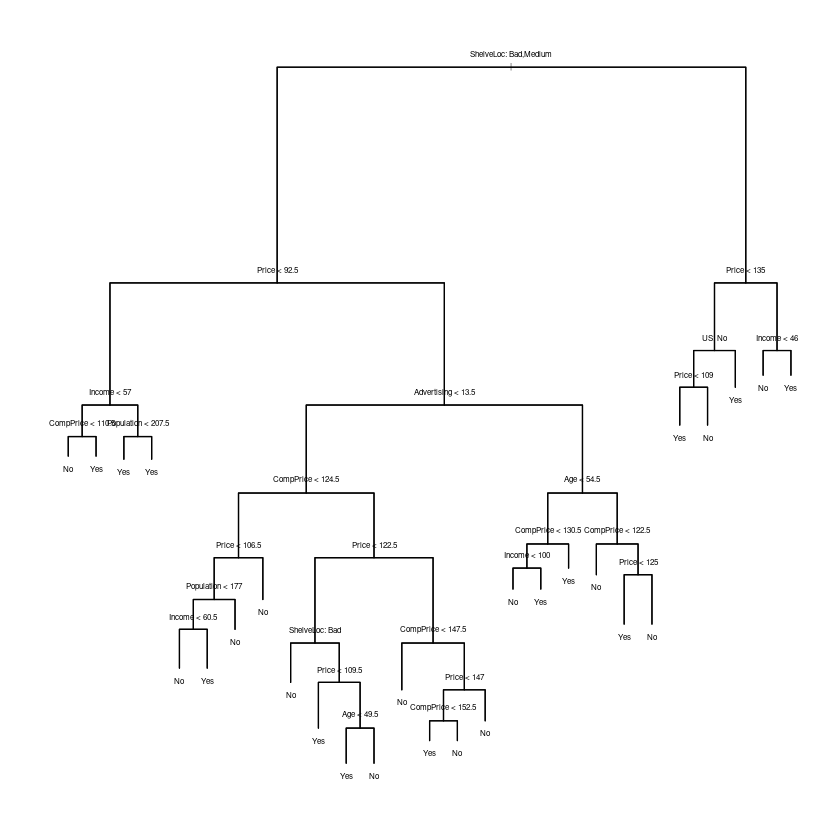

In [70]:
# Plot classification tree
par(cex = 0.4)
plot(tree.carseats)
text(tree.carseats, pretty = 0)

IV. We printed the tree below to interpret.

In [71]:
tree.carseats

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

  1) root 400 541.500 No ( 0.59000 0.41000 )  
    2) ShelveLoc: Bad,Medium 315 390.600 No ( 0.68889 0.31111 )  
      4) Price < 92.5 46  56.530 Yes ( 0.30435 0.69565 )  
        8) Income < 57 10  12.220 No ( 0.70000 0.30000 )  
         16) CompPrice < 110.5 5   0.000 No ( 1.00000 0.00000 ) *
         17) CompPrice > 110.5 5   6.730 Yes ( 0.40000 0.60000 ) *
        9) Income > 57 36  35.470 Yes ( 0.19444 0.80556 )  
         18) Population < 207.5 16  21.170 Yes ( 0.37500 0.62500 ) *
         19) Population > 207.5 20   7.941 Yes ( 0.05000 0.95000 ) *
      5) Price > 92.5 269 299.800 No ( 0.75465 0.24535 )  
       10) Advertising < 13.5 224 213.200 No ( 0.81696 0.18304 )  
         20) CompPrice < 124.5 96  44.890 No ( 0.93750 0.06250 )  
           40) Price < 106.5 38  33.150 No ( 0.84211 0.15789 )  
             80) Population < 177 12  16.300 No ( 0.58333 0.41667 )  
              160) Income < 60.5 6   0

The first split is based on **ShelveLoc**, which means that the shelf location is the most important factor when influencing sales. The second most important factor is **Price**, which appears at multiple critical branches.

The number of observations in a good shelf location with a price less than 135 is **68.**

First, you start the the root node, ShelveLoc. Depending on if the ShelveLoc is Good or Bad/Medium, you follow the right or left branch. From there, depending on which path you follow, you look at the next node and follow the respective branch. This continues until you reach the end, which will state whether sales will be high (Yes) or low (No).

V. We split our data into our test for this problem.

In [72]:
# Create new tree model
set.seed(2)
train <- sample(1:nrow(Carseats), 200)
Carseats.test <- Carseats[-train , ]
High.test <- High[-train]
tree.carseats <- tree(High ~ . - Sales, Carseats, subset = train)

5A. We first set the seed, so that we could split the data into the training and test dataset. We then trained the tree with the training data.

5B. We plotted the tree model is examine how it splits, as well as printing the summary.

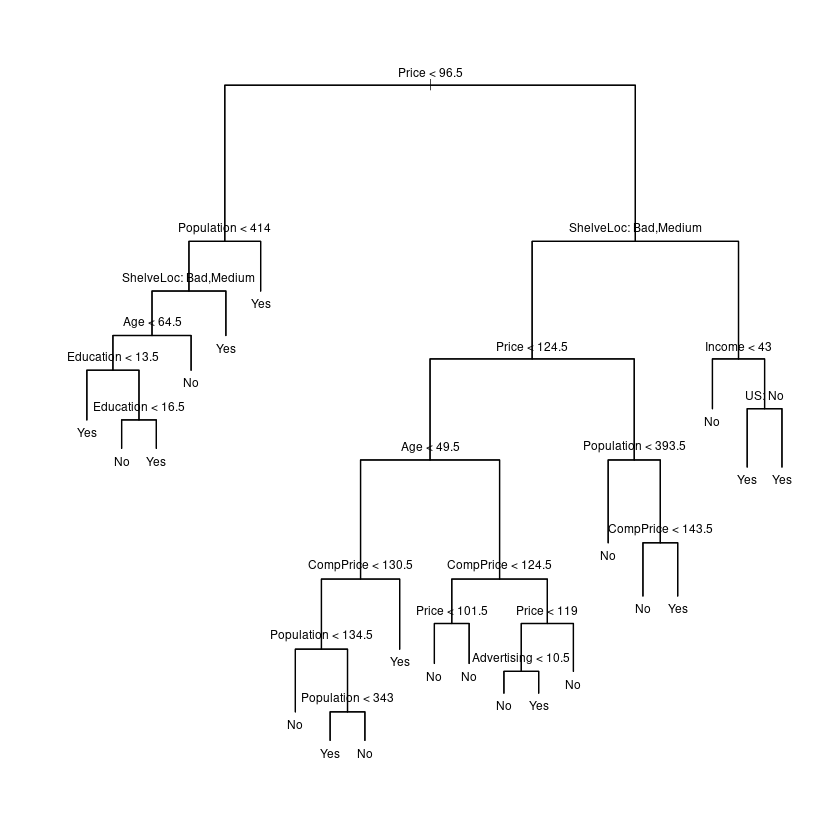

In [73]:
# Plot tree model
par(cex = 0.6)
plot(tree.carseats)
text(tree.carseats, pretty = 0)

In [74]:
# View summary
summary(tree.carseats)


Classification tree:
tree(formula = High ~ . - Sales, data = Carseats, subset = train)
Variables actually used in tree construction:
[1] "Price"       "Population"  "ShelveLoc"   "Age"         "Education"  
[6] "CompPrice"   "Advertising" "Income"      "US"         
Number of terminal nodes:  21 
Residual mean deviance:  0.5543 = 99.22 / 179 
Misclassification error rate: 0.115 = 23 / 200 

We then created the new tree based on the training model. Once again, we start at the training node, where we start by looking at the price. If the price is less than 96.5, it follows down the left path. If the price is greater than 96.5, it follows down the right path. To determine if the sales will be high or low, follow the path until you reach the end, where you will receive either a "Yes" (high sales) or "Low" (low sales).

VC. There are several differences between our first and second tree. The first tree begins the split with ShelfLoc, whereas the second tree begins with Price, leaving both with different most dominant variables in predicting sales. The first tree has a lower residual mean deviance and misclassification error rate than the second as well. This implies that the second tree may be overfitting or not generalizing well, and that too many complex splits. This also implies that the second tree is less accurate than the first.

VI. We ran the prediction with the test dataset.

In [75]:
# Run prediction data on test model
tree.pred <- predict(tree.carseats, Carseats.test,
type = "class")
table(tree.pred , High.test)
(104+50)/200

         High.test
tree.pred  No Yes
      No  104  33
      Yes  13  50

[1] 0.77

We ran the prediction with the test dataset using the predict() function. We calculated an error rate of 23%, as 77% of the predictions made by this model were correct.

VII. We pruned the tree below.

         High.test
tree.pred  No Yes
      No  102  31
      Yes  15  52

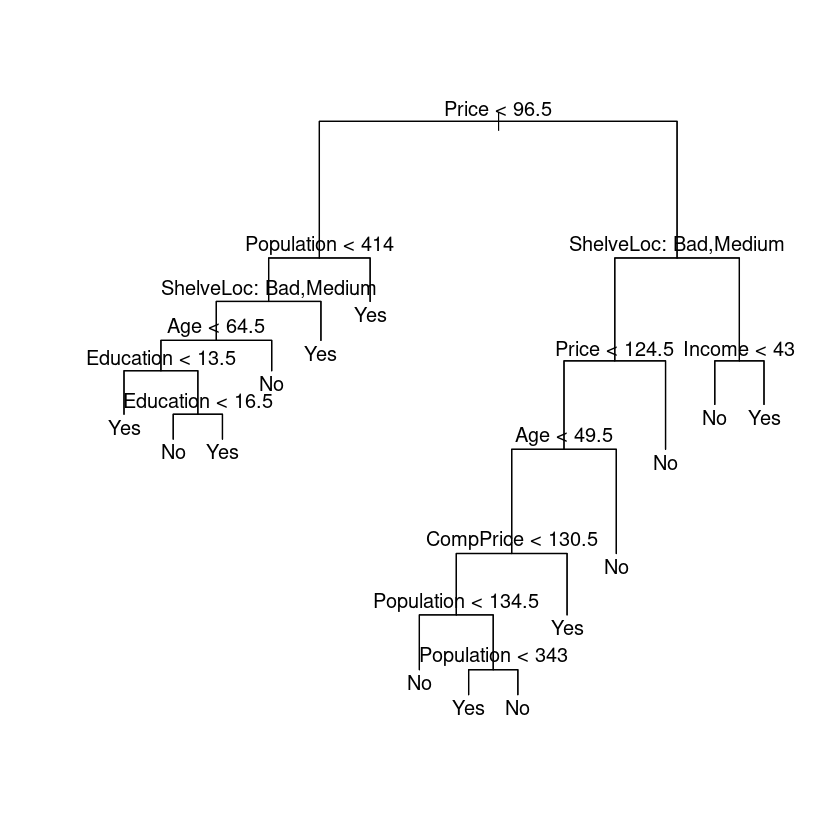

In [76]:
# Prune tree and plot
prune.carseats <- prune.misclass(tree.carseats, best = 14)
plot(prune.carseats)
text(prune.carseats, pretty = 0)
tree.pred <- predict(prune.carseats, Carseats.test, type = 'class')
table(tree.pred, High.test)

Using the prune.misclass() function, we were able to prune our tree down to the best 14 nodes to create a new, pruned classification tree.

## Problem 6 - Fit a classification tree

Fit a classification tree Use Boston dataset, follow Lab 8.3.2. With the dataset, we wish to predict the median house prices of greater Boston area on the basis of various statistics associated with the house price. We choose Tree methods. “medv” is the response variable.

In [77]:
install.packages('ISLR2')  
library(ISLR2)  
data("Boston") 
attach(Boston)



The following package(s) will be installed:
- ISLR2 [1.3-2]
These packages will be installed into "~/renv/library/linux-ubuntu-jammy/R-4.4/x86_64-pc-linux-gnu".

# Installing packages --------------------------------------------------------
- Installing ISLR2 ...                          OK [linked from cache]


**Question 6(I)**  

**(5 points) Create a categorical variable “Price” to replace “medv.”, and add the variable to the Boston dataset. medv >30 is considered as “high” for “Price”; medv <=15 is considered as “low” for “Price”; 15< medv <=30 is considered as “mid” for “Price”**

In [78]:

# Convert medv into a categorical variable "Price"
Boston$Price <- factor(ifelse(Boston$medv > 30, "High",
                       ifelse(Boston$medv <= 15, "Low", "Mid")))


**Question 6(II)**

**(10 points) Call library(tree) and use the tree() function. With the whole dataset as training data, fit a classification tree in order to predict “Price” using all variables but “medv.” What are the variables used as internal nodes in the tree? How many terminal nodes are there in the tree? What is the training error rate of the tree? What is the tree deviance? What is its entropy?**

In [79]:
install.packages('tree')
library(tree)

# Fit classification tree
tree.boston <- tree(Price ~ . -medv, data = Boston)

# Summary of the tree
summary(tree.boston)

# Variables used as internal nodes
print(tree.boston)

# Compute class probabilities
class_probs <- table(Boston$Price) / nrow(Boston)
class_probs

# Compute entropy
entropy <- -sum(class_probs * log2(class_probs))

# Print entropy value
print(entropy)



The following package(s) will be installed:
- tree [1.0-44]
These packages will be installed into "~/renv/library/linux-ubuntu-jammy/R-4.4/x86_64-pc-linux-gnu".

# Installing packages --------------------------------------------------------
- Installing tree ...                           OK [linked from cache]



Classification tree:
tree(formula = Price ~ . - medv, data = Boston)
Variables actually used in tree construction:
[1] "lstat" "rm"    "dis"   "crim"  "nox"   "age"  
Number of terminal nodes:  15 
Residual mean deviance:  0.4396 = 215.8 / 491 
Misclassification error rate: 0.09486 = 48 / 506 

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

 1) root 506 909.900 Mid ( 0.16601 0.19170 0.64229 )  
   2) lstat < 15.145 349 434.800 Mid ( 0.24069 0.01433 0.74499 )  
     4) rm < 6.7275 252 118.400 Mid ( 0.03571 0.01587 0.94841 )  
       8) dis < 1.4618 6  10.410 High ( 0.66667 0.16667 0.16667 ) *
       9) dis > 1.4618 246  81.140 Mid ( 0.02033 0.01220 0.96748 )  
        18) rm < 6.5505 216  44.340 Mid ( 0.00463 0.01389 0.98148 ) *
        19) rm > 6.5505 30  23.560 Mid ( 0.13333 0.00000 0.86667 ) *
     5) rm > 6.7275 97 112.000 High ( 0.77320 0.01031 0.21649 )  
      10) rm < 7.0835 41  56.810 High ( 0.51220 0.00000 0.48780 )  
        20) lstat < 5.3 22  20.860 High ( 0.81818 0.00000 0.18182 ) *
        21) lstat > 5.3 19  16.570 Mid ( 0.15789 0.00000 0.84211 ) *
      11) rm > 7.0835 56  20.030 High ( 0.96429 0.01786 0.01786 )  
        22) crim < 1.49119 51   0.000 High ( 1.00000 0.00000 0.00000 ) *
        23) crim > 1.49119 5   9.503 High ( 0.6000


     High       Low       Mid 
0.1660079 0.1916996 0.6422925 

[1] 1.297139


Q6(II). From the above analysis, the variables used as internal nodes are lstat, rm, dis, crim, nox and age. The number of terminal nodes is 15. The training error rate/misclassfication error rate is 9.486%. The residual mean deviance is 0.4396. The entropy is 1.297139.  

**Question 6(III)** 

**(5 points) Plot the above tree and include node labels.**

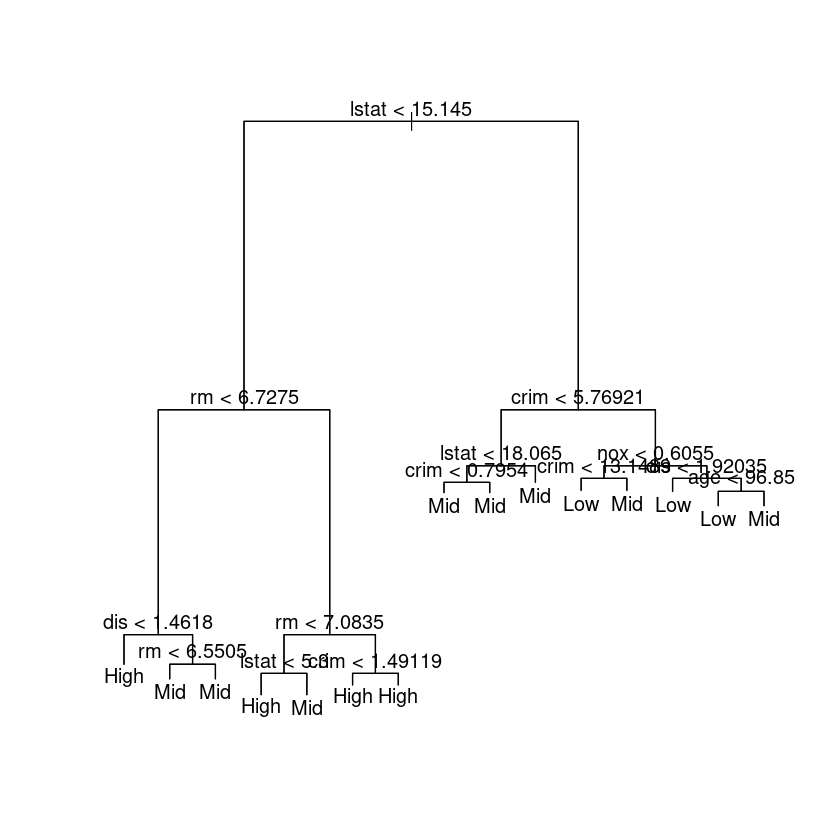

In [80]:
# Plot the classification tree
plot(tree.boston)
text(tree.boston, pretty = 0)


**Question 6(IV)**

**(10 points) Read the tree and explain how it split. (a) What is the most important factor that influences Price? What is the second most important factor, why? (b) Given an overall interpretation of the decision tree, e.g., how to follow the tree to determine if an area’s Price will be high, mid, or low.**

Q6(IV). lstat is the most important factor that influences price as it is the first variable used in the first split. The second most important variable is rm. To determine if an area or neigborhood falls in the high, low or Mid category, first consider 

**Question 6(V)**  

**Split the data into training dataset and test dataset with set.seed(5). (a) Train the tree with the training data. (b) Read the tree and explain how it split, e.g., how to follow the tree to determine if an area’s median house price will be high, mid, or low. (c) Is there any difference between this tree and the tree we build from the whole dataset? Compare their performances in terms of training error rate and deviance.**


Classification tree:
tree(formula = Price ~ . - medv, data = Boston.train)
Variables actually used in tree construction:
[1] "lstat" "rm"    "age"   "crim" 
Number of terminal nodes:  15 
Residual mean deviance:  0.3626 = 86.29 / 238 
Misclassification error rate: 0.07905 = 20 / 253 

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

  1) root 253 450.200 Mid ( 0.154150 0.197628 0.648221 )  
    2) lstat < 15.145 174 197.000 Mid ( 0.224138 0.005747 0.770115 )  
      4) rm < 7.0835 146  94.740 Mid ( 0.082192 0.006849 0.910959 )  
        8) lstat < 5.195 14  19.410 Mid ( 0.500000 0.000000 0.500000 )  
         16) rm < 6.687 9   9.535 Mid ( 0.222222 0.000000 0.777778 ) *
         17) rm > 6.687 5   0.000 High ( 1.000000 0.000000 0.000000 ) *
        9) lstat > 5.195 132  54.220 Mid ( 0.037879 0.007576 0.954545 )  
         18) lstat < 9.575 61  44.630 Mid ( 0.081967 0.016393 0.901639 )  
           36) age < 79.85 49   9.763 Mid ( 0.020408 0.000000 0.979592 )  
             72) rm < 6.766 44   0.000 Mid ( 0.000000 0.000000 1.000000 ) *
             73) rm > 6.766 5   5.004 Mid ( 0.200000 0.000000 0.800000 ) *
           37) age > 79.85 12  21.300 Mid ( 0.333333 0.083333 0.583333 ) *
         19) lstat > 9.575 71   0.000 Mid ( 0.000000 0.000000 

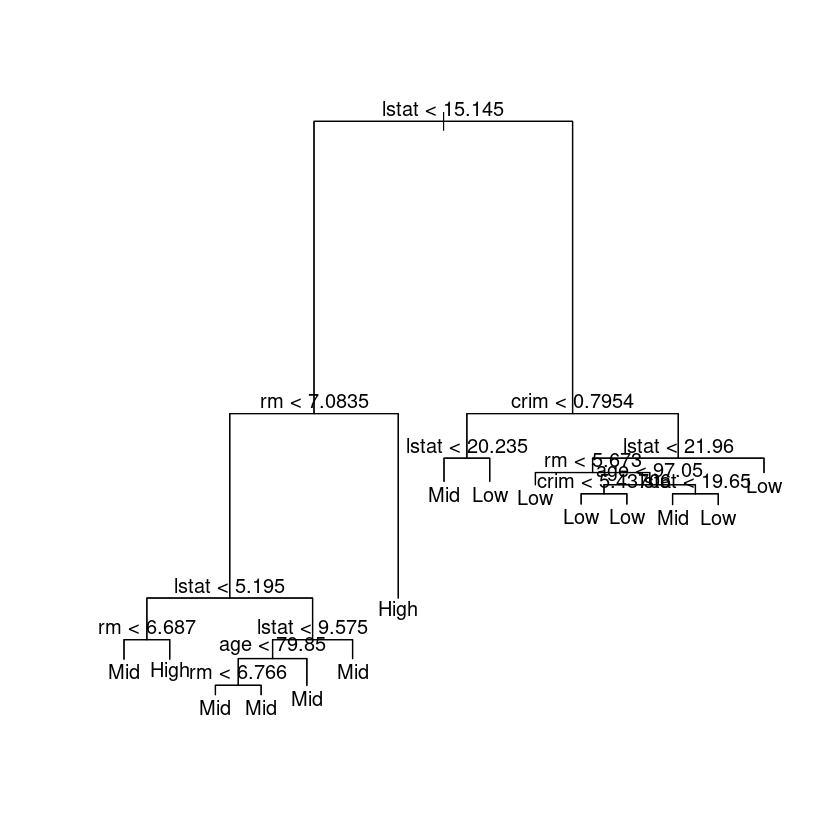

In [81]:
# Set seed and split data
set.seed(5)
train <- sample(1:nrow(Boston), nrow(Boston) / 2)
Boston.train <- Boston[train, ]
Boston.test <- Boston[-train, ]

# Train the tree on the training data (medv is the target variable, not Price)
library(tree)
tree.boston.train <- tree(Price ~ . -medv, data = Boston.train)

# Summary of trained tree
summary(tree.boston.train)

# Plot the regression tree
plot(tree.boston.train)
text(tree.boston.train, pretty = 0)

# Compare tree from whole dataset vs. training data
print(tree.boston.train)




Q6(V) Drawing on the outputs above, suppose a house in located in an area with an lstat of 20.2 and rm of 9, per the model, the price of the house will be in the "High Category" that is priced above $30,000. The first model (using the entire dataset) uses more internal variables (6 variables in total), while the second model(using just the train data) uses less variables(4 in total). The residual mean deviance is lower for model 2(with train data) compared with model 1(entire dataset used). Additonally, the misclassification rate is lower for the second model. Hence the classification model which employs the train data set performs better. 

**Question 6 (VI)**

**(10 points) Run the prediction with the test dataset with predict() function. Compare the test result with the observations with table() function and calculate the error rate of the test data**

In [82]:
# Predict on test data
tree.pred <- predict(tree.boston.train, Boston.test, type = "class")

# Compare with actual test observations
confusion_matrix <- table(tree.pred, Boston.test$Price)
print(confusion_matrix)

# Calculate test error rate
test_error_rate <- 1 - sum(diag(confusion_matrix)) / sum(confusion_matrix)
print(paste("Test Error Rate:", test_error_rate))


         
tree.pred High Low Mid
     High   40   1   4
     Low     0  37  13
     Mid     5   9 144
[1] "Test Error Rate: 0.126482213438735"


**Question 6(VII)**

**Now consider pruning the tree**

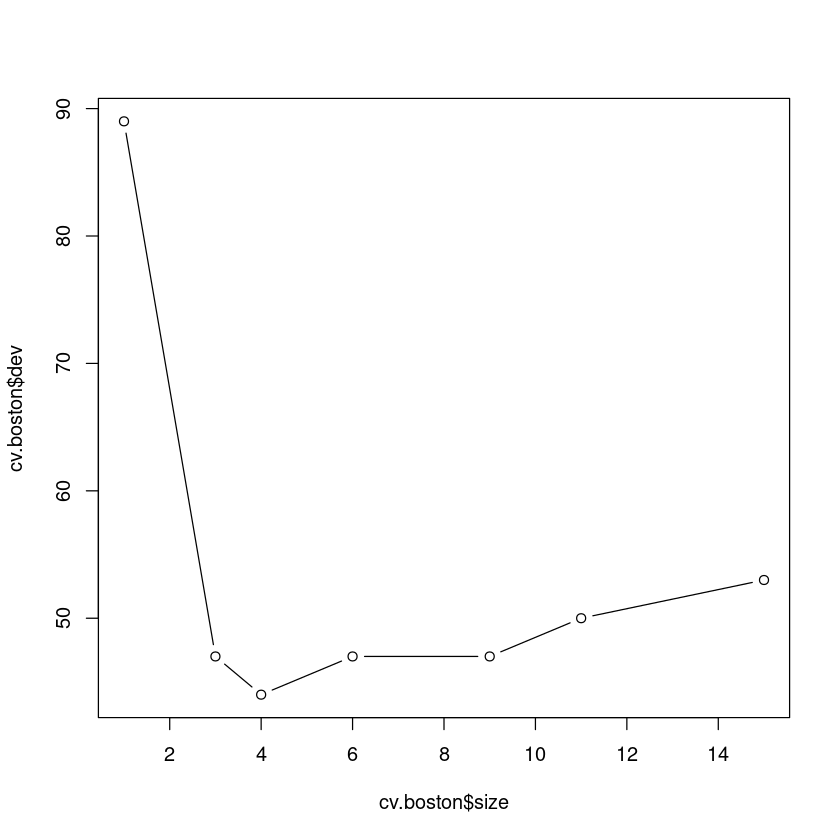

[1] "Test Error Rate (Full Tree): 0.126482213438735"
[1] "Test Error Rate (Pruned Tree): 0.118577075098814"


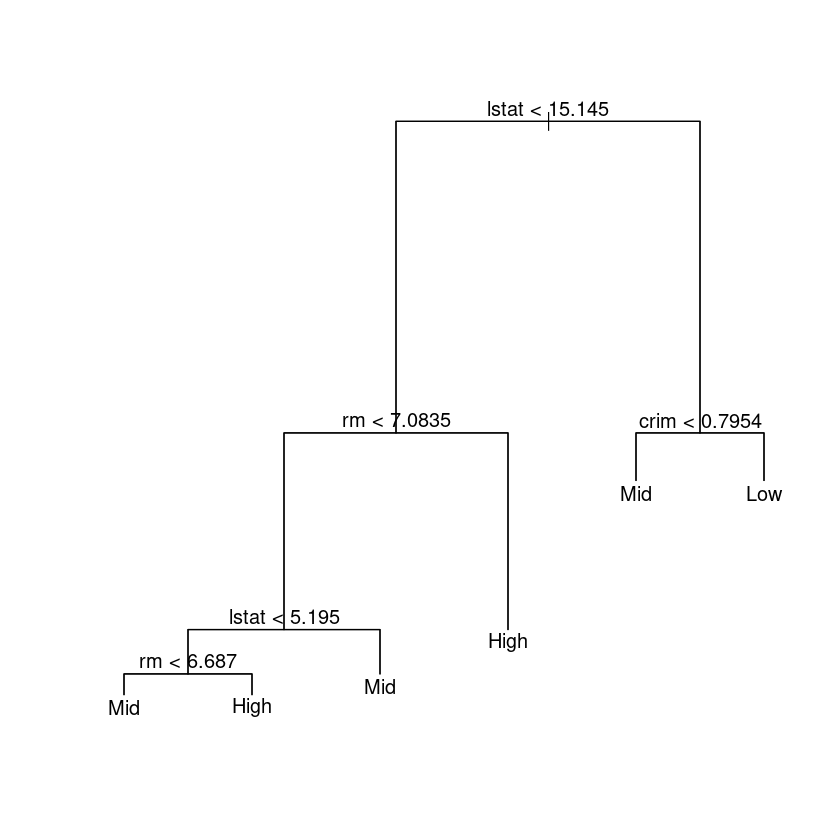

In [83]:
# Perform cross-validation to determine optimal pruning
set.seed(7)
cv.boston <- cv.tree(tree.boston.train, FUN = prune.misclass)

# Plot deviance vs. tree size to determine the best pruning level
plot(cv.boston$size, cv.boston$dev, type = "b")

# Prune the tree to optimal size
prune.boston <- prune.misclass(tree.boston.train, best = 5)

# Plot pruned tree
plot(prune.boston)
text(prune.boston, pretty = 0)

# Predict on test data with pruned tree
tree.pred.pruned <- predict(prune.boston, Boston.test, type = "class")

# Compute test error rate for pruned tree
confusion_matrix_pruned <- table(tree.pred.pruned, Boston.test$Price)
test_error_rate_pruned <- 1 - sum(diag(confusion_matrix_pruned)) / sum(confusion_matrix_pruned)

# Compare error rates
print(paste("Test Error Rate (Full Tree):", test_error_rate))
print(paste("Test Error Rate (Pruned Tree):", test_error_rate_pruned))


## Problem 7 - Fit a regression tree

Use Boston dataset, follow Lab 8.3.2. With the dataset, we wish to predict the median house prices of greater Boston area on the basis of various statistics associated with the house price. We choose Tree methods. “medv” is the response variable. 

**Question 7(I)** 

**(10 points) Call library(tree) and use the tree() function. With the whole dataset as training data, fit a regression tree in order to predict “medv” using all variables. What are the variables used as internal nodes in the tree? How many terminal nodes are there in the tree? What is the tree deviance? Print out the tree.**

In [84]:
# Load Data
install.packages('ISLR2')  
library(ISLR2)  
data("Boston") 
attach(Boston)
install.packages('tree')
library(tree)

# Question 7(i) Create Tree
set.seed(1)
tree.boston <- tree(medv ~ ., data = Boston)

# View Summary
summary(tree.boston)

The following package(s) will be installed:
- ISLR2 [1.3-2]
These packages will be installed into "~/renv/library/linux-ubuntu-jammy/R-4.4/x86_64-pc-linux-gnu".

# Installing packages --------------------------------------------------------
- Installing ISLR2 ...                          OK [linked from cache]


The following objects are masked from Boston (pos = 3):

    age, chas, crim, dis, indus, lstat, medv, nox, ptratio, rad, rm,
    tax, zn




The following package(s) will be installed:
- tree [1.0-44]
These packages will be installed into "~/renv/library/linux-ubuntu-jammy/R-4.4/x86_64-pc-linux-gnu".

# Installing packages --------------------------------------------------------
- Installing tree ...                           OK [linked from cache]



Regression tree:
tree(formula = medv ~ ., data = Boston)
Variables actually used in tree construction:
[1] "rm"      "lstat"   "dis"     "crim"    "ptratio"
Number of terminal nodes:  9 
Residual mean deviance:  13.55 = 6734 / 497 
Distribution of residuals:
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-17.68000  -2.23000   0.07026   0.00000   2.22100  16.50000 

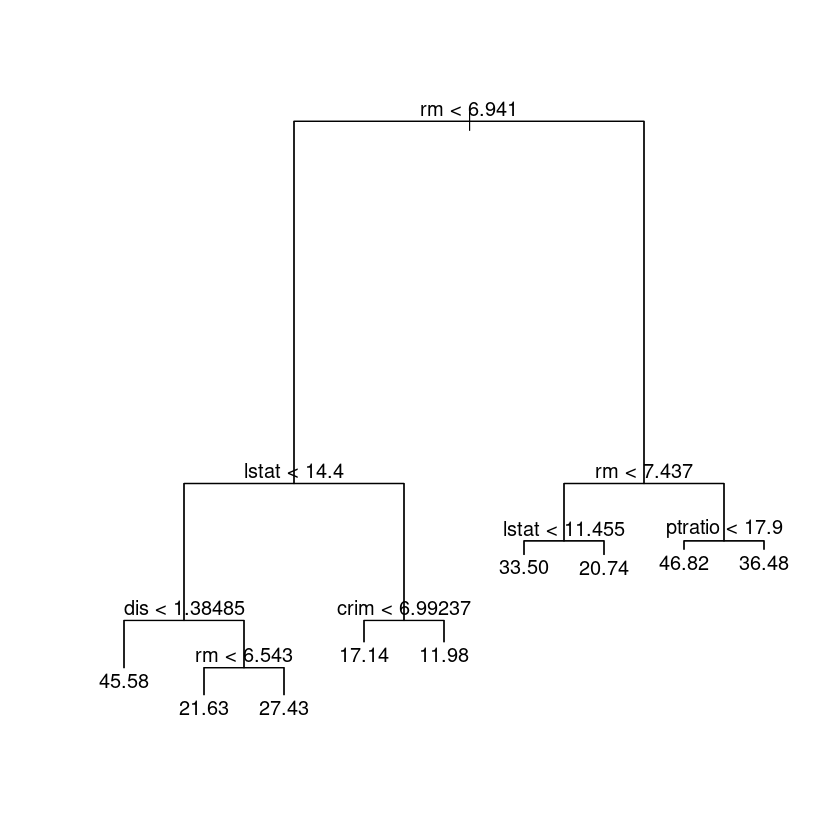

In [85]:
plot(tree.boston)
text(tree.boston, pretty = 0)

Q7(I). From the above analysis, the variables used as intenral nodes are rm, lstat, dis, crim and ptratio. The the number of terminal nodes is 9 and the residual mean deviance is 13.55

**Question 7(II)** 

**(10 points) separate the data into training subset and test subset with setseed(1). fit a regression tree in order to predict “medv” using all variables with the training data. What are the variables used as internal nodes in the tree? How many terminal nodes are there in the tree? What is the tree deviance? Print out the tree. Are there any difference between this tree and the tree from the whole dataset?**


Regression tree:
tree(formula = medv ~ ., data = Boston, subset = train)
Variables actually used in tree construction:
[1] "rm"    "lstat" "crim"  "age"  
Number of terminal nodes:  7 
Residual mean deviance:  10.38 = 2555 / 246 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-10.1800  -1.7770  -0.1775   0.0000   1.9230  16.5800 

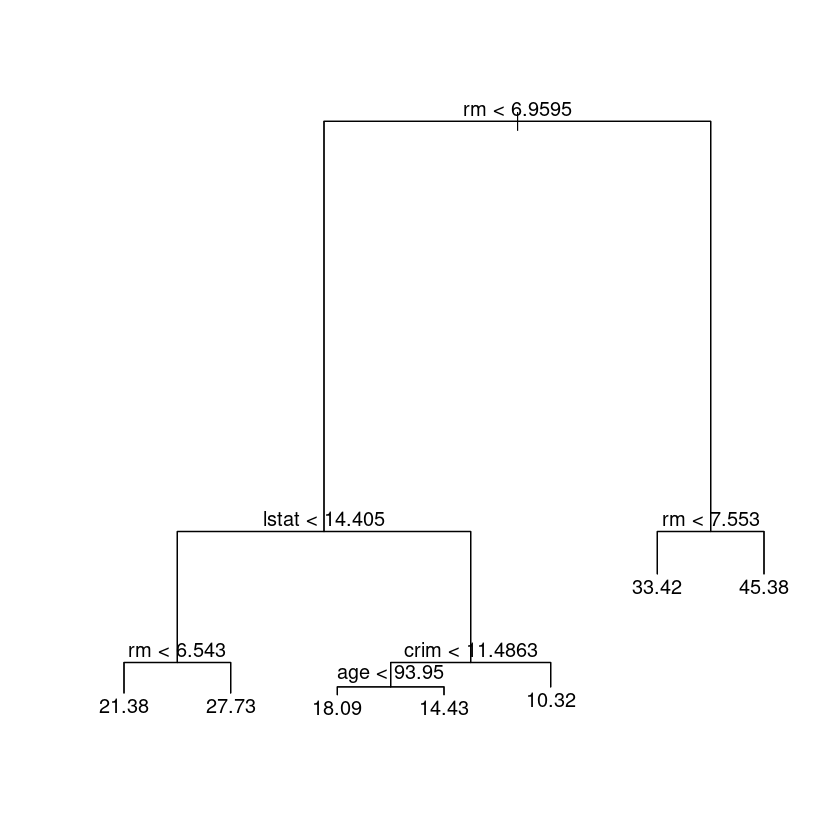

In [86]:
# II. Split the data into training and test subsets
set.seed(1)
train <- sample(1:nrow(Boston), nrow(Boston) / 2)
boston.train <- Boston[train, ]
boston.test <- Boston[-train, ]

# Fit a regression tree using the training data
tree.train <- tree(medv ~ ., data = Boston, subset = train)
summary(tree.train)

# Print the tree
plot(tree.train)
text(tree.train, pretty = 0)



Q7(II). From the above analysis, the variables used as internal nodes are rm, lstat,crim and age. The the number of terminal nodes is 7 and the tree deviance is 10.38.

Compared to the previous analysis, the number of internal nodes droped to five from to four when the data was split into train and test. Additionally, the number of terminal nodes declined to 7 and the tree deviance was lower when the dataset was split. 

**Question 7(III)**  

(10 points) Now consider pruning the tree.  use the cv.tree() function to see whether pruning the tree will improve performance. Plot the deviance as a function of tree size. Does pruning improve performance?

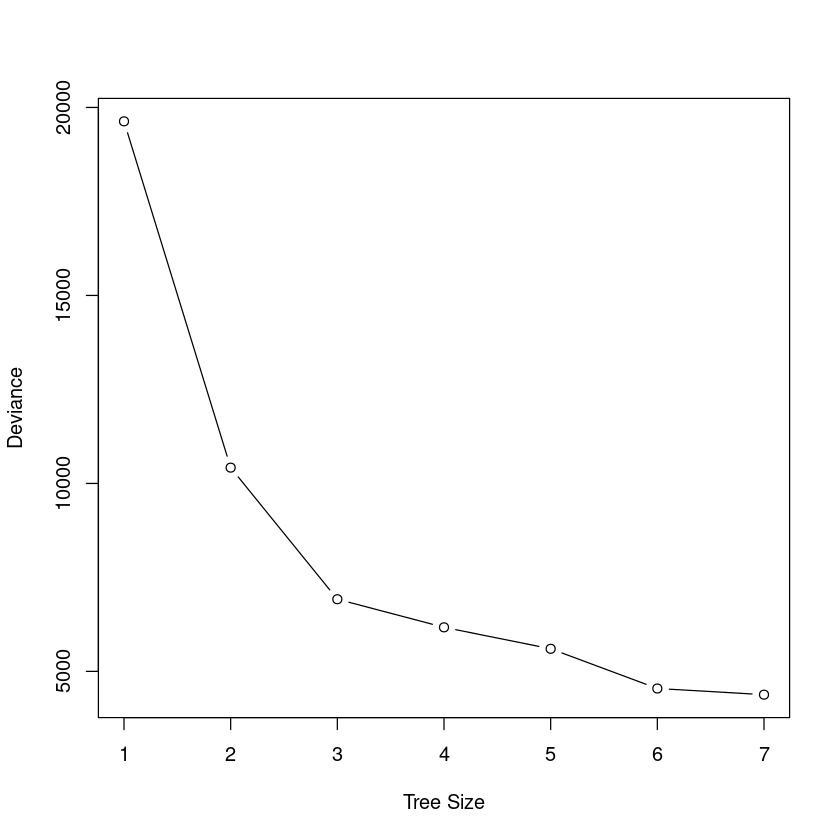

In [87]:
# III. Use cross-validation to determine whether pruning improves performance using the train data
cv.boston <- cv.tree(tree.train)
plot(cv.boston$size, cv.boston$dev, type = "b", xlab = "Tree Size", ylab = "Deviance")


Q7(III). Using the boston train set, the results of the cross validation indicate that a tree with terminal nodes of seven has the lowest deviance as shown in the plot above. Hence the result is not different from when the model was initially run with the train data set, hence no improvement. 

**Question 7(IV)**  
**(5 point) Prune the tree with tree size=5, plot the tree.**

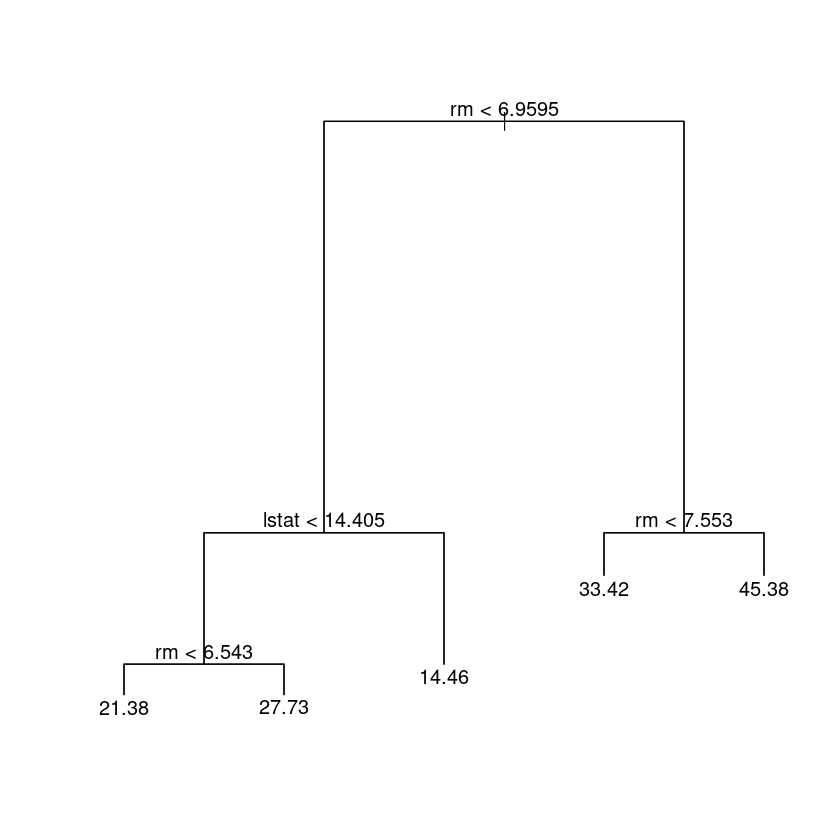

In [88]:
# IV. Prune the tree with size = 5 and plot it
prune.boston <- prune.tree(tree.train, best = 5)
plot(prune.boston)
text(prune.boston, pretty = 0)

**Question 7(V)**  
**(10 points) Predict for the test data with the full tree and the pruned tree respectively. Calculated the test error for the full tree and the pruned tree. Which one performance better?**

In [89]:
# V. Predict for the test data with both full and pruned trees
yhat.full <- predict(tree.train, newdata = boston.test)
yhat.prune <- predict(prune.boston, newdata = boston.test)

# Compute test MSE for both models
mse.full <- mean((yhat.full - boston.test$medv)^2)
mse.prune <- mean((yhat.prune - boston.test$medv)^2)

# Print test errors
print(paste("Test MSE (Full Tree):", mse.full))
print(paste("Test MSE (Pruned Tree):", mse.prune))

[1] "Test MSE (Full Tree): 35.2868818594623"
[1] "Test MSE (Pruned Tree): 35.901022761028"


Q7(V). From the above analysis using the test data, both trees full and pruned have nearly the same MSE. However, that of the full tree is lower compared to the pruned tree, indicating that the full tree performs better.  

## Problem 8 - Fit a regression tree

Use Carseats dataset. With the dataset, we wish to predict the sales of car seats on the basis of various statistics associated with the sale data in the previous year. We choose Tree methods. 

I. The necessary packages were installed in previous problems.

In [90]:
# Load necessary package
data('Carseats')

# Fit tree model
tree.carseats <- tree(Sales~., data = Carseats)
summary(tree.carseats)


Regression tree:
tree(formula = Sales ~ ., data = Carseats)
Variables actually used in tree construction:
[1] "ShelveLoc"   "Price"       "Age"         "Income"      "Population" 
[6] "Advertising"
Number of terminal nodes:  17 
Residual mean deviance:  2.878 = 1102 / 383 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-4.98700 -1.23000 -0.06125  0.00000  1.22500  4.75400 

First, we fit a regression tree to predict "Sales" across all variables. This was done with the complete Carseats dataset. The internal nodes in this tree are **ShelveLoc, Price, Age, Income, Population, and Advertising**. The number of terminal nodes is **17**, and the tree deviance is **2.878**.

In [91]:
# Print carseats tree
print(tree.carseats)

node), split, n, deviance, yval
      * denotes terminal node

 1) root 400 3182.0000  7.496  
   2) ShelveLoc: Bad,Medium 315 1860.0000  6.763  
     4) Price < 105.5 108  568.6000  8.189  
       8) Age < 54.5 43  158.7000  9.413  
        16) Income < 57.5 13   19.2400  7.988 *
        17) Income > 57.5 30  101.6000 10.030  
          34) ShelveLoc: Bad 9   22.7600  8.397 *
          35) ShelveLoc: Medium 21   44.5300 10.730 *
       9) Age > 54.5 65  303.1000  7.380  
        18) Income < 105.5 56  203.0000  6.946  
          36) ShelveLoc: Bad 20   76.9600  5.786  
            72) Income < 95 15   43.8100  5.047 *
            73) Income > 95 5    0.3687  8.004 *
          37) ShelveLoc: Medium 36   84.2400  7.590 *
        19) Income > 105.5 9   23.8200 10.080 *
     5) Price > 105.5 207  956.6000  6.019  
      10) ShelveLoc: Bad 61  240.8000  4.722  
        20) Population < 196.5 25   88.2300  3.767 *
        21) Population > 196.5 36  113.9000  5.386 *
      11) ShelveLoc: Med

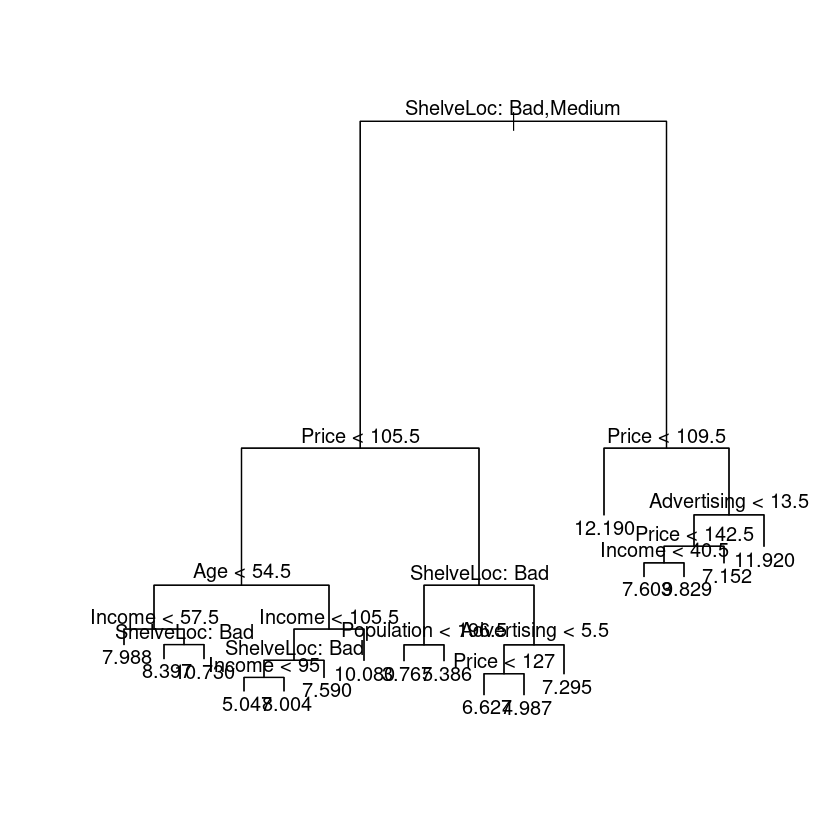

In [92]:
plot(tree.carseats)
text(tree.carseats, pretty = 0)

We printed the tree above to look at the individual nodes.

II.

In [93]:
# Set seed for reproducibility
set.seed(1)

# Split data into training and tests
train.index <- sample(1:nrow(Carseats), 200)
carseats.train <- Carseats[train.index,]
carseats.test <- Carseats[-train.index,]

We set the seed to 1 for reproducibility and then split our data into a training and test subset.

In [94]:
# Fit regression tree
tree.carseats <- tree(Sales ~., data = carseats.train)

# View summary
summary(tree.carseats)


Regression tree:
tree(formula = Sales ~ ., data = carseats.train)
Variables actually used in tree construction:
[1] "ShelveLoc"   "Price"       "Age"         "Advertising" "CompPrice"  
[6] "US"         
Number of terminal nodes:  18 
Residual mean deviance:  2.167 = 394.3 / 182 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-3.88200 -0.88200 -0.08712  0.00000  0.89590  4.09900 

Then, we fitted another regression tree using the training data we prepared. The variables used as internal nodes include **ShelveLoc, Price, Age, Advertising, CompPrice and US.** There are **18 terminal nodes**, and the **residual mean deviance is 2.167.**

In [95]:
# Print train carseats tree
print(tree.carseats)

node), split, n, deviance, yval
      * denotes terminal node

  1) root 200 1573.000  7.578  
    2) ShelveLoc: Bad,Medium 158  964.600  6.908  
      4) Price < 94.5 24  110.900  9.285  
        8) Age < 39.5 6    9.117 11.640 *
        9) Age > 39.5 18   57.310  8.499  
         18) Price < 71 6    7.686 10.260 *
         19) Price > 71 12   21.610  7.617 *
      5) Price > 94.5 134  694.000  6.483  
       10) Advertising < 4 59  229.900  5.511  
         20) Price < 130 37  135.300  6.136  
           40) CompPrice < 123.5 16   45.860  4.905  
             80) ShelveLoc: Bad 7    8.892  3.487 *
             81) ShelveLoc: Medium 9   11.950  6.008 *
           41) CompPrice > 123.5 21   46.760  7.074 *
         21) Price > 130 22   55.810  4.459  
           42) CompPrice < 137.5 15   28.510  3.859 *
           43) CompPrice > 137.5 7   10.300  5.746 *
       11) Advertising > 4 75  364.400  7.247  
         22) Age < 58.5 43  138.700  8.117  
           44) Price < 127 25   55.660

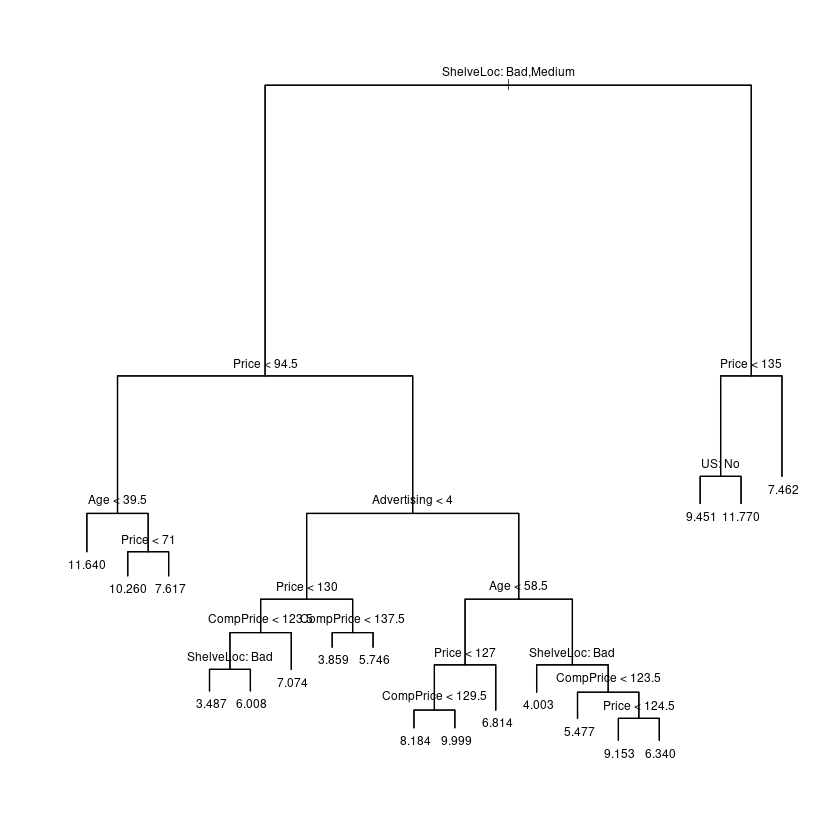

In [96]:
par(cex = 0.6)
plot(tree.carseats)
text(tree.carseats, pretty = 0)

Above, we printed and plotted the second tree to compare to the first tree.

The first tree uses the variables ShelveLoc, Price, Income, Population, and Advertising. Meanwhile, the second tree uses ShelveLoc, Price, Age, Advertising, CompPrice, and US. The first tree also has 17 terminal nodes, whereas the second tree has 18. Lastly, the first tree has a higher residual mean deviance of 2.878, whereas the second tree has 2.167. Based on these, it seems like the training subset and second tree seem to fit the data better than the first tree.

III.

There are similarities and differences between the regression tree in problem 8(II) and the classification tree problem 5(V). 

Both trees use Price as the primary split, and utilize ShelveLoc and CompPrice as factors. The 8(II) tree is more concise, with fewer levels and splits than the first second tree. The second tree incorporates Population, Income, Education, and Advertising unlike the first one. Both also have different decision thresholds for price, with the first tree at 94.5 and the second tree at 96.5.

The preference for which tree to use depends on what you are trying to predict, as well as the business goal. If you're looking to see if the variable Sales is above or below a certain amount, then you would utilize a classificaiton tree. However, if you want to see potential numeric outputs, you would use a regression tree. 

IV.

$size
 [1] 18 17 16 15 14 13 12 11 10  8  7  6  5  4  3  2  1

$dev
 [1]  984.3936 1031.3372 1036.0021 1027.2166 1027.2166 1055.8168 1044.6955
 [8] 1061.0899 1061.0899 1225.5973 1221.3487 1219.0219 1231.6886 1337.3952
[15] 1300.0524 1338.3702 1605.0221

$k
 [1]      -Inf  16.99544  20.56322  25.01730  25.57104  28.01938  30.36962
 [8]  31.56747  31.80816  40.75445  44.44673  52.57126  76.21881  99.59459
[15] 116.69889 159.79501 337.60153

$method
[1] "deviance"

attr(,"class")
[1] "prune"         "tree.sequence"

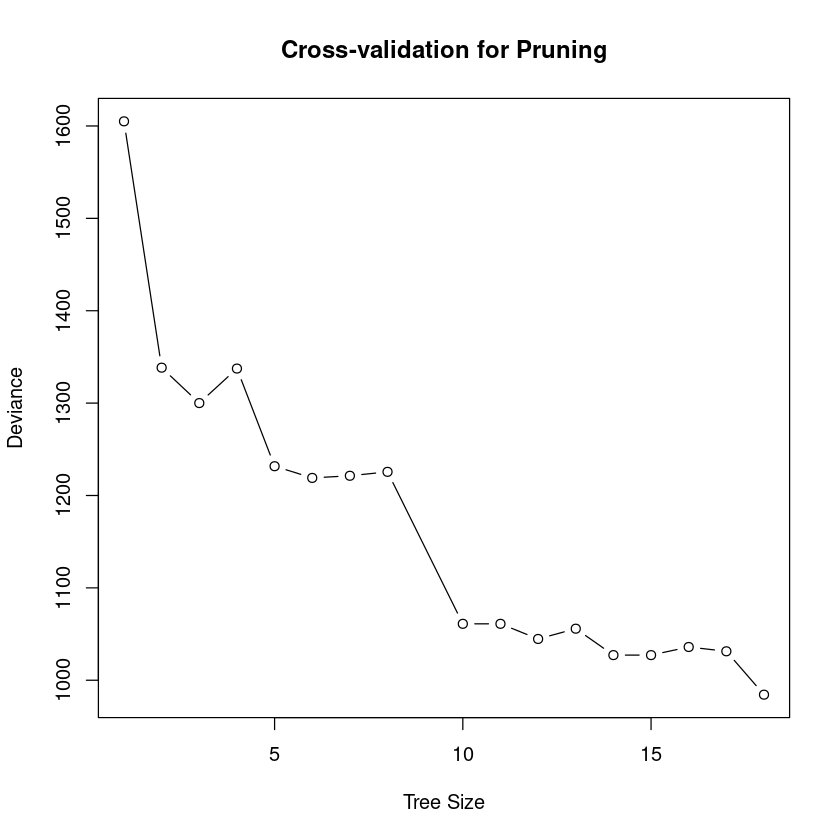

In [97]:
# Set seed for reproducibility
set.seed(1)

# Determine if pruning will improve performance
cv.carseats <- cv.tree(tree.carseats)
plot(cv.carseats$size, cv.carseats$dev, type = 'b', xlab = 'Tree Size', ylab = 'Deviance', main = 'Cross-validation for Pruning')

# Identify opt tree size
cv.carseats

According to this graph, there is a significant drop in variance at a tree size of ten, with very little improvements after that. As a result, we decided to look at pruning our tree to 10 nodes.

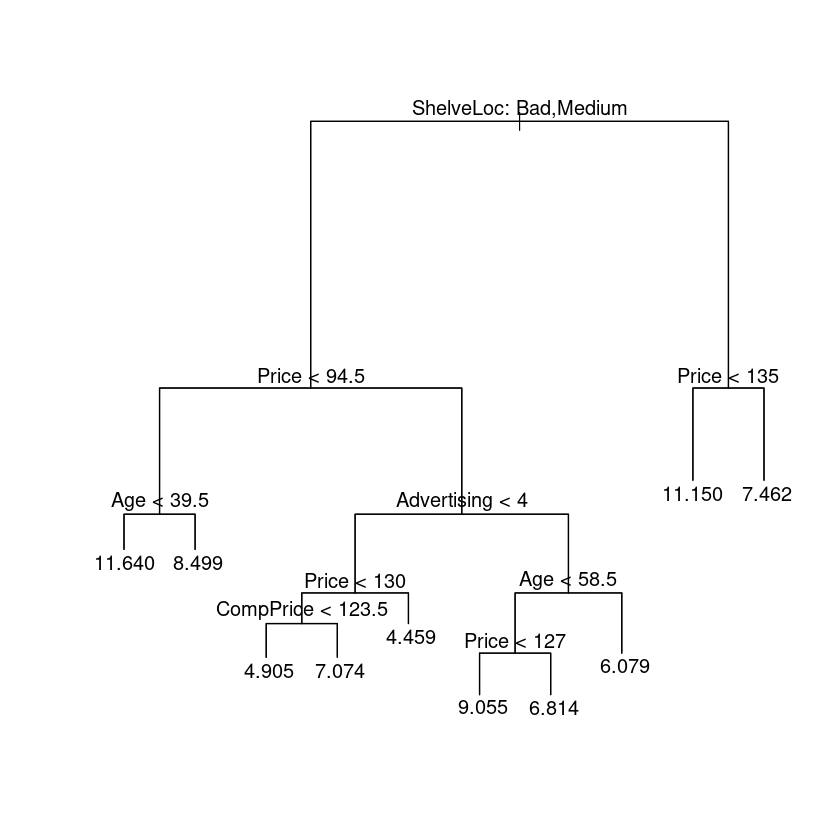

In [98]:
# Prune tree
pruned.tree <- prune.tree(tree.carseats, best = 10)
plot(pruned.tree)
text(pruned.tree, pretty = 0)

In [99]:
# Predict on test set using the unpruned tree
yhat_unpruned <- predict(tree.carseats, newdata = carseats.test)

# Compute test MSE for the unpruned tree
mse_unpruned <- mean((yhat_unpruned - carseats.test$Sales)^2)

print(paste("Test MSE (Unpruned Tree):", round(mse_unpruned, 4)))

# Prune the tree (e.g., best = 10 based on CV plot)
pruned.tree <- prune.tree(tree.carseats, best = 10)

# Predict on test set using the pruned tree
yhat_pruned <- predict(pruned.tree, newdata = carseats.test)

# Compute test MSE for the pruned tree
mse_pruned <- mean((yhat_pruned - carseats.test$Sales)^2)

print(paste("Test MSE (Pruned Tree):", round(mse_pruned, 4)))


[1] "Test MSE (Unpruned Tree): 4.922"
[1] "Test MSE (Pruned Tree): 4.9181"


After plotting the new tree and comparing the MSEs for both the unpruned and prune teen, there is a slight improvement in the pruned tree, as the MSE is lower. This means that pruning the tree will slightly improve the tree.

## Problem 9 - Various tree methods for regression tree

Use Boston dataset, follow Lab 8.3.3-8.3.5. With the dataset, we wish to predict the
median house prices of greater Boston area on the basis of various statistics associated
with the house price. “medv” is the response variable. We practice various tree
methods.

I. (40 points) Bagging & Random Forest: Use set.seed(1), randomly separate
the dataset into half training dataset and half validation/test dataset. Call
library(randomForest) and use the randomForest() function to build the trees
(a) By default, randomForest() build 500 trees with Bagging method. Note you
need to set mtry= the total number of the variables (12 for the Boston
dataset). Use the predict() function to forecast with the test data from the
trees you just built. What is the test MSE of the bagging method?
(b) Set ntree=25 to build 25 trees by Bagging method, Use the predict()
function to forecast with the test data from the trees you just built. What is
the test MSE of this Bagging method? Comparing to (a), is the
performance better or worse? Why?
(c) Set mtry=6, which is smaller than the total number of the variables.
Bagging becomes Random Forest. By default, randomForest() build 500
trees. Use the predict() function to forecast with the test data from the
trees you just built. What is the test MSE of the Random Forest method?
Comparing the results in (a) and (b), is it better or worse, why?
(d) Use the importance() function to view and the varImpPlot() function plot
the importance of each variable from the trees that you built in (c). What
are your observations? Interpret the results.

II. (30 points) Boosting: (30 points) Boosting: Use set.seed(1), randomly
separate the dataset into half training dataset and half validation/test dataset.
Call library(gbm) and use the gbm() function to build the trees.
(a) Set the tree size limit to 4, build 5000 trees for boosting. By default, shrinkage
=0.001. Use summary() function to produce a relative influence statistics. Use
plot() to produce partial dependence plot. interpret your plots.
(b) use the boosted model to predict “medv” on the test set, and check the test
error MSE
(c) Set shrinkage = 0.2, redo (a) and (b). How does shrinkage influence the
model performance?

III. (30 points) Boosting: (30 points) Boosting: Use set.seed(1), randomly
separate the dataset into half training dataset and half validation/test dataset.
Call library(gbm) and use the gbm() function to build the trees.
(a) Set the tree size limit to 4, build 5000 trees for boosting. By default, shrinkage
=0.001. Use summary() function to produce a relative influence statistics. Use
plot() to produce partial dependence plot. interpret your plots.
(b) use the boosted model to predict “medv” on the test set, and check the test
error MSE
(c) Set shrinkage = 0.2, redo (a) and (b). How does shrinkage influence the
model performance?

Part One: We installed the randomForest package to perform our calculations.

In [100]:
# Install necessary packages
install.packages('randomForest')
library(randomForest)

# Downloading packages -------------------------------------------------------
- Downloading randomForest from CRAN ...        OK [213.6 Kb in 0.19s]
Successfully downloaded 1 package in 0.28 seconds.

The following package(s) will be installed:
- randomForest [4.7-1.2]
These packages will be installed into "~/renv/library/linux-ubuntu-jammy/R-4.4/x86_64-pc-linux-gnu".

# Installing packages --------------------------------------------------------
- Installing randomForest ...                   OK [installed binary and cached in 0.6s]


randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin


The following object is masked from ‘package:dplyr’:

    combine




In [101]:
# Set seed for reproducibility
set.seed(1)
data(Boston)
na.omit(Boston)

# Perform random forest
bag.boston <- randomForest(medv ~ ., data = Boston, mtry = 12, importance = TRUE, subset = train)
bag.boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,12.43,22.9
8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,19.15,27.1
9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,29.93,16.5



Call:
 randomForest(formula = medv ~ ., data = Boston, mtry = 12, importance = TRUE,      subset = train) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 12

          Mean of squared residuals: 11.40162
                    % Var explained: 85.17

(a)	By default, randomForest() build 500 trees with Bagging method. Note you need to set mtry= the total number of the variables (12 for the Boston dataset). Use the predict() function to forecast with the test data from the trees you just built. What is the test MSE of the bagging method?

In [102]:
# Split the data into training and testing sets
set.seed(1)
train <- sample(1:nrow(Boston), nrow(Boston)/2)
test <- Boston[-train, ]

# Perform random forest on the training set
bag.boston <- randomForest(medv ~ ., data = Boston, mtry = 12, importance = TRUE, subset = train)

# Predict on the test set
boston.pred <- predict(bag.boston, newdata = test)

# Calculate the test MSE
test.mse <- mean((boston.pred - test$medv)^2)
test.mse

[1] 23.40359

Test MSE is 23.04.

(b)	Set ntree=25 to build 25 trees by Bagging method, Use the predict() function to forecast with the test data from the trees you just built. What is the test MSE of this Bagging method? Comparing to (a), is the performance better or worse? Why?

In [103]:
# Perform random forest with 25 trees on the training set
bag.boston.25 <- randomForest(medv ~ ., data = Boston, mtry = 12, ntree = 25, importance = TRUE, subset = train)

# Predict on the test set
boston.pred.25 <- predict(bag.boston.25, newdata = test)

# Calculate the test MSE
test.mse.25 <- mean((boston.pred.25 - test$medv)^2)
test.mse.25

[1] 23.93756

Test MSE at 25 trees performed worse, with a difference of .29.

(c)	Set mtry=6, which is smaller than the total number of the variables. Bagging becomes Random Forest. By default, randomForest() build 500 trees. Use the predict() function to forecast with the test data from the trees you just built. What is the test MSE of the Random Forest method? Comparing the results in (a) and (b), is it better or worse, why?

In [104]:
# Perform random forest with 500 trees using Random Forest method
rf.boston <- randomForest(medv ~ ., data = Boston, mtry = 6, ntree = 500, importance = TRUE, subset = train)

# Predict on the test set using the random forest model
pred.rf <- predict(rf.boston, newdata = test)

# Calculate the Mean Squared Error (MSE) for the random forest model
mse.rf <- mean((pred.rf - test$medv)^2)
mse.rf

[1] 19.64859

With mtry at 6 and ntree at 500 it performed better resulting in an MSE of 19.73 compared to 23.04.

(d)	Use the importance() function to  view and the varImpPlot() function plot the importance of each variable from the trees that you built in (c). What are your observations? Interpret the results.

,%IncMSE,IncNodePurity
crim,18.015665,1091.77456
zn,2.686876,110.82366
indus,5.750554,501.66168
chas,0.189550,38.72396
nox,13.918618,800.20038
rm,31.621890,7693.77019
age,14.349557,604.26790
dis,9.989687,674.00724
rad,3.639123,91.71859
tax,10.005402,330.26703


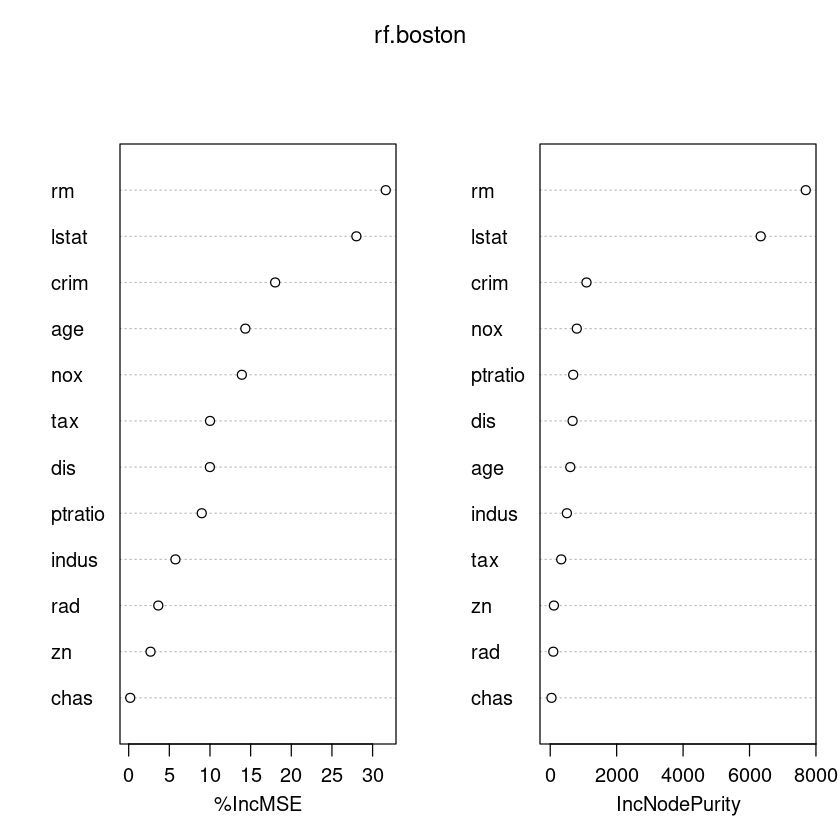

In [105]:
# View the importance of each variable from the random forest model
importance(rf.boston)

# Plot the importance of each variable from the random forest model
varImpPlot(rf.boston)

Average number of rooms is the most important predictor, affecting both MSE and Purity. Housing prices are primarily diven by property characteristics such as rooms, age, and crime rate rather than location-specific features such as proximity to the river.

II.	(30 points) Boosting: (30 points) Boosting: Use set.seed(1), randomly separate the dataset into half training dataset and half validation/test dataset.  Call library(gbm) and use the gbm() function to build the trees.

(a)	Set the tree size limit to 4, build 5000 trees for boosting. By default, shrinkage =0.001. Use summary() function to produce a relative influence statistics. Use plot() to produce partial dependence plot. interpret your plots.

,var,rel.inf
,<chr>,<dbl>
rm,rm,47.77218552
lstat,lstat,28.87780274
crim,crim,5.24064005
dis,dis,4.80273982
nox,nox,3.85568245
age,age,3.48748838
tax,tax,2.02093857
ptratio,ptratio,1.88187639
indus,indus,0.92881145


[1] "Test MSE (Boosting - shrinkage 0.01): 17.9441979955355"


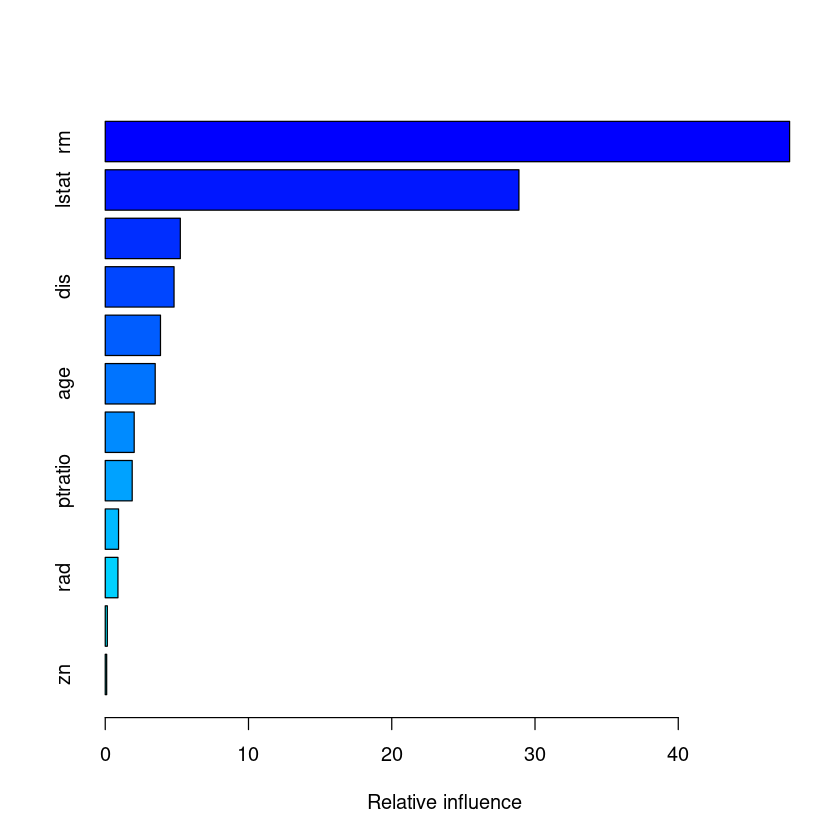

In [106]:
data("Boston")
boston_data <- Boston  # Avoid using 'test' as a variable name

# Set seed for reproducibility
set.seed(1)

# Split dataset into training (50%) and test (50%) sets
train_indices <- sample(1:nrow(boston_data), nrow(boston_data) / 2)
train_data <- boston_data[train_indices, ]
test_data <- boston_data[-train_indices, ]

# Build the gradient boosting model
gbm_model <- gbm(
  medv ~ .,               # Response variable
  data = train_data,      # Training data
  distribution = "gaussian",  # Gaussian for regression
  n.trees = 5000,         # Number of trees
  interaction.depth = 4,  # Tree depth
)

# Summary of the model (Variable Importance)
summary(gbm_model)

# Predict on test data using all 5000 trees
boost_pred <- predict(gbm_model, newdata = test_data, n.trees = 5000)

# Compute Test MSE
boost_mse <- mean((boost_pred - test_data$medv)^2)
print(paste("Test MSE (Boosting - shrinkage 0.01):", boost_mse))

If number of rooms has a positive slope, higher room counts correlate with increased housing prices. rm is 47.7 and lstat is 28.87. They are the two biggest predictors. Boosting – shrinkage of 0.01 results in a Test MSE of 17.94.

(b)	use the boosted model to predict “medv” on the test set, and check the test error MSE

In [107]:
# Predict on test data using the trained boosting model
boost_pred <- predict(gbm_model, newdata = test_data, n.trees = 5000)

# Compute Test MSE
boost_mse <- mean((boost_pred - test_data$medv)^2)

# Print the Test MSE
print(paste("Test MSE (Boosting - shrinkage 0.01):", round(boost_mse, 4)))

[1] "Test MSE (Boosting - shrinkage 0.01): 17.9442"


Boosting – shrinkage of 0.01 results in a Test MSE of 17.94

(c)	Set shrinkage = 0.2, redo (a) and (b). How does shrinkage influence the model performance?

In [108]:
# Train Boosting Model with Shrinkage = 0.2
set.seed(1)
gbm_model_02 <- gbm(
  medv ~ .,               # Response variable
  data = train_data,      # Training data
  distribution = "gaussian",  # Gaussian for regression
  n.trees = 5000,         # Number of trees
  interaction.depth = 4,  # Tree depth
  shrinkage = 0.2,        # Higher learning rate
  n.minobsinnode = 10,    # Minimum observations in terminal nodes
  verbose = FALSE         # Suppress output
)

# Predict on test data using the trained boosting model (shrinkage = 0.2)
boost_pred_02 <- predict(gbm_model_02, newdata = test_data, n.trees = 5000)

# Compute Test MSE
boost_mse_02 <- mean((boost_pred_02 - test_data$medv)^2)

# Print the Test MSE
print(paste("Test MSE (Boosting - shrinkage 0.2):", round(boost_mse_02, 4)))

[1] "Test MSE (Boosting - shrinkage 0.2): 20.3048"


Boosting – shrinkage of 0.01 results in a Test MSE of 20.30

III.	(10 points) BART: Use set.seed(1), randomly separate the dataset into half training dataset and half validation/test dataset.  Call library(BART) and use the gbart() function to build the trees. use the boosted model to predict “medv” on the test set, and check the test error MSE.

# Downloading packages -------------------------------------------------------
- Downloading BART from CRAN ...                OK [4.2 Mb in 0.23s]
Successfully downloaded 1 package in 0.4 seconds.

The following package(s) will be installed:
- BART [2.9.9]
These packages will be installed into "~/renv/library/linux-ubuntu-jammy/R-4.4/x86_64-pc-linux-gnu".

# Installing packages --------------------------------------------------------
- Installing BART ...                           OK [installed binary and cached in 1.7s]


Loading required package: nlme


Attaching package: ‘nlme’


The following object is masked from ‘package:dplyr’:

    collapse


Loading required package: survival


Attaching package: ‘survival’


The following object is masked from ‘package:caret’:

    cluster




*****Calling gbart: type=1
*****Data:
data:n,p,np: 253, 13, 253
y1,yn: 0.213439, -5.486561
x1,x[n*p]: 0.109590, 20.080000
xp1,xp[np*p]: 0.027310, 7.880000
*****Number of Trees: 200
*****Number of Cut Points: 100 ... 100
*****burn,nd,thin: 100,1000,1
*****Prior:beta,alpha,tau,nu,lambda,offset: 2,0.95,0.795495,3,3.673,21.7866
*****sigma: 4.342358
*****w (weights): 1.000000 ... 1.000000
*****Dirichlet:sparse,theta,omega,a,b,rho,augment: 0,0,1,0.5,1,13,0
*****printevery: 100

MCMC
done 0 (out of 1100)
done 100 (out of 1100)
done 200 (out of 1100)
done 300 (out of 1100)
done 400 (out of 1100)
done 500 (out of 1100)
done 600 (out of 1100)
done 700 (out of 1100)
done 800 (out of 1100)
done 900 (out of 1100)
done 1000 (out of 1100)
time: 2s
trcnt,tecnt: 1000,1000
[1] "Test MSE (BART): 16.9466"


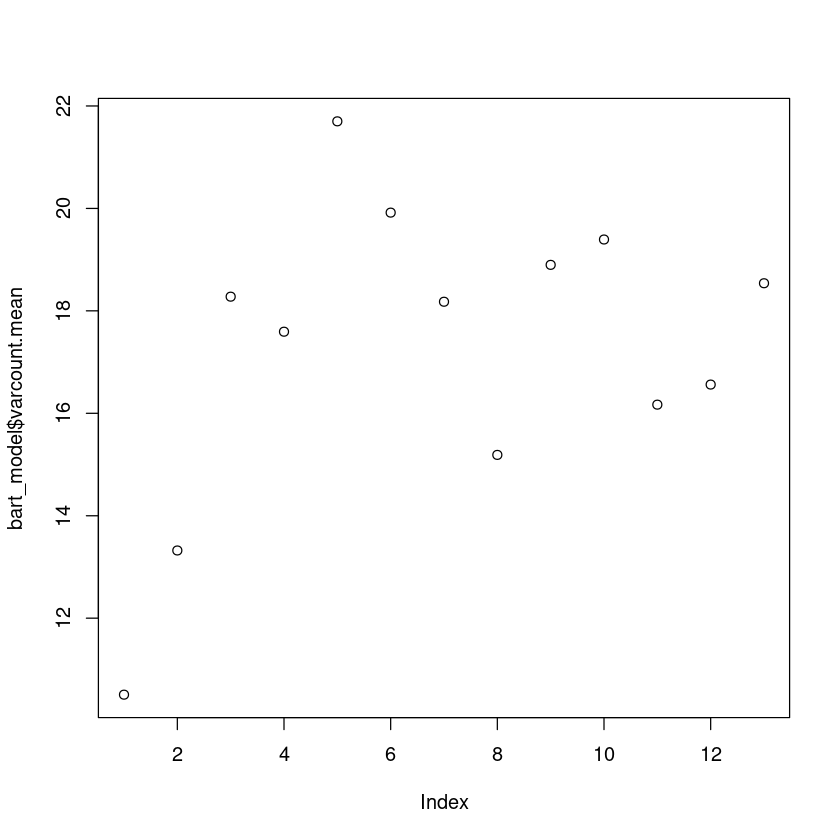

In [109]:
install.packages('BART')
library(BART)

# Set seed for reproducibility
set.seed(1)

# Load the dataset
data("Boston", package = "MASS")
boston_data <- Boston  # Assign Boston dataset

# Split data into 50% training and 50% test set
train_indices <- sample(1:nrow(boston_data), nrow(boston_data) / 2)
train_data <- boston_data[train_indices, ]
test_data <- boston_data[-train_indices, ]

# Extract predictors (X) and response variable (Y) for training and testing
train_X <- train_data[, -which(names(train_data) == "medv")]
train_Y <- train_data$medv
test_X <- test_data[, -which(names(test_data) == "medv")]
test_Y <- test_data$medv

# Train the BART model
bart_model <- gbart(x.train = train_X, y.train = train_Y, x.test = test_X)

# Predict on test data (posterior mean predictions)
bart_pred <- bart_model$yhat.test.mean

# Compute Test MSE
bart_mse <- mean((bart_pred - test_Y)^2)

# Print the Test MSE
print(paste("Test MSE (BART):", round(bart_mse, 4)))


plot(bart_model$varcount.mean)

Using Bayesian Additive Regression Trees (BART) the Test MSE was 16.94 resulting in a better model.

## **Problem 10 - Fit a Regression Tree**

**Use Carseats dataset. With the dataset, we wish to predict the “Sales” of car seats on the basis of various statistics associated with the sale data in the previous year. We practice various tree methods. 
I.(40 points) Bagging & Random Forest:  Use set.seed(1), randomly separate the dataset into half training dataset and half validation/test dataset.  Call library(randomForest) and use the randomForest() function to build the trees** 

In [111]:
# Load Data
install.packages('ISLR2')  
library(ISLR2)  
data("Carseats") 
attach(Carseats)
install.packages('randomForest')
library(randomForest)

set.seed(1)

# Split the dataset into training (50%) and test (50%) sets
train_indices <- sample(1:nrow(Carseats), nrow(Carseats) / 2)
train_data <- Carseats[train_indices, ]
test_data <- Carseats[-train_indices, ]

# View data
View(train_data)

The following package(s) will be installed:
- ISLR2 [1.3-2]
These packages will be installed into "~/renv/library/linux-ubuntu-jammy/R-4.4/x86_64-pc-linux-gnu".

# Installing packages --------------------------------------------------------
- Installing ISLR2 ...                          OK [linked from cache]


The following objects are masked from Carseats (pos = 9):

    Advertising, Age, CompPrice, Education, Income, Population, Price,
    Sales, ShelveLoc, Urban, US




The following package(s) will be installed:
- randomForest [4.7-1.2]
These packages will be installed into "~/renv/library/linux-ubuntu-jammy/R-4.4/x86_64-pc-linux-gnu".

# Installing packages --------------------------------------------------------
- Installing randomForest ...                   OK [linked from cache]


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<fct>
324,10.36,107,105,18,428,103,Medium,34,12,Yes,Yes
167,6.71,119,67,17,151,137,Medium,55,11,Yes,Yes
129,4.96,133,100,3,350,126,Bad,55,13,Yes,Yes
299,10.98,148,63,0,312,130,Good,63,15,Yes,No
270,5.01,159,69,0,438,166,Medium,46,17,Yes,No
187,8.68,120,51,0,93,86,Medium,46,17,No,No
307,4.78,131,32,1,85,133,Medium,48,12,Yes,Yes
85,2.23,111,25,0,52,121,Bad,43,18,No,No
277,6.93,135,69,14,296,130,Medium,73,15,Yes,Yes


**Question 10(Ia)**

**By default, randomForest() build 500 trees with Bagging method. Note you need to set mtry= the total number of the variables. Use the predict() function to forecast with the test data from the trees you just built. What is the test MSE of the bagging method?**

In [112]:
# Load Data
install.packages('ISLR2')  
library(ISLR2)  
data("Carseats") 
attach(Carseats)
install.packages('randomForest')
library(randomForest)

set.seed(1)

# Split the dataset into training (50%) and test (50%) sets
train_indices <- sample(1:nrow(Carseats), nrow(Carseats) / 2)
train_dataZ <- Carseats[train_indices, ]
test_dataZ <- Carseats[-train_indices, ]

# Build the bagging model with mtry equal to the number of predictors
bagging_model <- randomForest(Sales ~ ., data = train_dataZ, mtry = 10, importance = TRUE)
bagging_model

# Make predictions on the test set
pred_bagging <- predict(bagging_model, newdata = test_dataZ)

# Calculate the Mean Squared Error (MSE) for bagging
mse_bagging <- mean((pred_bagging - test_dataZ$Sales)^2)
mse_bagging

The following package(s) will be installed:
- ISLR2 [1.3-2]
These packages will be installed into "~/renv/library/linux-ubuntu-jammy/R-4.4/x86_64-pc-linux-gnu".

# Installing packages --------------------------------------------------------
- Installing ISLR2 ...                          OK [linked from cache]


The following objects are masked from Carseats (pos = 3):

    Advertising, Age, CompPrice, Education, Income, Population, Price,
    Sales, ShelveLoc, Urban, US


The following objects are masked from Carseats (pos = 10):

    Advertising, Age, CompPrice, Education, Income, Population, Price,
    Sales, ShelveLoc, Urban, US




The following package(s) will be installed:
- randomForest [4.7-1.2]
These packages will be installed into "~/renv/library/linux-ubuntu-jammy/R-4.4/x86_64-pc-linux-gnu".

# Installing packages --------------------------------------------------------
- Installing randomForest ...                   OK [linked from cache]



Call:
 randomForest(formula = Sales ~ ., data = train_dataZ, mtry = 10,      importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 10

          Mean of squared residuals: 2.87164
                    % Var explained: 63.48

[1] 2.623527

Q10(1a) The reported MSE of the bagging method is 2.6235. 

**Question 10(Ib)**

**Set ntree=25 to build 25 trees by Bagging method, Use the predict() function to forecast with the test data from the trees you just built. What is the test MSE of this Bagging method? Comparing to (a), is the performance better or worse? Why?**

In [113]:

# Build the bagging model with 25 trees
bagging_model_25 <- randomForest(Sales ~ ., data = train_dataZ, mtry =10, ntree = 25)
bagging_model_25
# Make predictions on the test set
pred_bagging_25 <- predict(bagging_model_25, newdata = test_dataZ)

# Calculate the Mean Squared Error (MSE) for this bagging model
mse_bagging_25 <- mean((pred_bagging_25 - test_dataZ$Sales)^2)
mse_bagging_25



Call:
 randomForest(formula = Sales ~ ., data = train_dataZ, mtry = 10,      ntree = 25) 
               Type of random forest: regression
                     Number of trees: 25
No. of variables tried at each split: 10

          Mean of squared residuals: 3.486373
                    % Var explained: 55.66

[1] 2.87522

Q10(1b) The results indicate that the MSE for the model with 25 trees is 2.87522. The performance of this model is worse compared to (a)

**Question 10(Ic)**

**Set mtry=4, which is smaller than the total number of the variables. Bagging becomes Random Forest. By default, randomForest() build 500 trees. Use the predict() function to forecast with the test data from the trees you just built. What is the test MSE of the Random Forest method? Comparing the results in (a) and (b), is it better or worse, why?**

In [114]:
# Build the random forest model with mtry = 4 (Random Forest method)
rf_model <- randomForest(Sales ~ ., data = train_dataZ, mtry = 4)

# Make predictions on the test set
pred_rf <- predict(rf_model, newdata = test_dataZ)

# Calculate the Mean Squared Error (MSE) for random forest
mse_rf <- mean((pred_rf - test_dataZ$Sales)^2)
mse_rf


[1] 2.808896

Q10(1c) The model with mtry = 4 has a higher MSE compared to the model in (a). However it is slightly lower than that of the model in (b)

**Question 10(Id)**

** Use the importance() function to  view and the varImpPlot() function plot the importance of each variable from the trees that you built in (c). What are your observations? Interpret the results.**

,IncNodePurity
CompPrice,159.29822
Income,120.35518
Advertising,108.25834
Population,89.69227
Price,424.93262
ShelveLoc,318.59717
Age,170.68204
Education,64.42004
Urban,12.96797
US,29.89869


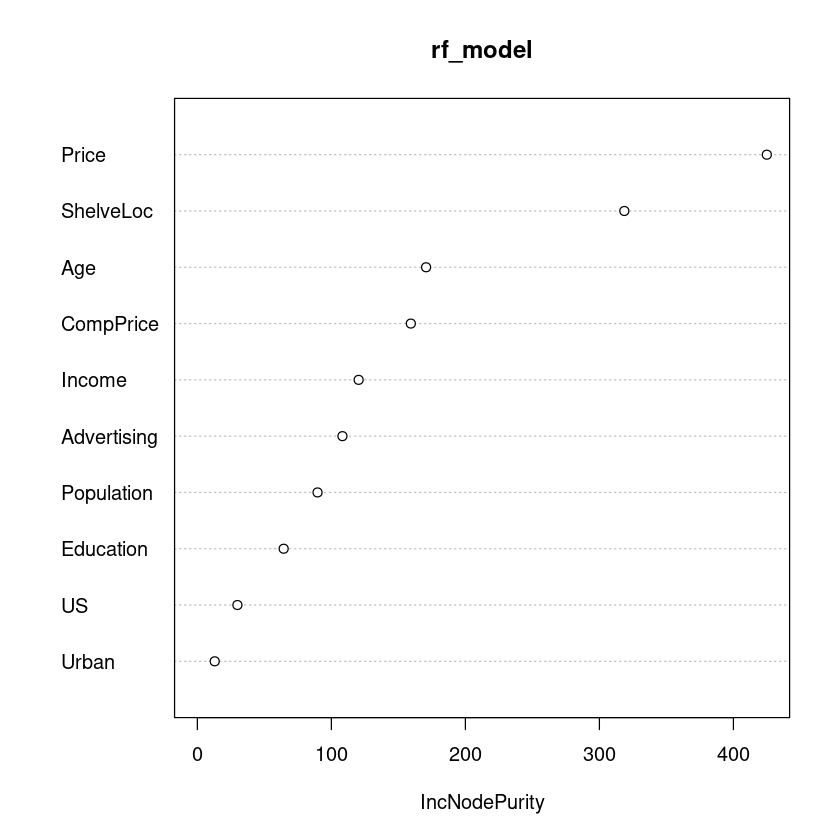

In [115]:
# View the importance of variables
importance(rf_model)

# Plot the importance of variables
varImpPlot(rf_model)


From the results above, the variables Price and ShelveLoc have the highest importance, meaning they play the most significant role in predicting Sales. Less important variables (e.g., Urban, US) contribute less to the model.

**Question 10(II)**

**(30 points) Boosting: Use set.seed(1), randomly separate the dataset into half training dataset and half validation/test dataset.  Call library(gbm) and use the gbm() function to build the trees.**

In [116]:
# Load the gbm package
install.packages("gbm")
library(gbm)

# Set seed for reproducibility
set.seed(1)

# Split the dataset into training (50%) and test (50%) sets
train_indices <- sample(1:nrow(Carseats), nrow(Carseats) / 2)
train_dataQ <- Carseats[train_indices, ]
test_dataQ <- Carseats[-train_indices, ]



The following package(s) will be installed:
- gbm [2.2.2]
These packages will be installed into "~/renv/library/linux-ubuntu-jammy/R-4.4/x86_64-pc-linux-gnu".

# Installing packages --------------------------------------------------------
- Installing gbm ...                            OK [linked from cache]


**Question 10(IIa)**

**Set the tree size limit to 4, build 1000 trees for boosting. By default, shrinkage =0.001. Use summary() function to produce a relative influence statistics. Use plot() to produce partial dependence plot. interpret your plots.**

,var,rel.inf
,<chr>,<dbl>
Price,Price,28.3534445
ShelveLoc,ShelveLoc,20.0949443
CompPrice,CompPrice,13.8193320
Age,Age,10.8647462
Income,Income,8.3855725
Advertising,Advertising,8.0034900
Population,Population,6.3845468
Education,Education,3.0963562
Urban,Urban,0.5741736


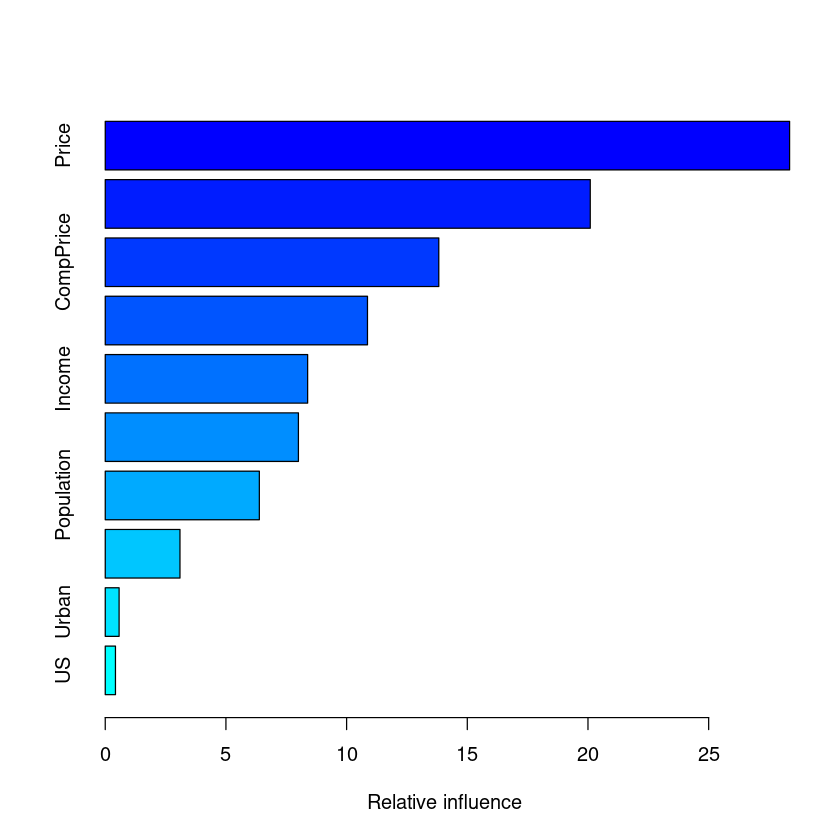

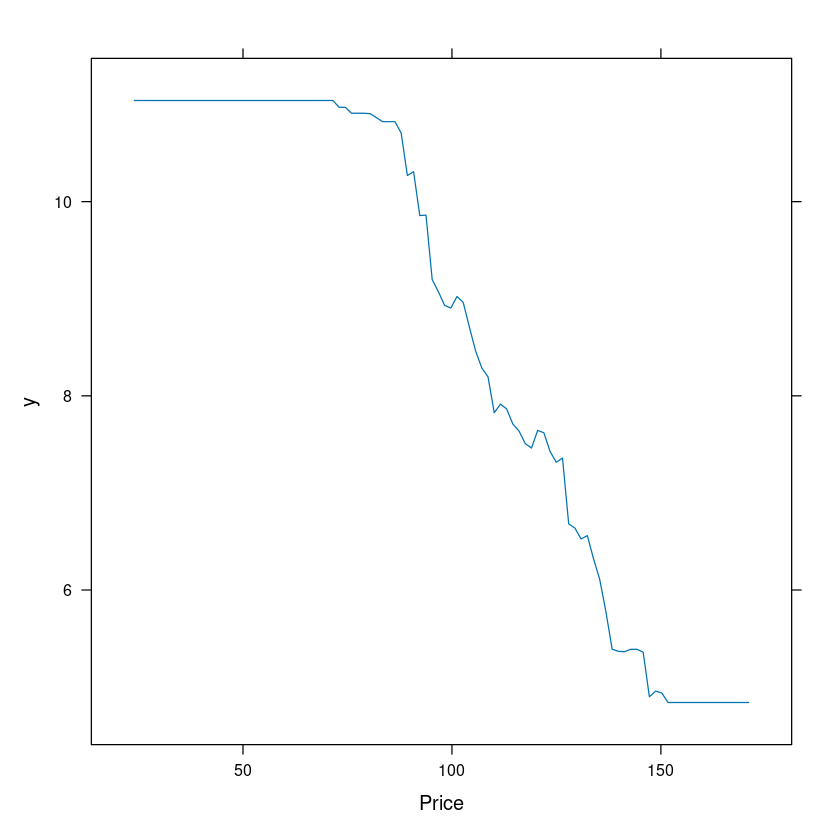

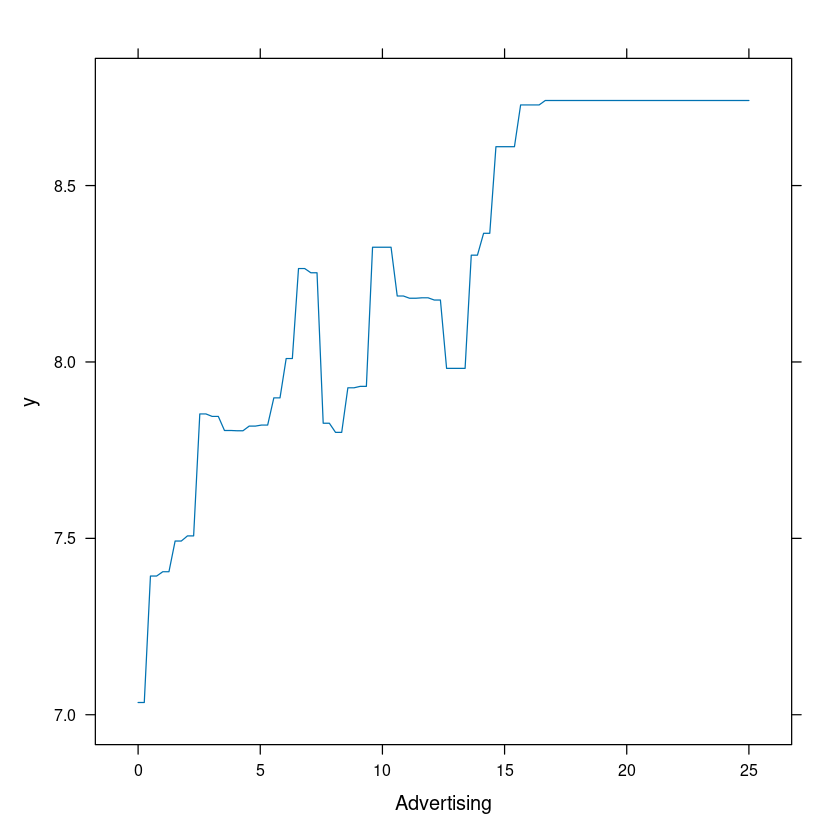

In [117]:


# Build the boosting model with tree depth = 4, 1000 trees
boosting_model <- gbm(Sales ~ ., data = train_dataQ, distribution = "gaussian", 
                      n.trees = 1000, interaction.depth = 4)

# Produce relative influence statistics
summary(boosting_model)

# Produce partial dependence plots for the most important variables
plot(boosting_model, i = "Price")
plot(boosting_model, i = "Advertising")


From the first plot, price is the most influential variable, with the highest relative influence (approximately 25), meaning it has the largest effect on predicting Sales. Urban and US have very low relative influence, indicating that they contribute minimally to the model. The second plot (the partial dependence plot) visualizes the marginal effect of the Price variable on predicted Sales, holding all other variables constant.As Price increases, Sales decreases significantly.
This shows a negative relationship: higher prices lead to fewer sales, which makes sense intuitively.


**Question 10(IIb)**

**use the boosted model to predict “Sales” on the test set, and check the test error MSE**

In [118]:
# Predict on the test set using the boosting model
pred_boosting <- predict(boosting_model, newdata = test_dataQ, n.trees = 1000)

# Calculate the Mean Squared Error (MSE) for the boosting model
mse_boosting <- mean((pred_boosting - test_dataQ$Sales)^2)
mse_boosting


[1] 1.915523

The boosted model to predict sales has an MSE of 1.91

**Question 10(IIc)**

**Set shrinkage = 0.1, redo (a) and (b). How does shrinkage influence the model performance?**

,var,rel.inf
,<chr>,<dbl>
Price,Price,27.3808449
ShelveLoc,ShelveLoc,20.7384579
CompPrice,CompPrice,13.6657155
Age,Age,10.4317434
Income,Income,8.5443888
Advertising,Advertising,8.4305280
Population,Population,6.1283980
Education,Education,3.9631057
Urban,Urban,0.5093783


[1] 1.944458

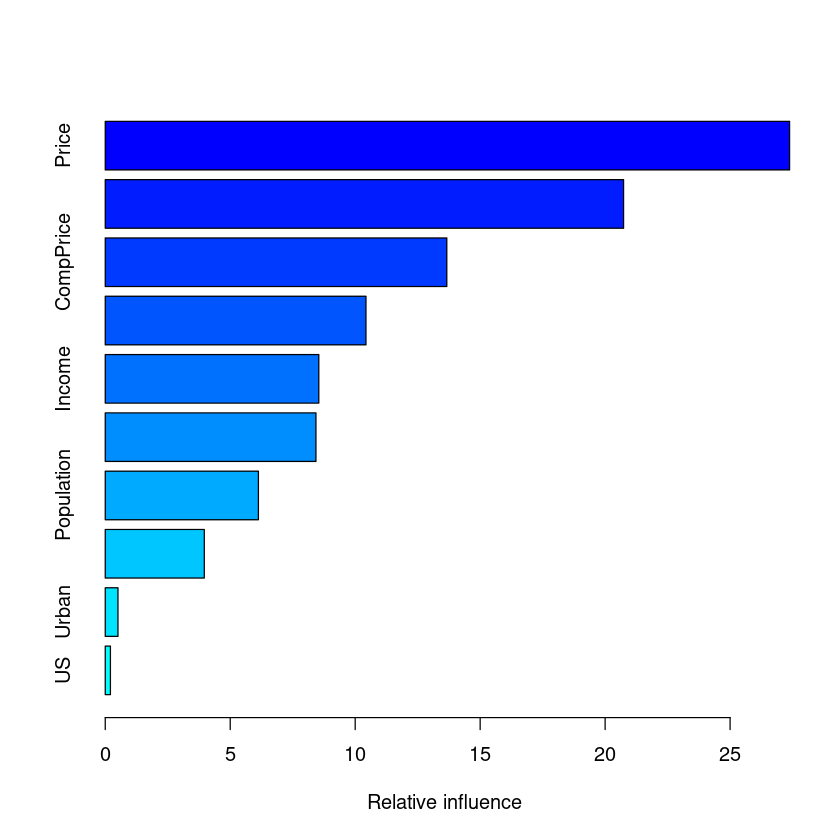

In [119]:
# Redo the boosting model with shrinkage = 0.1
boosting_model_0.1 <- gbm(Sales ~ ., data = train_dataQ, distribution = "gaussian", 
                           n.trees = 1000, interaction.depth = 4, shrinkage = 0.1)

# Produce relative influence statistics
summary(boosting_model_0.1)

# Predict on the test set using the boosted model
pred_boosting_0.1 <- predict(boosting_model_0.1, newdata = test_dataQ, n.trees = 1000)

# Calculate the Mean Squared Error (MSE) for the boosted model with shrinkage = 0.1
mse_boosting_0.1 <- mean((pred_boosting_0.1 - test_dataQ$Sales)^2)
mse_boosting_0.1


In [120]:
mse_boosting
mse_boosting_0.1

[1] 1.915523

[1] 1.944458

The MSE of the model is marginally higher with shrinkage of 0.1 compared to when the shrinkage is set at the default of 0.001.

**Question 10(III)**

**(10 points) BART: Use set.seed(1), randomly separate the dataset into half training dataset and half validation/test dataset.  Call library(BART) and use the gbart() function to build the trees. use the BART model to predict “medv” on the test set, and check the test error MSE**

In [121]:
# Load the BART library
install.packages("BART")
library(BART)

# Set seed for reproducibility
set.seed(1)

# Load the Boston dataset (assuming it is already loaded)
data("Boston")

# Create matrices of predictors (x) and the outcome variable (y)
x <- Boston[, 1:12]
y <- Boston[, "medv"]

# Randomly split the data into training and test sets (50% each)
train_indices <- sample(1:nrow(Boston), nrow(Boston) / 2)
xtrain <- x[train_indices, ]
ytrain <- y[train_indices]
xtest <- x[-train_indices, ]
ytest <- y[-train_indices]

# Fit the BART model using the gbart function
bartfit <- gbart(xtrain, ytrain, x.test = xtest)

# Predict on the test set
yhat.bart <- bartfit$yhat.test.mean

# Calculate the Mean Squared Error (MSE) for the BART model
mse_bart <- mean((ytest - yhat.bart)^2)
mse_bart


The following package(s) will be installed:
- BART [2.9.9]
These packages will be installed into "~/renv/library/linux-ubuntu-jammy/R-4.4/x86_64-pc-linux-gnu".

# Installing packages --------------------------------------------------------
- Installing BART ...                           OK [linked from cache]
*****Calling gbart: type=1
*****Data:
data:n,p,np: 253, 12, 253
y1,yn: 0.213439, -5.486561
x1,x[n*p]: 0.109590, 20.080000
xp1,xp[np*p]: 0.027310, 7.880000
*****Number of Trees: 200
*****Number of Cut Points: 100 ... 100
*****burn,nd,thin: 100,1000,1
*****Prior:beta,alpha,tau,nu,lambda,offset: 2,0.95,0.795495,3,3.71636,21.7866
*****sigma: 4.367914
*****w (weights): 1.000000 ... 1.000000
*****Dirichlet:sparse,theta,omega,a,b,rho,augment: 0,0,1,0.5,1,12,0
*****printevery: 100

MCMC
done 0 (out of 1100)
done 100 (out of 1100)
done 200 (out of 1100)
done 300 (out of 1100)
done 400 (out of 1100)
done 500 (out of 1100)
done 600 (out of 1100)
done 700 (out of 1100)
done 800 (out of 1100)


[1] 15.97434